### 1. Deskripsi Masalah dan Tujuan

Tenggelamnya kapal Titanic adalah salah satu bangkai kapal paling terkenal dalam sejarah. Pada 15 April 1912, selama pelayaran perdananya, Titanic tenggelam setelah bertabrakan dengan gunung es, menewaskan 1502 dari 2224 penumpang dan awak. Tragedi mengerikan ini mengejutkan komunitas internasional dan menyebabkan peraturan keselamatan yang lebih baik untuk kapal.

Dalam masalah ini, diminta untuk menyelesaikan analisis tentang jenis penumpang yang mungkin bertahan dari tragedi menggunakan Machine Learning. Jadi tugas kita untuk memprediksi apakah seorang penumpang selamat dari Titanic yang tenggelam atau tidak dengan bantuan pembelajaran mesin. Jadi itu masalah klasifikasi biner.

### 2. Import packages dan data

In [1]:
import numpy as np               # Aljabar linear
import pandas as pd              # Manipulasi data
import matplotlib.pyplot as plt  # Visualisasi
import seaborn as sns            # Visualisasi statistik
import missingno as mn           # For visualizing missing values.
from scipy import stats          # For statistics

In [2]:
from IPython.display import Markdown, display
def bold(string):
    display(Markdown(string))

# Untuk manipulasi text

In [3]:
train = pd.read_csv("train.csv")
display(train.head(3))

test = pd.read_csv("test.csv")
display(test.head(3))

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q

*Di test data tidak ada kolom survived

### 3. Deskripsi dan identifikasi variabel

Jelaskan apa yang masing-masing variabel tunjukkan dan identifikasikan variabel respons dan prediktor kami. Kemudian memisahkan variabel kategori dari variabel numerik dan akhirnya mengidentifikasi tipe data panda (yaitu, objek, float64 atau int64) untuk setiap variabel.

#### 3.1 Deskrpisi variabel

In [4]:
'''Merge train and test data together. This eliminates the hassle of handling train and test data seperately for various analysis.'''
merged = pd.concat([train, test], sort = False)
display(merged.head(2))

'''Shape of the combined data'''
display(merged.shape)

'''Variables in the combined data'''
display(merged.columns)

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

(1309, 12)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##### Apa yang bisa kita lihat ??

Jadi kita memiliki total 12 variabel. Dan setiap variabel memiliki 1309 baris (tidak termasuk survived).

Di sinilah deskripsi semua variabel:

1. PassengerId adalah pengidentifikasi unik yang ditugaskan untuk setiap penumpang.
2. Survived adalah kondisi yang menunjukkan jika penumpang selamat (0 = Tidak, 1 = Ya).
3. Class adalah kelas penumpang (1 = kelas 1, 2 = kelas 2, 3 = kelas 3).
4. Name adalah nama penumpang.
5. Sex menunjukkan jenis kelamin penumpang (Pria atau wanita).
6. Age menunjukkan usia penumpang.
7. Sibsp adalah jumlah saudara kandung / pasangan di atas kapal.
8. Parch adalah jumlah orang tua / anak-anak di atas kapal.
9. Ticket menunjukkan nomor tiket yang dikeluarkan untuk penumpang.
10. Fare menunjukkan jumlah uang yang dikeluarkan untuk tiket mereka.
11. Cabin menunjukkan kabin yang ditempati oleh penumpang.
12. Embarked menunjukkan pelabuhan tempat penumpang berangkat (C = Cherbourg, Q = Queenstown, S = Southampton).

**Survived adalah variabel target dan sisanya dari variabel adalah variabel prediktor.**

#### 3.2 Variabel numerik dan kategori

Numerik : Fare, Age, and PassengerId.

Kategori : Survived, Sex, Pclass (ordinal), Embarked, Cabin, Name, Ticket, SibSp, and Parch.

#### 3.3 Tipe data variabel

In [5]:
display(merged.dtypes)

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

data INT : PassengerId, Pclass, SibSp, Parch

data FLOAT: Survived, Age, Fare

data Objek(string+number): Name, Sex, Ticket, Cabin, Embarked

#### 4. Analisis Univariat

Analisis univariat secara terpisah mengeksplorasi distribusi setiap variabel dalam kumpulan data. Ini terlihat pada kisaran nilai, serta kecenderungan sentral dari nilai-nilai. Analisis data univariat tidak melihat hubungan antara berbagai variabel (seperti analisis bivariat dan multivariat) melainkan merangkum masing-masing variabel sendiri. Metode untuk melakukan analisis univariat akan tergantung pada apakah variabel itu kategorikal atau numerik. Untuk variabel numerik, kami akan mengeksplorasi bentuk distribusi (distribusi dapat simetris atau miring) menggunakan histogram dan plot kepadatan. Untuk variabel kategori, kami akan menggunakan bar plot untuk memvisualisasikan distribusi frekuensi absolut dan proporsional. Mengetahui distribusi nilai-nilai fitur menjadi penting ketika Anda menggunakan metode pembelajaran mesin yang menganggap jenis tertentu, paling sering Gaussian.

#### 4.1 Variabel Kategori

In [6]:
'''Untuk menganalisis variabel kategori, kami akan membuat tiga fungsi kustom.
Dua fungsi pertama menampilkan label bar dalam skala absolut dan relatif. Dan yang ketiga menciptakan dataframe absolut dan relatif dan juga menghasilkan abs dan frekuensi relatif plot untuk setiap variabel.'''

''' #1.Fungsi untuk menampilkan nilai absolut'''
def abs_bar_labels():
    plt.ylabel('Absolute Frequency')
    plt.xticks(rotation = 0)
    plt.yticks([])
    # Set individual bar lebels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')
    
'''#2.Fungsi untuk menampilkan level bar secara relatif'''
def pct_bar_labels():
    plt.ylabel('Relative Frequency (%)')
    plt.xticks(rotation = 0)
    plt.yticks([])   
    # Set individual bar lebels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')
         
'''#3.Fungsi untuk membuat dataframe frekuensi absolut dan relatif dari setiap variabel. Dan plot frekuensi absolut dan relatif.'''
def absolute_and_relative_freq(variable):
    global  ax, ax1 
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts()
    # Will be multiplied by 100 and rounded to 2 decimal points for percentage
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2) 
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    # This portion plots absolute frequency with bar labeled.
    ax =  absolute_frequency.plot.bar()
    plt.title('Absolute Frequency of %s' %variable.name) # Prints variable name as title in matplotlib
    abs_bar_labels()  # Displays bar labels in abs scale.
    plt.show()
    # This portion plots relative frequency with bar labeled.
    ax1 = relative_frequency.plot.bar()
    plt.title('Relative Frequency of %s' %variable.name)
    pct_bar_labels()
    plt.show()
    print('Absolute & Relative Frequency of',variable.name,':')
    return display(df)

##### 4.1.1 Survived

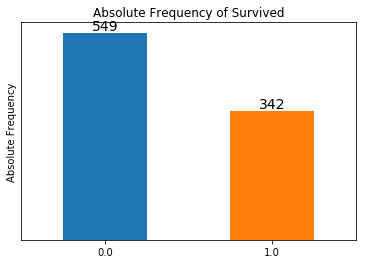

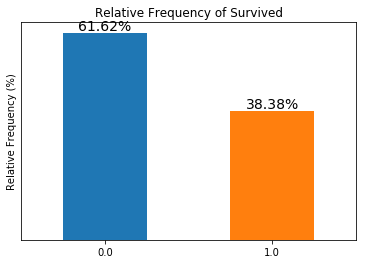

Absolute & Relative Frequency of Survived :


Absolute Frequency  Relative Frequency(%)
0.0                 549                  61.62
1.0                 342                  38.38

In [7]:
absolute_and_relative_freq(merged.Survived)

##### 4.1.2 Sex

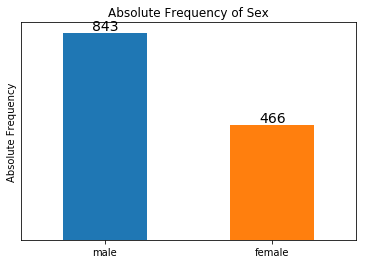

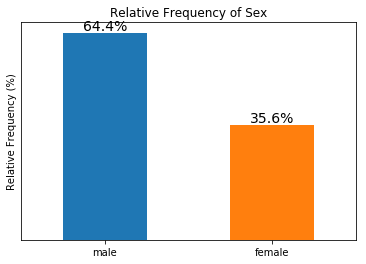

Absolute & Relative Frequency of Sex :


Absolute Frequency  Relative Frequency(%)
male                   843                   64.4
female                 466                   35.6

In [8]:
absolute_and_relative_freq(merged.Sex)

##### 4.1.3 Pclass

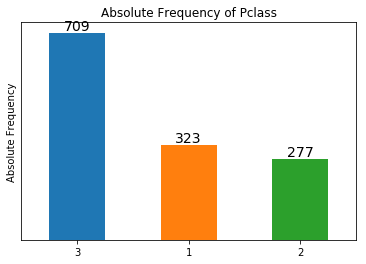

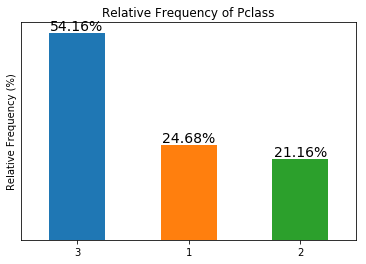

Absolute & Relative Frequency of Pclass :


Absolute Frequency  Relative Frequency(%)
3                 709                  54.16
1                 323                  24.68
2                 277                  21.16

In [9]:
absolute_and_relative_freq(merged.Pclass)

##### 4.1.4 Embarked

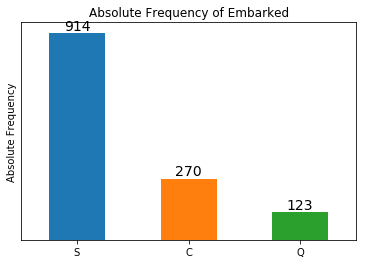

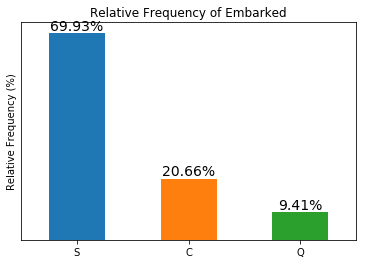

Absolute & Relative Frequency of Embarked :


Absolute Frequency  Relative Frequency(%)
S                 914                  69.93
C                 270                  20.66
Q                 123                   9.41

In [10]:
absolute_and_relative_freq(merged.Embarked)

##### 4.1.5 Cabin

In [11]:
'''Absolute frequency of Cabin.'''
abs_freq_cabin = merged.Cabin.value_counts(dropna = False)
bold('**Categories of Cabin:**')
display(abs_freq_cabin.head())

"""As frequency of Cabin isn't what we expected, let's count total categories in Cabin."""
bold('**Total categories in Cabin:**')
display(abs_freq_cabin.count())

'''Finally preview the variable Cabin to see what is causing the irregularity.'''
bold('**Preview Cabin:**')
display(merged.Cabin.head(7))

**Categories of Cabin:**

NaN                1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
D                     4
Name: Cabin, dtype: int64

**Total categories in Cabin:**

187

**Preview Cabin:**

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
Name: Cabin, dtype: object

**Temuan**: Sepertinya Cabin adalah jenis alfanumerik dengan 1014 obsevations yang hilang. Ada 187 jenis kategori dalam variabel Cabin. Karena ada terlalu banyak kategori di Cabin, kita harus memproses (yaitu, mengurangi jumlah kategori) Cabin untuk memeriksa apakah ada hubungan antara Survived dan Cabin.

##### 4.1.6 Name

In [12]:
'''Count total categories in Name.'''
bold('**Total categories in Name:**')
display(merged.Name.value_counts().count())

"""Let's finally check the what's inside the variable Name."""
bold('**Preview Name:**')
display(merged.Name.head())

**Total categories in Name:**

1307

**Preview Name:**

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

**Temuan**: Seperti yang diharapkan Nama mengandung string yang memiliki 1307 variasi. Jadi, seperti Cabin, kita harus mengolah Name untuk mendapatkan petunjuk tentang bertahan hidup darinya.

##### 4.1.7 Ticket

In [13]:
'''Count total groups in variable Ticket.'''
bold('**Total groups in Ticket:**')
display(merged.Ticket.value_counts().count())

'''Lets investigate Ticket.'''
bold('**Preview of Ticket:**')
display(merged.Ticket.head())

**Total groups in Ticket:**

929

**Preview of Ticket:**

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

**Temuan**: Sepertinya Tiket juga memiliki terlalu banyak kategori unik (929). Sebagai variabel jenis alfanumerik, kami harus memproses Tiket untuk mendapatkan wawasan berguna tentang bertahan hidup.

##### 4.1.8 Sibsp

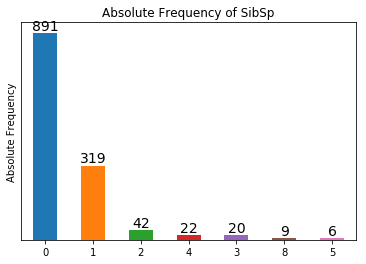

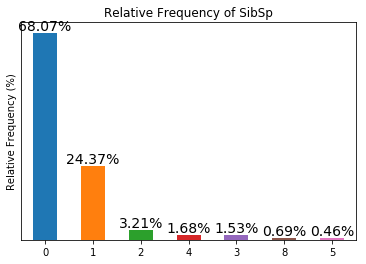

Absolute & Relative Frequency of SibSp :


Absolute Frequency  Relative Frequency(%)
0                 891                  68.07
1                 319                  24.37
2                  42                   3.21
4                  22                   1.68
3                  20                   1.53
8                   9                   0.69
5                   6                   0.46

In [14]:
absolute_and_relative_freq(merged.SibSp)

##### 4.1.9 Parch

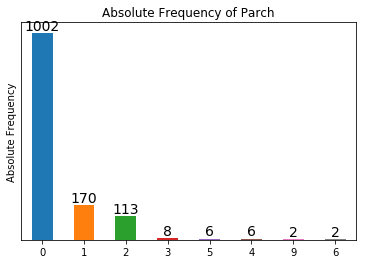

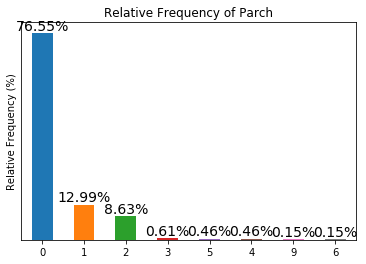

Absolute & Relative Frequency of Parch :


Absolute Frequency  Relative Frequency(%)
0                1002                  76.55
1                 170                  12.99
2                 113                   8.63
3                   8                   0.61
5                   6                   0.46
4                   6                   0.46
9                   2                   0.15
6                   2                   0.15

In [15]:
absolute_and_relative_freq(merged.Parch)

#### 4.2 Variabel Numerik

In [16]:
'''Untuk menganalisis variabel numerik, kita akan membuat dua fungsi kustom.
Yang pertama akan menghitung statistik ringkasan dan plot histogram untuk setiap variabel numerik.
Dan fungsi kedua akan memplot plot kepadatan kernel dan menghitung skewness untuk setiap variabel numerik.''' 

'''#1.Summary statistics with histogram'''
def summary_stats_and_hist(variable):
    global ax
    stats = variable.describe()
    ax = variable.plot.hist()
    plt.xlabel('%s' %variable.name)
    plt.title('Distribution of %s with Histogram' %variable.name)
    abs_bar_labels()
    print('Summary Statistics of', variable.name, ':')
    return display(stats)

'''#2.Density plot with skewness(kecondongan).'''
def density_plot_and_skewness(variable):
    variable.plot.hist(density = True)
    variable.plot.kde(style = 'k--')
    plt.xlabel('%s'%variable.name)
    plt.title('Distribution of %s with Density Plot & Histogram' %variable.name)
    print('Skewness of ', variable.name, ':')
    skewness = variable.skew()
    return display(skewness)

##### 4.2.1 Fare

Summary Statistics of Fare :


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

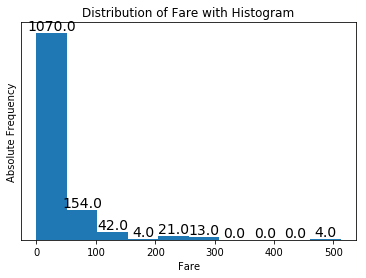

In [17]:
summary_stats_and_hist(merged.Fare)

**Dilihat dari histogram, jelas bahwa distribusi Fare memiliki kecondongan positif yang tinggi. Dan tampaknya sebagian besar penumpang (1070) membayar ongkos antara 0 hingga 51, diikuti oleh 51 hingga 102.**

Ada juga cara lain, yang sering lebih jelas, untuk memahami distribusi: plot kepadatan atau, lebih formal, Kernel Density Plots. Mereka dapat dianggap sebagai versi halus dari histogram. Salah satu keuntungan dari kepadatan plot selama histogram adalah bahwa bentuk distribusi tidak dipengaruhi oleh jumlah bins(kantong) yang digunakan.

Skewness of  Fare :


4.367709134122922

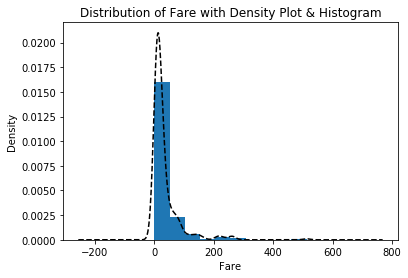

In [18]:
density_plot_and_skewness(merged.Fare)

**Jadi apa nilai yang Skewness(kecondongan) ditampilkan?**

1. Jika skewness kurang dari −1 atau lebih besar dari +1, distribusi dapat dianggap sangat condong.
2. Jika skewness antara −1 dan −½ atau antara + ½ dan +1, distribusi dapat dianggap sebagai lumayan condong.
3. Dan akhirnya jika skewness antara −½ dan + ½, distribusi dapat dianggap sebagai kira-kira simetris.

**Temuan**: Plot density menunjukkan massa distribusi Fare sangat terkonsentrasi di sebelah kiri gambar karena ekor yang sangat panjang di sisi kanan. Jadi dapat dikatakan bahwa Fare benar-benar condong (positif) yang juga didukung oleh nilai positif yang dihitung dari skewness 4.368

##### 4.2.2 Age

Summary Statistics of Age :


count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

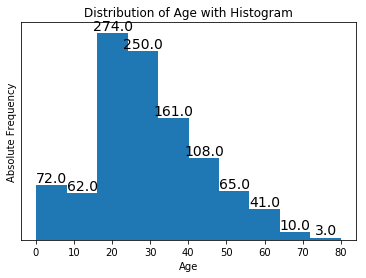

In [19]:
summary_stats_and_hist(merged.Age)

Skewness of  Age :


0.40767455974362266

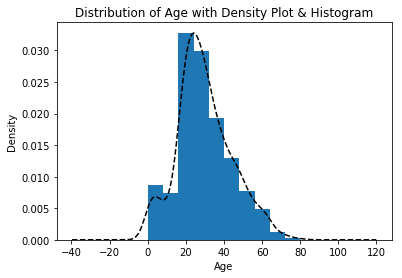

In [20]:
density_plot_and_skewness(merged.Age)

**Temuan**: Apa yang bisa kita lihat dari plot density adalah bahwa massa distribusi Age sedikit terkonsentrasi di sebelah kiri gambar karena ekor relatif panjang di sisi kanan. Jadi dapat dikatakan bahwa Age hampir terdistribusi normal karena ekor pada kedua sisi hampir sama dan memiliki nilai kecondongan positif yang kecil sebesar 0,40767 (antara -0,5 hingga 0,5). Jadi dapat dikatakan bahwa Age hampir terdistribusi secara normal.

##### 4.2.3 PassengerID

PassengerID hanya meliputi identitas dari penumpang

In [21]:
display(merged.PassengerId.head(10))

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: PassengerId, dtype: int64

### 5. Manipulasi Feature

Di bagian ini, kami akan memodifikasi atau membuat fitur baru dari fitur-fitur yang sudah ada yang sulit dianalisis dalam bentuk mentah yang kami lihat di bagian Analisis Univariat. Kami akan merekayasa fitur seperti Cabin, Name, SibSp & Parch, dan Ticket yang dapat memberi tahu kami sesuatu tentang bertahan hidup atau mati setelah diproses.

#### 5.1 Cabin

In [22]:
"""Let's preview the Cabin again."""
bold('**Cabin preview:**')
display(merged.Cabin.head())

"""It seems Cabin contains some missing values. Let's count them."""
bold('**Missing values in Cabin:**')
display(merged.Cabin.isnull().sum())

'''Total categories in Cabin before processing.'''
bold('**Total categories in Cabin before processing:**')
display(merged.Cabin.value_counts(dropna = False).count())

**Cabin preview:**

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

**Missing values in Cabin:**

1014

**Total categories in Cabin before processing:**

187

Sepertinya Cabin adalah jenis alfanumerik tanpa karakter khusus (seperti., /,% Dll) antara huruf dan angka. Ini juga memiliki 1014 obsevations yang hilang. Masuk akal untuk mengasumsikan bahwa NaN tidak memiliki kabin, yang bisa memberi tahu kita sesuatu tentang 'Bertahan Hidup'. Kami akan menandai NaN sebagai 'X' dan hanya menyimpan karakter pertama di mana Cabin memiliki nilai alfanumerik. Karena variabel kategorinya, kita harus mengurangi jumlah kategori untuk analisis lebih lanjut.

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

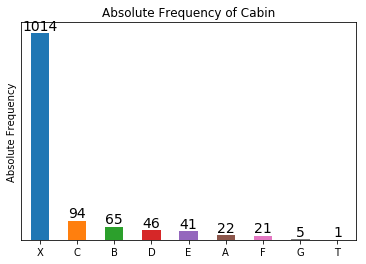

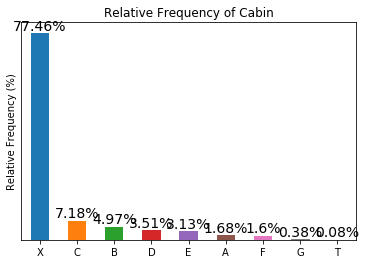

Absolute & Relative Frequency of Cabin :


Absolute Frequency  Relative Frequency(%)
X                1014                  77.46
C                  94                   7.18
B                  65                   4.97
D                  46                   3.51
E                  41                   3.13
A                  22                   1.68
F                  21                   1.60
G                   5                   0.38
T                   1                   0.08

In [23]:
"""Flag all the NaNs of Cabin as 'X'."""
merged.Cabin.fillna(value = 'X', inplace = True)

'''Keep only the 1st character where Cabin is alphanumerical.'''
merged.Cabin = merged.Cabin.apply( lambda x : x[0])
display(merged.Cabin.value_counts())

'''After processing, we can visualize the absolute and relative frequency of newly transformed Cabin variable.'''
absolute_and_relative_freq(merged.Cabin)

**Temuan**: Tampaknya hampir 77,5% penumpang memiliki kategori kabin X (sebelumnya NaNs), diikuti oleh lebih dari 7% memiliki kategori kabin C dan hampir 5% memiliki kategori kabin B.

#### 5.1.2 Name

In [24]:
display(merged.Name.head(10))

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

Apa yang dapat kita pahami dengan mudah dari kolom ini, berisi string yang lebih berisi judul seperti Mr, Mrs, Master, dll. Titel ini memberi kita beberapa informasi berguna tentang seks (Mr = laki-laki, Nyonya = wanita yang sudah menikah), usia (Ms biasanya lebih muda dari Mrs), dan profesi (Master menunjukkan profesi dan karenanya status sosial) dll yang pada akhirnya dapat memberi tahu kita sesuatu yang lebih tentang bertahan hidup. Sekarang kami ingin mengekstrak judul-judul ini dari Nama untuk memeriksa apakah ada hubungan antara Titel ini dan Survived.

In [25]:
'''Create a new variable Title that extracts titles from Name.'''
merged['Title'] = merged.Name.str.extract('([A-Za-z]+)\.')

'''Count the extracted categories of Title from Name.'''
display(merged.Title.value_counts())

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Ms            2
Mlle          2
Lady          1
Don           1
Sir           1
Jonkheer      1
Countess      1
Mme           1
Dona          1
Capt          1
Name: Title, dtype: int64

Kita bisa melihat ada beberapa Titel dengan frekuensi paling sedikit. Jadi, masuk akal untuk menempatkan mereka dalam lebih sedikit kantong. Profesional seperti Dr, Rev, Col, Mayor, Capt akan dimasukkan ke dalam ember 'officer'. Titel seperti Dona, Jonkheer, Countess, Sir, Lady, Don biasanya berhak atas kaum bangsawan dan karenanya Titel ini akan dimasukkan ke dalam ember 'Aristokrat'. Kami juga akan menggantikan Mlle dan Ms dengan Miss dan Mme oleh Mrs karena ini adalah titel dalam bahasa Prancis.

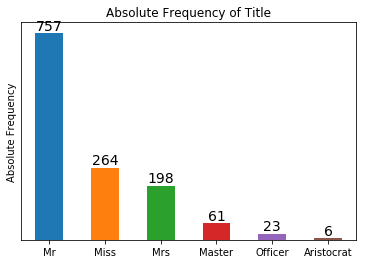

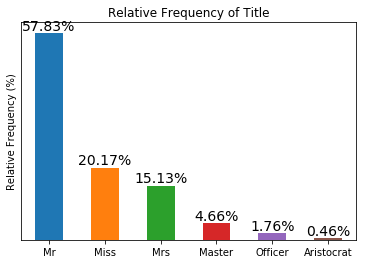

Absolute & Relative Frequency of Title :


Absolute Frequency  Relative Frequency(%)
Mr                         757                  57.83
Miss                       264                  20.17
Mrs                        198                  15.13
Master                      61                   4.66
Officer                     23                   1.76
Aristocrat                   6                   0.46

In [26]:
'''Create a bucket Officer and put Dr, Rev, Col, Major, Capt titles into it.'''
merged.Title.replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)

'''Put Dona, Jonkheer, Countess, Sir, Lady, Don in bucket Aristocrat.'''
merged.Title.replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)

'''Finally Replace Mlle and Ms with Miss. And Mme with Mrs.'''
merged.Title.replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

'''After processing, visualise and count absolute and relative frequency of transformed Title.'''
absolute_and_relative_freq(merged.Title)

**Temuan**: Hampir 58% penumpang memiliki gelar Mr (laki-laki tentu saja), diikuti oleh lebih dari 20% penumpang memiliki gelar Miss (wanita yang tidak menikah maka biasanya lebih muda dari Mrs). Lebih dari 15% penumpang adalah wanita yang sudah menikah (Mrs).

#### 5.1.3 Sibb dan Parch

Dalam analisis univariat, kami melihat beberapa penumpang memiliki saudara / pasangan dan beberapa tidak punya. Hal yang sama juga berlaku untuk Varich Parch. Karena kedua variabel ini bersama-sama menunjukkan ukuran keluarga, kami akan membuat variabel baru 'Family_size' dari dua variabel ini.

In [27]:
'''Merge SibSp and Parch to create a variable Family_size.'''
merged['Family_size'] = merged.SibSp + merged.Parch + 1  # Adding 1 for single person
display(merged.Family_size.value_counts())

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_size, dtype: int64

Kami melihat ada beberapa ukuran keluarga dengan frekuensi paling sedikit. Jadi, masuk akal untuk menempatkan mereka dalam ember yang lebih sedikit. Kami akan membuat 4 ember yaitu single, small, medium, dan large untuk sisanya.

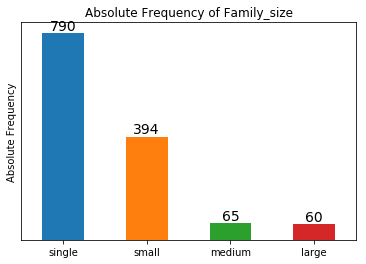

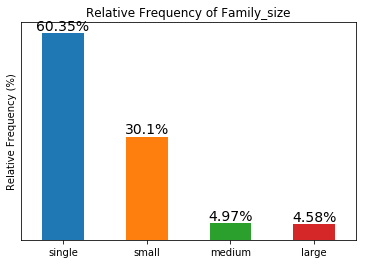

Absolute & Relative Frequency of Family_size :


Absolute Frequency  Relative Frequency(%)
single                 790                  60.35
small                  394                  30.10
medium                  65                   4.97
large                   60                   4.58

In [28]:
'''Create buckets of single, small, medium, and large and then put respective values into them.'''
merged.Family_size.replace(to_replace = [1], value = 'single', inplace = True)
merged.Family_size.replace(to_replace = [2,3], value = 'small', inplace = True)
merged.Family_size.replace(to_replace = [4,5], value = 'medium', inplace = True)
merged.Family_size.replace(to_replace = [6, 7, 8, 11], value = 'large', inplace = True)

'''After processing, visualise and count the absolute and relative frequency of engineered Family_size.'''
absolute_and_relative_freq(merged.Family_size)

**Temuan**: Sepertinya sebagian besar penumpang (lebih dari 60%) adalah single (tanpa keluarga), diikuti oleh 30% penumpang memiliki keluarga kecil. Hampir 5% penumpang memiliki keluarga menengah dan lebih dari 4,5% penumpang memiliki keluarga besar besar.

#### 5.1.4 Tiket

In [29]:
display(merged.Ticket.head())

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

Tiket juga merupakan jenis variabel alfanumerik. Kami akan membuat dua grup-satu hanya akan berisi nomor dan lainnya hanya akan berisi karakter yang diekstraksi dari string. Jika baris berisi karakter dan angka, kami hanya akan menyimpan karakter.

In [30]:
'''Assign N if there is only number and no character. If there is a character, extract the character only.'''
ticket = []
for x in list(merged.Ticket):
    if x.isdigit(): #Cek angka
        ticket.append('N')
    else:
        ticket.append(x.replace('.','').replace('/','').strip().split(' ')[0]) #Menghapus karakter hubung
        
'''Swap values'''
merged.Ticket = ticket

'''Count the categories in Ticket.'''
bold('**Categories of Ticket:**')
display(merged.Ticket.value_counts())

**Categories of Ticket:**

N          957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
SCPARIS     14
STONO       14
A4          10
FCC          9
SOC          8
C            8
SOPP         7
STONO2       7
SCAH         5
SCParis      5
LINE         4
WEP          4
PP           4
SOTONO2      3
FC           3
SC           2
SCA4         2
SWPP         2
PPP          2
LP           1
Fa           1
SOP          1
A            1
SCA3         1
AS           1
AQ3          1
AQ4          1
CASOTON      1
SCOW         1
STONOQ       1
SP           1
Name: Ticket, dtype: int64

Masih ada terlalu banyak kategori untuk ditangani. Mari kita hanya menyimpan karakter pertama dari Tiket untuk semakin mengurangi kelas Tiket.

N    957
P     98
S     98
C     77
A     42
W     19
F     13
L      5
Name: Ticket, dtype: int64

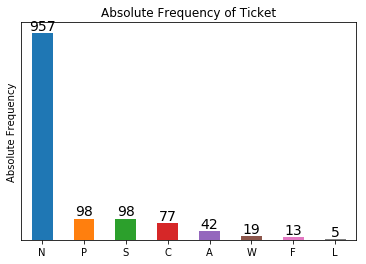

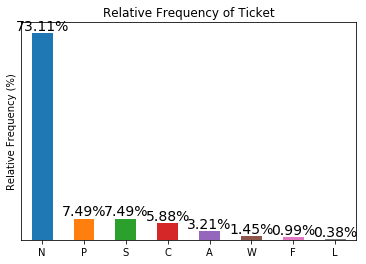

Absolute & Relative Frequency of Ticket :


Absolute Frequency  Relative Frequency(%)
N                 957                  73.11
P                  98                   7.49
S                  98                   7.49
C                  77                   5.88
A                  42                   3.21
W                  19                   1.45
F                  13                   0.99
L                   5                   0.38

In [31]:
'''Keep only the 1st character of Ticket to further reduce the Ticket categories.'''
merged.Ticket = merged.Ticket.apply(lambda x : x[0])
display(merged.Ticket.value_counts())

'''After processing, visualise and count the absolute and relative frequency of updated Ticket.'''
absolute_and_relative_freq(merged.Ticket)

**Temuan**: Lebih dari 73% penumpang memiliki tiket kategori N, diikuti oleh hampir 7,5% kategori penumpang tiket adalah S dan P. Penumpang dengan kategori tiket W serendah 1,45%.

### 6. Outliers Detection

**Bagaimana Outliers memengaruhi distribusi**: Jika nilai suatu variabel secara signifikan di atas rentang yang diharapkan, maka akan menyeret distribusi ke kanan, membuat grafik condong kanan atau condong positif (seperti Fare). Sebagai alternatif, Jika nilai secara signifikan di bawah kisaran yang diharapkan, maka akan menyeret distribusi ke kiri, membuat grafik condong ke kiri atau condong negatif.

Plot lain yang berguna untuk memvisualisasikan variabel kontinu adalah box-plot. Box-plot sangat membantu untuk memahami penyebaran data kontinu dan apakah ada potensi pengamatan yang tidak biasa (Outliers) dalam variabel itu. Ini menyajikan informasi min, kuartil 1, kuartil ke-2 (median), kuartil ke-3, dan maks variabel. **Kami akan menggunakan metode IQR untuk mendeteksi pencilan untuk Variabel Usia dan Tarif meskipun kami tidak akan menghapusnya.**

In [32]:
'''Create a function to count total outliers. And plot variables with and without outliers.'''
def outliers(variable):
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Hitung batas atas dan batas bawah Outliers
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2,1)
    
    # Gives space between two subplots
    fig.subplots_adjust(hspace = 1) 
    
    # Plot variable with outliers
    variable.plot.box(vert = False, color = 'coral', grid = False, ax = ax1, title = 'Distribution with Outliers for %s' %variable.name)

    # Plot variable without outliers
    filtered.plot.box(vert = False, color = 'coral', grid = False, ax = ax2, title = 'Distribution without Outliers for %s' %variable.name)

#### 6.1 Deteksi Outlier Age

Total Outliers of Age : 9


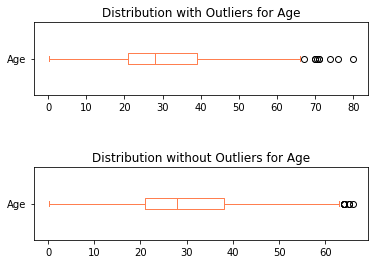

In [33]:
outliers(merged.Age)

**Kami menghitung 9 outlier tetapi boxplot menunjukkan 7 karena 70 dan 71 memiliki duplikat.**

Untuk box-plot, jika bagian yang lebih panjang dari kotak itu kana (atau di atas) median, data dikatakan condong ke kanan. Jika bagian yang lebih panjang tersisa (atau di bawah) ke median, datanya condong ke kiri. Dalam kasus kami, bagian kotak yang lebih besar adalah tepat untuk median

#### 6.2 Deteksi Outlier Fare

Total Outliers of Fare : 171


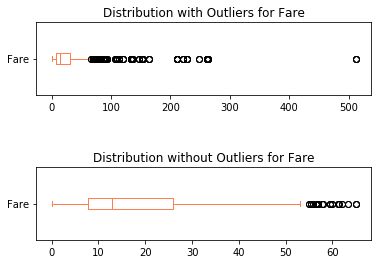

In [34]:
outliers(merged.Fare)

### 7. Memasukkan Variabel kosong/hilang

Cara paling sederhana untuk menambahkan nilai-nilai yang hilang dari suatu variabel adalah dengan mengaitkan nilai-nilai yang hilang dengan mean, median atau modus tergantung pada distribusi dan jenis variabel (kategorikal atau numerik). Sekarang, kita harus memiliki gagasan yang baik tentang distribusi variabel dan keberadaan outliers dalam variabel-variabel tersebut. Untuk variabel kategori **imputasi-Modus** dilakukan dan untuk variabel Numerik **imputasi-Mean** dilakukan jika distribusinya simetris (atau hampir simetris atau normal seperti Age). Di sisi lain, untuk variabel dengan distribusi skewed dan outliers (seperti Fare), **imputasi-median** direkomendasikan karena median lebih kebal terhadap outlier daripada mean.

Namun, salah satu kerugian yang jelas menggunakan mean, median atau modus untuk impute nilai yang hilang adalah penambahan bias jika jumlah nilai yang hilang adalah signifikan (seperti Age). Jadi hanya mengganti mereka dengan mean atau median umur mungkin bukan solusi terbaik karena Age mungkin berbeda berdasarkan kelompok dan kategori penumpang.

Untuk mengatasi hal ini, kita dapat mengelompokkan data kami dengan beberapa variabel yang tidak memiliki nilai yang hilang dan untuk setiap bagian menghitung usia median untuk menghitung nilai yang hilang. Atau kita dapat membangun model regresi linier yang akan memprediksi nilai-nilai Age yang hilang menggunakan fitur-fitur yang tidak memiliki nilai yang hilang. Kedua metode ini dapat menghasilkan akurasi yang lebih baik tanpa bias yang tinggi, kecuali jika nilai yang hilang diharapkan memiliki varians yang sangat tinggi. Kami akan menunjukkan metode imputasi sebelumnya.

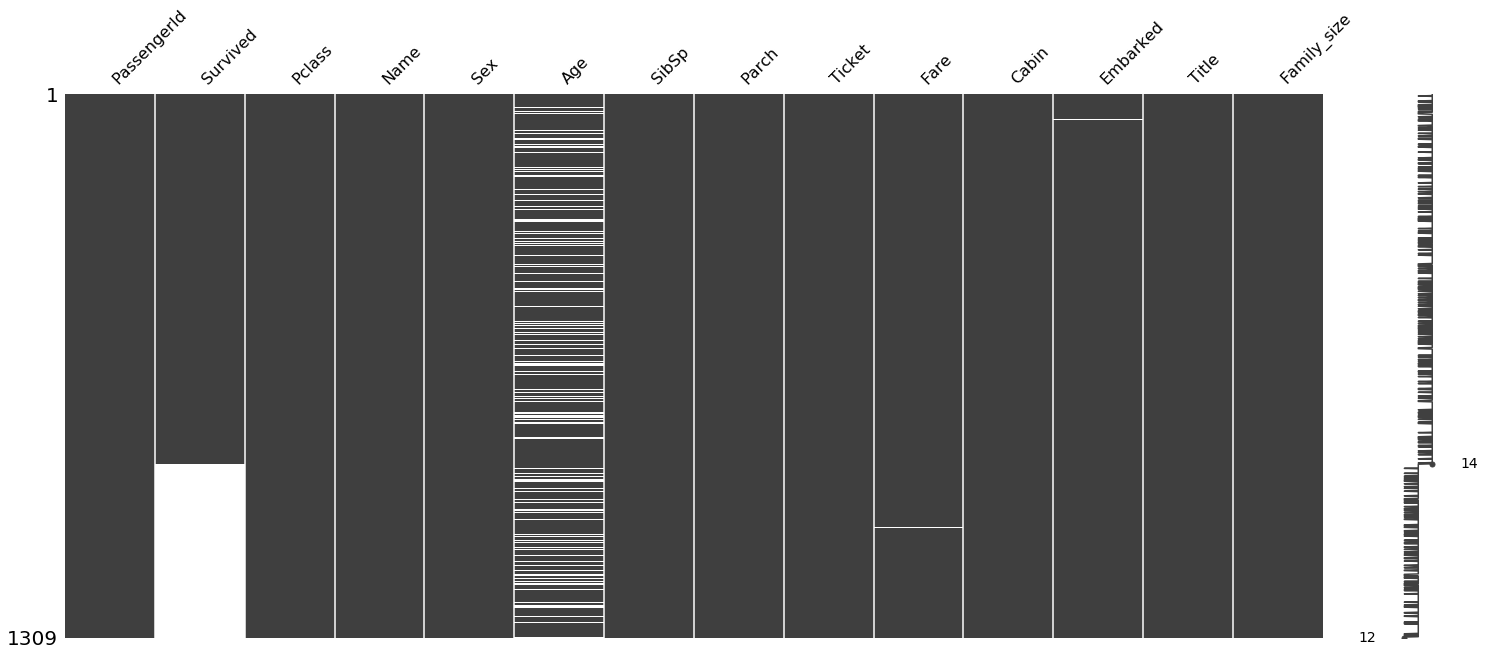

In [35]:
mn.matrix(merged)
plt.show()

In [36]:
"""Let's count the missing values for each variable."""
bold('**Missing values for each variable:**')
display(merged.isnull().sum())

**Missing values for each variable:**

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
Title            0
Family_size      0
dtype: int64

**Temuan:**

1. Age memiliki 263 nilai yang hilang.
2. Fare hanya 1.
3. Cabin memiliki 1014 nilai yang hilang.
4. Embarked hanya memiliki 2 nilai yang hilang.
5. Akhirnya Survived telah kehilangan nilai-nilai (karena gabungan Train dan Test) bahwa kita akan memprediksi learning dari set Train.

Ingat, kami memiliki total 1309 observasi kecuali Bertahan Hidup.

#### 7.1 Impute Fare dan Embarked

In [37]:
'''Impute missing values of Embarked. Embarked is a categorical variable where S is the most frequent.'''
merged.Embarked.fillna(value = 'S', inplace = True)

'''Impute missing values of Fare. Fare is a numerical variable with outliers. Hence it will be imputed by median.'''
merged.Fare.fillna(value = merged.Fare.median(), inplace = True)

#### 7.2 Impute Age

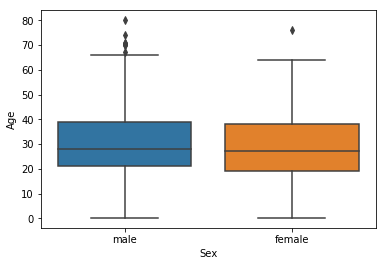

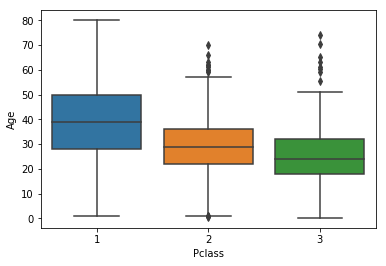

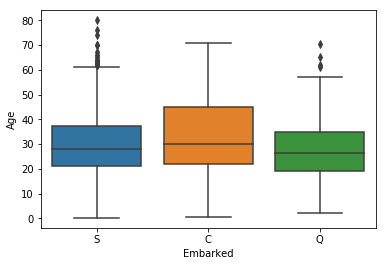

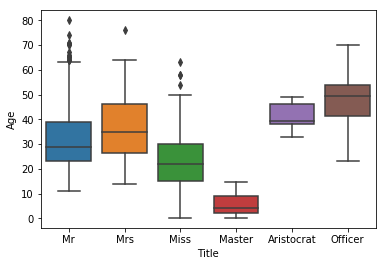

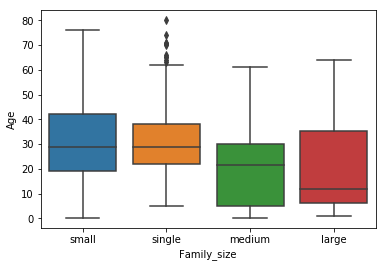

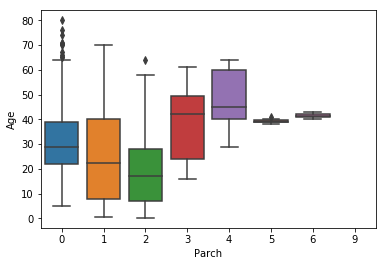

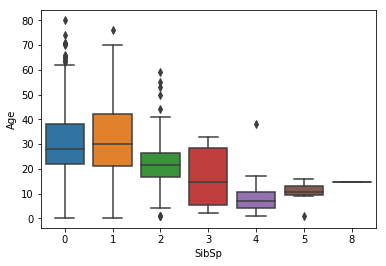

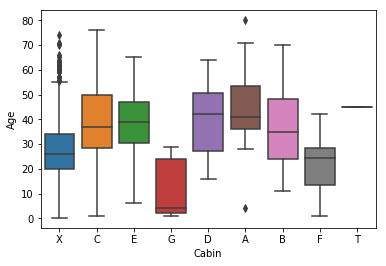

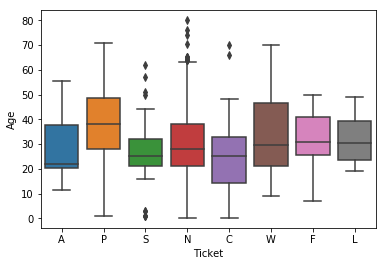

In [38]:
"""Create a boxplot to view the variables correlated with Age. First take the variables we're interested in."""
correlation = merged.loc[:, ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_size', 'Parch', 'SibSp', 'Cabin', 'Ticket']]
for columns in correlation:
    plt.figure(columns)
    sns.boxplot(x = columns, y = merged.Age, data = correlation)


**Temuan:**

1. Distribusi Age tampaknya sama pada subpopulasi pria dan wanita dan sub-populasi S, C, Q dari Embarked. Jadi Sex and Embarked bukanlah prediktor yang baik untuk Age.
2. Di sisi lain, distribusi Umur tampaknya berbeda dalam 1, 2 dan 3 sub-populasi Pclass, jadi Pclass cukup informatif untuk memprediksi Umur.
3. Akhirnya, distribusi usia tampaknya berbeda dalam kategori yang berbeda untuk Title, Family_size, SibSp, Parch, dan Cabin. Jadi mereka mungkin menjadi prediktor yang baik untuk Age.

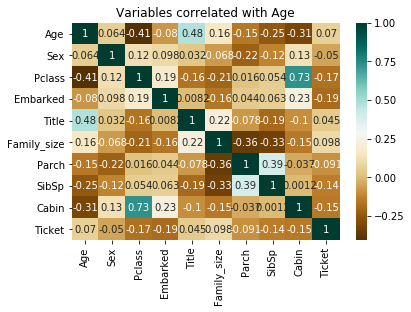

In [39]:
"""Mari kita plot peta panas korelasi untuk melihat variabel mana yang sangat berkorelasi dengan Umur dan jika interpretasi kotak kita benar. Kita perlu mengubah variabel kategori menjadi numerik ke plot heatmap korelasi. Jadi mengonversi variabel kategori menjadi numerik."""
from sklearn.preprocessing import LabelEncoder
correlation = correlation.agg(LabelEncoder().fit_transform)
correlation['Age'] = merged.Age # Inserting Age in dataframe correlation
correlation = correlation.set_index('Age').reset_index() # Move Age at index 0.

'''Tabel heatmap correlation'''
sns.heatmap(correlation.corr(), cmap ='BrBG', annot = True)
plt.title('Variables correlated with Age')
plt.show()

**Temuan**: Seperti yang diharapkan Sex, Embarked, dan Ticket memiliki korelasi terlemah dengan Age yang bisa kita tebak sebelumnya dari boxplot. Parch dan Family_size cukup berkorelasi dengan Age. Title, Pclass, Cabin, dan SibSp memiliki korelasi tertinggi dengan Age. Tapi kita akan menggunakan Title dan Pclass hanya untuk menandakan Usia karena mereka memiliki korelasi kuat dengan Usia. Jadi, taktiknya adalah untuk menyisipkan nilai-nilai yang hilang dari Usia dengan usia rata-rata baris yang sama menurut Title dan Pclass.

In [40]:
'''Impute Age with median of respective columns (Title and Pclass).'''
merged.Age = merged.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

'''So by now we should have no variables with missing values.'''
bold('**Missing values after imputation:**')
display(merged.isnull().sum())

**Missing values after imputation:**

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
Family_size      0
dtype: int64

### 8. Bivariate Analysist

Menjadi bagian yang paling penting, analisis bivariat mencoba menemukan hubungan antara dua variabel. Kami akan mencari korelasi atau hubungan antara variabel prediktor dan target (Survived) kami. Analisis bivariat dilakukan untuk setiap kombinasi variabel kategori dan numerik. Kombinasi dapat berupa: Numerik & Numerik, Numerik & Kategoris dan Kategoris & Kategoris. Metode yang berbeda digunakan untuk mengatasi kombinasi ini selama proses analisis. Metodenya adalah:

1. Numerik & Numerik: korelasi Pearson, atau korelasi Spearman (tidak memerlukan distribusi normal).
2. Numerik & Kategoris: Point biserial korelasi (hanya jika variabel kategori adalah tipe biner), atau uji ANOVA. Untuk masalah ini, Anda dapat menggunakan korelasi biserial atau ANOVA. Tapi saya akan melakukan kedua tes hanya untuk belajar karena ANOVA akan berguna jika variabel kategori memiliki lebih dari dua grup.
3. Kategorikal & Kategoris: Kami akan menggunakan uji Chi-square untuk analisis bivariat antara variabel kategori.

#### 8.1 Numerikal dan Kategori variabel

Pertama kita membuat boxplot antara variabel numerik dan kategorikal kami untuk memeriksa apakah distribusi variabel numerik berbeda dalam kelas variabel nominal yang berbeda. Kemudian kita menemukan rata-rata variabel numerik untuk setiap kelas variabel kategori. Sekali lagi kami merencanakan histogram variabel numerik untuk setiap kelas variabel kategori. Akhirnya anova atau korelasi titik biserial (dalam kasus dua variabel kategori kategoris) dihitung untuk menemukan hubungan antara variabel nominal dan numerik.

In [41]:
"""Let's split the train and test data for bivariate analysis since test data has no Survived values. We need our target variable without missing values to conduct the association test with predictor variables."""
df_train = merged.iloc[:891, :]
df_test = merged.iloc[891:, :]
df_test = df_test.drop(columns = ['Survived'], axis = 1)

'''#1.Create a function that creates boxplot between categorical and numerical variables and calculates biserial correlation.'''
def boxplot_and_correlation(cat,nume):
    '''cat = categorical variable, and nume = numerical variable.'''
    ax = sns.boxplot(x = cat, y = nume)
    
    # Select boxes to change the color
    box = ax.artists[0]
    box1 = ax.artists[1]
    
    # Change the appearance of that box
    box.set_facecolor('red')
    box1.set_facecolor('green')
    
    plt.title('Association between Survived & Fare %s' %nume.name)
    print('Correlation between', nume.name, 'and', cat.name,':', stats.pointbiserialr(nume, cat))
    plt.show()
    return display(ax)

'''#2.Create another function to calculate mean when grouped by categorical variable. And also plot the grouped mean.'''
def nume_grouped_by_cat(nume, cat):
    global ax
    grouped_by_cat = nume.groupby(cat).mean().sort_values( ascending = False)
    grouped_by_cat.rename ({1:'survived', 0:'died'}, axis = 'rows', inplace = True) # Renaming index
    grouped_by_cat = round(grouped_by_cat, 2)
    ax = grouped_by_cat.plot.bar() 
    abs_bar_labels()
    plt.ylabel('Mean %s' %nume.name)
    plt.title('Survivors vs Victims Mean %s' %nume.name)
    print('Mean', nume.name, 'of Survivors vs Victims:')
    return display(grouped_by_cat)

'''#3.This function plots histogram of numerical variable for every class of categorical variable.'''
def nume_hist_by_cat(nume,cat):
    nume[cat == 1].hist(color = ['g'], grid = False)
    nume[cat == 0].hist(color = ['r'], grid = False)
    plt.yticks([])
    plt.xlabel('%s' %nume.name)
    plt.title('Survivors vs Victims Distribution of %s' %nume.name)
    
'''#4.Create a function to calculate anova between numerical and categorical variable.'''
def anova(nume, cat):
    from scipy import stats
    grp_nume_by_cat_1 = nume[cat == 1] # Group our numerical variable by categorical variable(1). Group Fair by survivors
    grp_nume_by_cat_0 = nume[cat == 0] # Group our numerical variable by categorical variable(0). Group Fare by victims
    f_val, p_val = stats.f_oneway(grp_nume_by_cat_1, grp_nume_by_cat_0) # Calculate f statistics and p value
    print('Anova results:', f_val, p_val)  
    
'''#5.Create another function that calculates Tukey's test between our nemurical and categorical variable.'''
def tukey_test(nume, cat):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(endog = nume,  # Numerical data
                             groups = cat,   # Categorical data
                             alpha = 0.05)   # Significance level
    
    summary = tukey.summary()   # See test summary
    return display(summary)        

##### 8.1.1 Fare dan Survived

Correlation between Fare and Survived : PointbiserialrResult(correlation=0.25730652238496243, pvalue=6.120189341921873e-15)


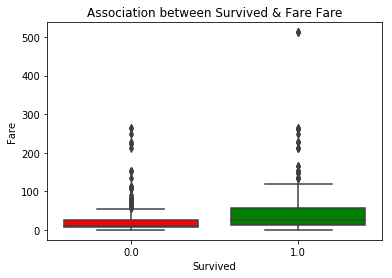

In [42]:
boxplot_and_correlation(df_train.Survived, df_train.Fare)

**Temuan**: Distribusi Fare antara berbagai kategori Survived (0 dan 1) berbeda (sangat sedikit overlap) yang menjadikannya prediktor yang cukup kuat untuk Survived yang ternyata benar dari nilai korelasi 0,257307 dan nilai p (kurang dari 0,01 ) yang menunjukkan bahwa kami 99% yakin bahwa korelasi ini signifikan secara statistik. Juga kelangsungan hidup berkorelasi positif dengan Fare, jadi semakin Anda membayar untuk Fare, semakin besar peluang Anda untuk bertahan hidup yang terlihat dari boxplot.

Mean Fare of Survivors vs Victims:


Survived
survived    48.40
died        22.12
Name: Fare, dtype: float64

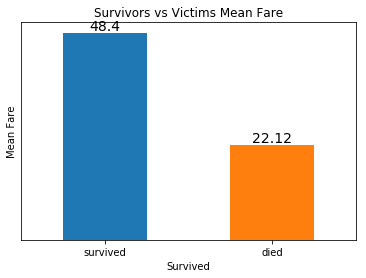

In [43]:
'''So the mean fare of survivors should be much more (positive correlation or boxplot interpretation) than those who died. Calculate mean fare paid by the survivors as well as by the victims.'''
nume_grouped_by_cat(df_train.Fare, df_train.Survived)

Sepertinya, jika Anda membayar lebih untuk tiket Anda, Anda lebih mungkin bertahan hidup. Mari kita plot histogram korban dan korban bersama-sama untuk memvalidasi intuisi kami:

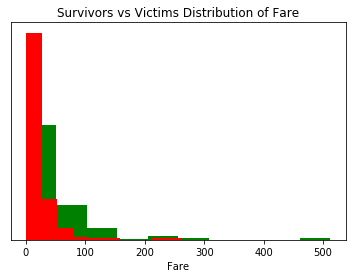

In [44]:
"""Plot histogram of survivor's vs victims fare."""
nume_hist_by_cat(df_train.Fare, df_train.Survived)

**Itu benar. Penumpang yang membayar lebih secara adil, sebagian besar selamat.**

**ANOVA: Uji ANOVA (ANalysis Of VAriance)** memungkinkan kita memeriksa apakah variabel respon numerik bervariasi sesuai dengan level (atau kelas) dari variabel kategori. Ketika kita hanya merujuk pada 'ANOVA', biasanya kita mengartikan 'one way' ANOVA yang merupakan tes untuk mengeksplorasi dampak dari satu faktor tunggal pada tiga atau lebih kelompok (tetapi dua kelompok juga akan melakukannya, seperti yang kami jelaskan di bawah).

Meskipun seseorang harus menggunakan korelasi titik biserial (jika variabel kategori adalah tipe biner) atau metode ANOVA untuk masalah ini untuk menemukan hubungan antara variabel kategori dan numerik, saya akan melakukan ANOVA juga untuk memiliki intuisi tentang bagaimana ANOVA bekerja. Meskipun ANOVA biasanya lebih disukai jika variabel kategori memiliki lebih dari dua kelompok, juga dimungkinkan untuk melakukan ANOVA untuk variabel kategori dengan dua kelompok.

ANOVA satu arah menguji apakah rata-rata dari beberapa variabel numerik berbeda di seluruh level satu variabel kategori. Pada dasarnya ini menjawab pertanyaan: apakah salah satu dari kelompok itu berbeda satu sama lain? Hipotesis nol adalah semua sarana kelompok adalah sama. Dan hipotesis alternatif adalah salah satu sarana kelompok yang berbeda satu sama lain.

In [45]:
"""Let's perform ANOVA between Fare and Survived. One can omit this step. I perform just to show how anova is performed if there were more than two groups in our categorical variable."""
anova(df_train.Fare, df_train.Survived)

Anova results: 63.03076422804448 6.120189341921873e-15


**Interpretasi hasil ANOVA**: Seperti p <0,05 kami menyatakan bahwa kami memiliki efek interaksi utama. Ini berarti bahwa di antara kelompok-kelompok setidaknya setiap satu kelompok (atau lebih) berarti secara statistik berbeda secara signifikan dari satu sama lain (benar hanya untuk lebih dari dua kelompok). Namun, hasil ini tidak mengidentifikasi satu pasangan sampel (atau lebih dari satu) yang menyebabkan signifikansi ini (sekali lagi berlaku untuk lebih dari dua kelompok variabel kategori tetapi kami hanya memiliki dua grup..i.e., 0 dan 1). Jadi, ketika ANOVA melaporkan 'efek interaksi' kita perlu mengidentifikasi lebih lanjut pasangan kelompok dengan menerapkan kontrol berpasangan (diperlukan untuk lebih dari dua kelompok variabel kategori). Meskipun kontrol ini dapat dilakukan dengan menerapkan uji t biasa tetapi ini bukan pendekatan yang tepat. Jadi post hoc-test (biasanya tes Tukey) dilakukan untuk menemukan pasangan atau pasangan yang menyebabkan perbedaan. Meskipun uji Tukey tidak diperlukan dengan variabel kategori kurang dari tiga kelompok. Tapi saya melakukan itu sehingga Anda bisa melakukan jika ada tiga kelompok.

**Catatan**: Tes Tukey tidak diperlukan jika ANOVA memberikan nilai p lebih besar dari 0,05 dan variabel nominal memiliki kurang dari tiga grup.

In [46]:
"""Perform Tukey's test using pairwise_tukeyhsd() function. One can omit Anova and Tukey's test for categorical variable less than three levels by performing biserial correlation."""
tukey_test(df_train.Fare, df_train.Survived)

<class 'statsmodels.iolib.table.SimpleTable'>

'True' dalam kolom reject menunjukkan bahwa ada perbedaan yang signifikan secara statistik ("True" untuk menolak hipotesis kosong) antara kelompok-kelompok dalam pasangan 0-1, yaitu, dapat dikatakan tingkat bertahan secara statistik terkait dengan Fare.

##### 8.1.2 Age dan Survived

Correlation between Age and Survived : PointbiserialrResult(correlation=-0.05953689941956393, pvalue=0.07569419096180038)


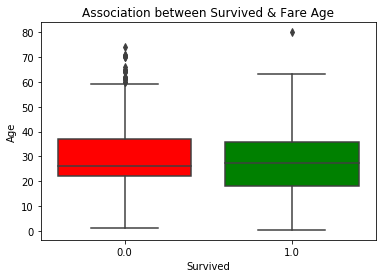

In [47]:
boxplot_and_correlation(df_train.Survived, df_train.Age)

**Temuan**: Boxplot menunjukkan distribusi Age antara kategori Survived (1 dan 0) memiliki tumpang tindih yang signifikan yang juga  dibenarkan dari nilai korelasi kecil -0.05939. Dan nilai p lebih besar dari 0,05 menunjukkan bahwa tidak ada bukti bahwa korelasi tersebut signifikan secara statistik. Seperti yang dapat kita lihat bahwa Survived berkorelasi terbalik dengan Age, jadi jika Anda lebih muda, Anda kemungkinan besar akan bertahan hidup.

Mean Age of Survivors vs Victims:


Survived
died        29.84
survived    28.18
Name: Age, dtype: float64

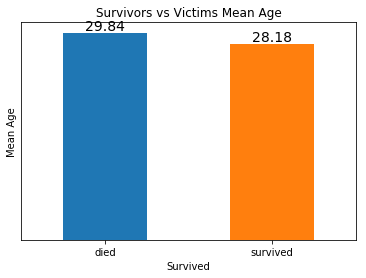

In [48]:
nume_grouped_by_cat(df_train.Age, df_train.Survived)

Menganalisis kotak dan plot di atas bar, kita memiliki intuisi bahwa orang yang lebih muda, rata-rata, lebih mungkin untuk bertahan hidup. Mari kita plot satu histogram usia penyintas dan usia lain dari korban untuk memvalidasi intuisi kami.

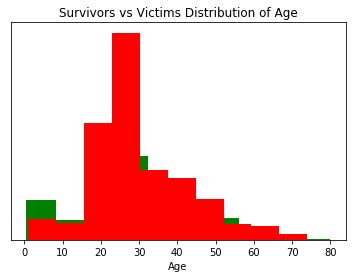

In [49]:
nume_hist_by_cat(df_train.Age, df_train.Survived)

Kami melihat bayi dan anak-anak memiliki tingkat kelangsungan hidup yang tinggi. Penumpang tertua (Usia = 80) selamat. Sejumlah besar penumpang berusia 16-30 meninggal.

In [50]:
anova(df_train.Age, df_train.Survived)

Anova results: 3.162396652163441 0.07569419096180038


**Catatan**: Pilih korelasi biserial (jika variabel kategori memiliki dua grup) atau Anova. Jika anova menyatakan efek interaksi utama (yaitu, p <0,05) dan variabel kategori memiliki lebih dari dua kategori (seperti baik, lebih baik, terbaik), maka lakukan tes tukey untuk mengetahui pasangan atau pasangan yang menyebabkan perbedaan (yaitu, interaksi utama efek).

**Interpretasi hasil ANOVA**: Karena p> 0,05, kita dapat mengatakan bahwa peluang bertahan hidup secara statistik tidak terkait dengan Age.

#### 8.2 Kategori dan kategori variabel

Kami akan menghitung dan memplot frekuensi absolut dan relatif dari output variabel kategori dengan variabel nominal prediktor. Hitung uji chi square antara variabel nominal target dan variabel prediktor. Terakhir, hitung nilai P yang disesuaikan dengan Bonferroni jika tabel kontingensi memiliki dimensi lebih dari 2x2.

In [51]:
'''#1.Create a function that calculates absolute and relative frequency of Survived variable by a categorical variable. And then plots the absolute and relative frequency of Survived by a categorical variable.'''
def crosstab(cat, cat_target):
    '''cat = categorical variable, cat_target = our target categorical variable.'''
    global ax, ax1
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    cat_grouped_by_cat_target.rename({0:'Victims', 1:'Survivors'}, axis = 'columns', inplace = True)  # Renaming the columns
    pct_cat_grouped_by_cat_target = round(pd.crosstab(index = cat, columns = cat_target, normalize = 'index')*100, 2)
    pct_cat_grouped_by_cat_target.rename({0:'Victims(%)', 1:'Survivors(%)'}, axis = 'columns', inplace = True)
    print('Survivals and Deaths by', cat.name,':', '\n',cat_grouped_by_cat_target )
    print('\nPercentage Survivals and Deaths by', cat.name, ':','\n', pct_cat_grouped_by_cat_target)
    
    # Plot absolute frequency of Survived by a categorical variable
    ax =  cat_grouped_by_cat_target.plot.bar(color = ['r', 'g'])
    plt.title('Survival vs Death Count by %s' %cat.name)
    abs_bar_labels()
    plt.show()
    
    # Plot relative frequrncy of Survived by a categorical variable
    ax1 = pct_cat_grouped_by_cat_target.plot.bar(color = ['r', 'g'])
    plt.title('Percentage Survival vs Death Count by %s' %cat.name)
    pct_bar_labels()
    plt.show()
    
'''#2.Create a function to calculate chi_square test between a categorical and target categorical variable.'''
def chi_square(cat, cat_target):
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    test_result = stats.chi2_contingency (cat_grouped_by_cat_target)
    print('Chi_square test result between Survived & %s' %cat.name)
    return display(test_result)

'''#3.Finally create another function to calculate Bonferroni-adjusted pvalue for a categorical and target categorical variable.'''
def bonferroni_adjusted(cat, cat_target):
    dummies = pd.get_dummies(cat)
    for columns in dummies:
        crosstab = pd.crosstab(dummies[columns], cat_target)
        print(stats.chi2_contingency(crosstab))
    print('\nColumns:', dummies.columns)

#### 8.2.1 Sex dan Survived

Survivals and Deaths by Sex : 
 Survived  Victims  Survivors
Sex                         
female         81        233
male          468        109

Percentage Survivals and Deaths by Sex : 
 Survived  Victims(%)  Survivors(%)
Sex                               
female         25.80         74.20
male           81.11         18.89


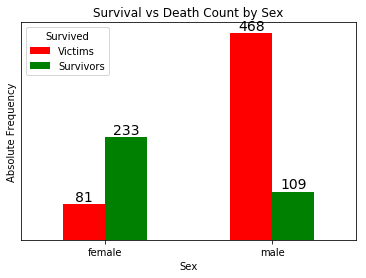

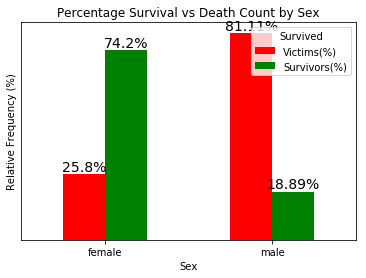

In [52]:
'''Count and plot the no of passergers who survived and died due to their sex in absolute and relative scale.'''
crosstab(df_train.Sex, df_train.Survived)

**Temuan**: Dari 342 orang yang selamat, 233 orang adalah perempuan sementara hanya 109 penumpang berjenis kelamin laki-laki. Jadi korban perempuan lebih dari dua kali lipat dari laki-laki yang selamat. Proporsi mengatakan perempuan memiliki lebih dari 74% kemungkinan bertahan hidup sementara laki-laki memiliki hampir 19% kemungkinan bertahan hidup. Jadi perempuan memiliki peluang terbaik untuk bertahan hidup.

**Uji Chi-square**: Uji Chi-square uji independensi jika ada hubungan yang signifikan antara dua variabel kategori. Data biasanya ditampilkan dalam format tabulasi silang dengan setiap baris mewakili kategori untuk satu variabel dan setiap kolom mewakili kategori untuk variabel lain. Uji independensi chi-square adalah tes omnibus. Itu menguji data secara keseluruhan. Ini berarti bahwa seseorang tidak akan dapat mengetahui level (kategori) mana dari variabel yang bertanggung jawab untuk hubungan jika tabel Chi-square lebih besar dari 2 × 2. Jika tes lebih besar dari 2 × 2, tes ini membutuhkan pengujian post hoc.

- The H0 (Null Hypothesis): Tidak ada hubungan antara variabel satu dan variabel dua.

- The H1 (Alternative Hypothesis): Ada hubungan antara variabel 1 dan variabel 2.

Jika p-value signifikan (kurang dari 0,05), Anda dapat menolak hipotesis kosong dan mengklaim bahwa temuan mendukung hipotesis alternatif. Sementara kami memeriksa hasil tes chi2, kami juga perlu memeriksa bahwa frekuensi sel yang diharapkan lebih besar dari atau sama dengan 5. Jika sel memiliki frekuensi yang diharapkan kurang dari 5, maka uji Exact Fisher harus digunakan untuk mengatasi masalah ini.

Metode chi2_contingency () melakukan uji Chi-square pada tabel kontingensi (crosstab).

In [53]:
'''Perform chi-square test of independence between Survived and Sex.'''
chi_square(df_train.Sex, df_train.Survived)

Chi_square test result between Survived & Sex


(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

**Interpretasi hasil tes chi-square**: Nilai pertama (260,717) adalah nilai Chi-square, diikuti oleh p-value (1,197e-58), kemudian muncul freedom degree(1), dan terakhir itu output yang diharapkan frekuensi sebagai array. Karena semua frekuensi yang diharapkan lebih besar dari 5, hasil tes chi2 dapat dipercaya. Kita dapat menolak hipotesis nol karena p-value kurang dari 0,05 (nilai p infact hampir 0). Dengan demikian, hasil menunjukkan bahwa ada hubungan yang signifikan secara statistik antara Sex dan Survived.

#### 8.2.2 Pclass dan Survived

Survivals and Deaths by Pclass : 
 Survived  Victims  Survivors
Pclass                      
1              80        136
2              97         87
3             372        119

Percentage Survivals and Deaths by Pclass : 
 Survived  Victims(%)  Survivors(%)
Pclass                            
1              37.04         62.96
2              52.72         47.28
3              75.76         24.24


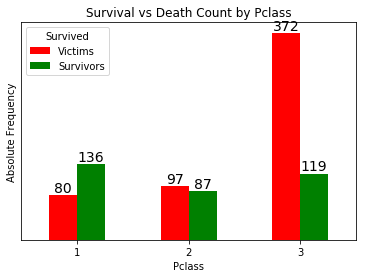

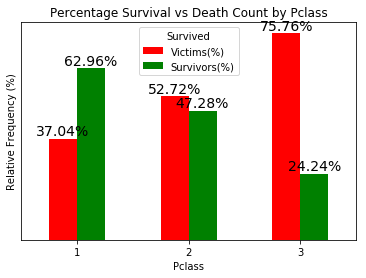

In [54]:
crosstab(df_train.Pclass, df_train.Survived)

**Temuan**: Dari 342 orang yang selamat, pclass1 (136) memiliki paling banyak korban yang diikuti oleh pclass3 (119) dan pclass2 (87). Tetapi persentasenya menceritakan kisah yang berbeda. Jika Anda berada di kelas 1, peluang Anda untuk bertahan hidup hampir 63%, sementara pclass2 memiliki peluang kelangsungan hidup sebesar 47%. Tetapi jika Anda berada di kelas 3, peluang Anda untuk bertahan hidup sangat suram, yaitu, lebih dari 24%.

In [55]:
chi_square(df_train.Pclass, df_train.Survived)

Chi_square test result between Survived & Pclass


(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

**Interpretasi hasil tes chi-square**: Keseluruhan tabel 3x2 memiliki nilai chi-square 102.889, nilai dari 4.549e-23, derajat kebebasan 2 dan sisanya adalah frekuensi yang diharapkan dari array. Karena semua frekuensi yang diharapkan lebih besar dari 5, hasil tes chi2 dapat dipercaya. Kita dapat menolak hipotesis nol karena p-value kurang dari 0,05 (nilai p infact hampir 0). Dengan demikian, hasil menunjukkan bahwa ada hubungan yang signifikan secara statistik antara Pclass dan survivor titanic.

**Post Hoc Test**: Meskipun uji Chi-square kami cukup signifikan, karena analisis kami adalah 3x2, kami tidak tahu level Pclass mana (1, 2 atau 3) yang memiliki hubungan terkuat dengan variabel Survived. Oleh karena itu kita perlu melakukan tes post hoc untuk memverifikasi apakah dan kombinasi mana yang benar-benar terkait dengan Survived. Untuk melakukan ini, kita perlu melakukan beberapa tes 2 × 2 Chi-square menggunakan nilai p-Bonferroni yang disesuaikan.

Untuk melakukan beberapa tes 2x2 Chi-square, seseorang perlu menyusun kembali variabel untuk setiap tes ke mana itu adalah satu kategori terhadap sisanya. Bagi kami, itu akan menjadi:

* 1 vs 2

* 1 vs 3

* 2 vs 3

**Karena ada tiga perbandingan, nilai P yang disesuaikan Bonferroni yang diperlukan untuk signifikansi adalah 0,05 / 3, atau 0,017. Jadi untuk setiap perbandingan berpasangan yang direncanakan menjadi signifikan, p-value harus kurang dari 0,017.**


In [56]:
'''Calculate Bonferroni-adjusted pvalue for Pclass (1,2,3) and Survived.'''
bonferroni_adjusted(df_train.Pclass, df_train.Survived)

(71.46583854616047, 2.821002116713357e-17, 1, array([[415.90909091, 259.09090909],
       [133.09090909,  82.90909091]]))
(7.2971925540056475, 0.006906243870048795, 1, array([[435.62626263, 271.37373737],
       [113.37373737,  70.62626263]]))
(91.23179223158795, 1.277904920294387e-21, 1, array([[246.46464646, 153.53535354],
       [302.53535354, 188.46464646]]))

Columns: Int64Index([1, 2, 3], dtype='int64')


**Interpretasi hasil uji nilai p-nilai Bonferroni**: Menggunakan nilai p-nilai Bonferroni 0,017, 3 dari 3 perbandingan berpasangan yang direncanakan adalah signifikan. Meskipun nilai p menunjukkan Pclass2 memiliki hubungan terlemah dengan Survived dibandingkan dengan Pclass1 dan Pclass3.

#### 8.2. Embarked dan Survived

Survivals and Deaths by Embarked : 
 Survived  Victims  Survivors
Embarked                    
C              75         93
Q              47         30
S             427        219

Percentage Survivals and Deaths by Embarked : 
 Survived  Victims(%)  Survivors(%)
Embarked                          
C              44.64         55.36
Q              61.04         38.96
S              66.10         33.90


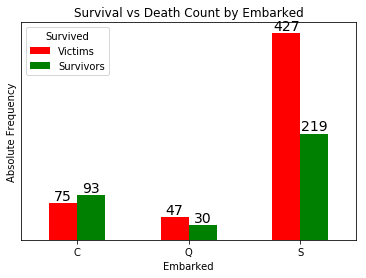

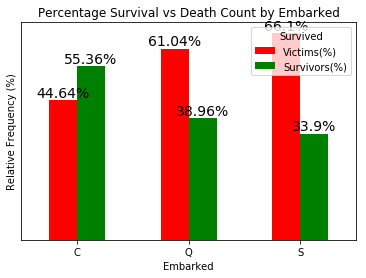

In [57]:
crosstab(df_train.Embarked, df_train.Survived)

**Temuan**: Meskipun orang-orang yang berangkat dari Southampton memiliki jumlah yang paling banyak selamat (219) tetapi secara proporsional hanya memiliki hampir 34% peluang untuk bertahan hidup. Karena 427 penumpang yang berangkat dari Southampton meninggal. Sebaliknya, jika Anda akan memulai dari Cherbourg, Anda memiliki kesempatan yang sangat baik untuk bertahan hidup lebih dari 55%. Akhirnya, orang-orang yang berangkat dari Queenstown memiliki peluang untuk bertahan hidup lebih dari 5% dari mereka yang berangkat dari Southampton.

In [58]:
chi_square(df_train.Embarked, df_train.Survived)

Chi_square test result between Survived & Embarked


(25.964452881874784,
 2.3008626481449577e-06,
 2,
 array([[103.51515152,  64.48484848],
        [ 47.44444444,  29.55555556],
        [398.04040404, 247.95959596]]))

**Interpretasi hasil tes chi-square**: Tabel 3x2 memiliki nilai chi-square 25,96, nilai 2,3e-06, derajat kebebasan 2 dan sisanya adalah frekuensi yang diharapkan dari array. Karena semua frekuensi yang diharapkan lebih besar dari 5, hasil tes chi2 dapat dipercaya. Kita dapat menolak hipotesis kosong karena p-value kurang dari 0,05 (nilai p infact kurang dari 0,01). Dengan demikian, hasil menunjukkan bahwa ada hubungan yang signifikan secara statistik antara variabel Embarked dan Survived.

**Karena ada tiga perbandingan, nilai P yang disesuaikan Bonferroni yang diperlukan untuk signifikansi adalah 0,05 / 3, atau 0,017. Jadi untuk setiap perbandingan berpasangan yang direncanakan menjadi signifikan, p-value harus kurang dari 0,017.**

In [59]:
bonferroni_adjusted(df_train.Embarked, df_train.Survived)

(24.34294028991685, 8.062166851376562e-07, 1, array([[445.48484848, 277.51515152],
       [103.51515152,  64.48484848]]))
(0.00018551307377882246, 0.9891328942213099, 1, array([[501.55555556, 312.44444444],
       [ 47.44444444,  29.55555556]]))
(19.279400244953347, 1.1291808110540787e-05, 1, array([[150.95959596,  94.04040404],
       [398.04040404, 247.95959596]]))

Columns: Index(['C', 'Q', 'S'], dtype='object')


**Menginterpretasikan hasil dari nilai-nilai yang disesuaikan dengan nilai pasangan**: Nilai p-value Bonferroni yang disesuaikan 0,017, 2 dari 3 perbandingan berpasangan yang direncanakan adalah signifikan. Nilai p yang disesuaikan dengan Bonferroni untuk Q dan Survived adalah 0,989 yang jauh lebih besar dari 0,017. Jadi dapat dikatakan bahwa level Q dari variabel Embarked tidak terkait secara statistik dengan variabel Survived.

#### 8.2.4 SibSip dan Survived

Survivals and Deaths by SibSp : 
 Survived  Victims  Survivors
SibSp                       
0             398        210
1              97        112
2              15         13
3              12          4
4              15          3
5               5          0
8               7          0

Percentage Survivals and Deaths by SibSp : 
 Survived  Victims(%)  Survivors(%)
SibSp                             
0              65.46         34.54
1              46.41         53.59
2              53.57         46.43
3              75.00         25.00
4              83.33         16.67
5             100.00          0.00
8             100.00          0.00


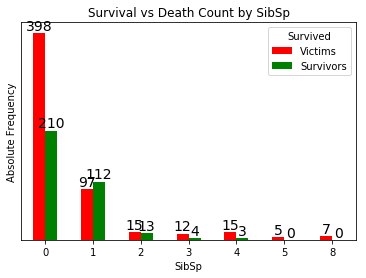

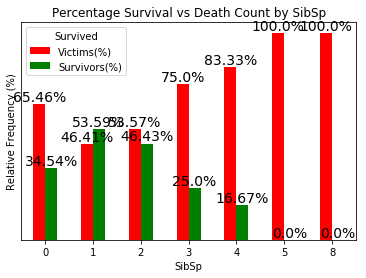

In [60]:
crosstab(df_train.SibSp, df_train.Survived)

**Temuan**: Sejumlah besar penumpang (210) yang selamat tanpa (0) saudara atau pasangan, diikuti oleh 112 penumpang dengan 1 pasangan atau saudara kandung. Persentase-bijaksana, penumpang dengan 1 pasangan atau saudara kandung memiliki lebih dari 53,5% kemungkinan bertahan hidup, diikuti oleh penumpang dengan 2 saudara kandung atau pasangan memiliki lebih dari 46% kemungkinan bertahan hidup. Penumpang dengan 5 atau 8 saudara kandung atau pasangan semuanya telah meninggal.

In [61]:
chi_square(df_train.SibSp, df_train.Survived)

Chi_square test result between Survived & SibSp


(37.2717929152043,
 1.5585810465902147e-06,
 6,
 array([[374.62626263, 233.37373737],
        [128.77777778,  80.22222222],
        [ 17.25252525,  10.74747475],
        [  9.85858586,   6.14141414],
        [ 11.09090909,   6.90909091],
        [  3.08080808,   1.91919192],
        [  4.31313131,   2.68686869]]))

**Interpretasi Uji Chi-square**: Karena semua frekuensi yang diharapkan tidak lebih besar dari 5, hasil tes chi-square tidak dapat dipercaya.

#### 8.2.5 Parch dan Survived

Survivals and Deaths by Parch : 
 Survived  Victims  Survivors
Parch                       
0             445        233
1              53         65
2              40         40
3               2          3
4               4          0
5               4          1
6               1          0

Percentage Survivals and Deaths by Parch : 
 Survived  Victims(%)  Survivors(%)
Parch                             
0              65.63         34.37
1              44.92         55.08
2              50.00         50.00
3              40.00         60.00
4             100.00          0.00
5              80.00         20.00
6             100.00          0.00


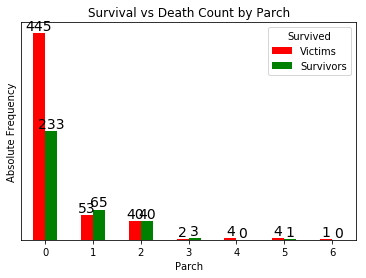

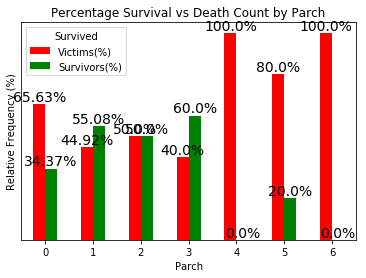

In [62]:
crosstab(df_train.Parch, df_train.Survived)

**Temuan**: Penumpang dengan 3 anak / orang tua memiliki tingkat kelangsungan hidup 60%, diikuti oleh penumpang dengan 2 anak / orang tua memiliki tingkat kelangsungan hidup 50%. Tidak ada penumpang yang selamat dengan 4 atau 6 anak / orang tua.

In [63]:
chi_square(df_train.Parch, df_train.Survived)

Chi_square test result between Survived & Parch


(27.925784060236168,
 9.703526421039997e-05,
 6,
 array([[4.17757576e+02, 2.60242424e+02],
        [7.27070707e+01, 4.52929293e+01],
        [4.92929293e+01, 3.07070707e+01],
        [3.08080808e+00, 1.91919192e+00],
        [2.46464646e+00, 1.53535354e+00],
        [3.08080808e+00, 1.91919192e+00],
        [6.16161616e-01, 3.83838384e-01]]))

**Interpretasi Hasil Uji Chi-square**: Karena semua frekuensi yang diharapkan tidak lebih besar dari 5, hasil tes chi-square tidak dapat dipercaya.

#### 8.2.6 Title dan Survived

Survivals and Deaths by Title : 
 Survived    Victims  Survivors
Title                         
Aristocrat        2          3
Master           17         23
Miss             55        130
Mr              436         81
Mrs              26        100
Officer          13          5

Percentage Survivals and Deaths by Title : 
 Survived    Victims(%)  Survivors(%)
Title                               
Aristocrat       40.00         60.00
Master           42.50         57.50
Miss             29.73         70.27
Mr               84.33         15.67
Mrs              20.63         79.37
Officer          72.22         27.78


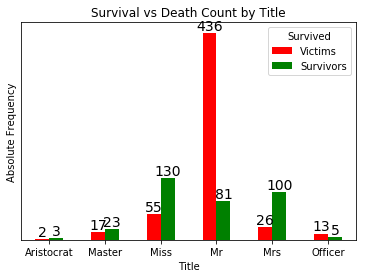

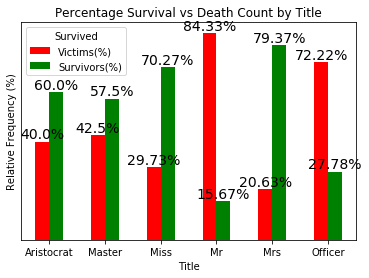

In [64]:
crosstab(df_train.Title, df_train.Survived)

**Temuan**: Wanita memiliki tingkat kelangsungan hidup terbaik, yaitu, Mrs. (Lebih dari 79%) dan Miss (lebih dari 70%) yang mengingatkan kita pada variabel Seks di mana kita telah melihat perempuan lebih mungkin bertahan hidup. Mr adalah gelar terburuk yang harus dimiliki saat datang ke situasi bertahan hidup karena lebih dari 15% penumpang dengan gelar Mr selamat yang lagi menunjukkan pentingnya seks sebagai pemutus kesepakatan untuk bertahan hidup.

In [65]:
chi_square(df_train.Title, df_train.Survived)

Chi_square test result between Survived & Title


(289.8360961873925,
 1.5325912223703196e-60,
 5,
 array([[  3.08080808,   1.91919192],
        [ 24.64646465,  15.35353535],
        [113.98989899,  71.01010101],
        [318.55555556, 198.44444444],
        [ 77.63636364,  48.36363636],
        [ 11.09090909,   6.90909091]]))

**Interpretasi hasil tes chi-square**: Karena semua frekuensi yang diharapkan tidak lebih besar dari 5, hasil tes chi-square tidak dapat dipercaya

#### 8.2.7 Family_size dan Survived

Survivals and Deaths by Family_size : 
 Survived     Victims  Survivors
Family_size                    
large             40          7
medium            20         24
single           374        163
small            115        148

Percentage Survivals and Deaths by Family_size : 
 Survived     Victims(%)  Survivors(%)
Family_size                          
large             85.11         14.89
medium            45.45         54.55
single            69.65         30.35
small             43.73         56.27


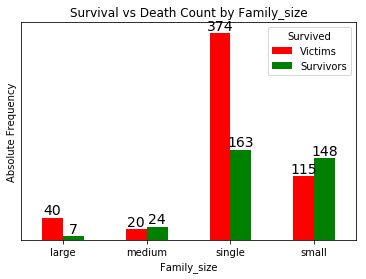

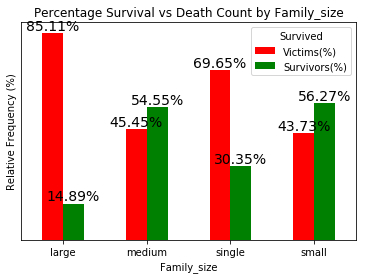

In [66]:
crosstab(df_train.Family_size, df_train.Survived)

**Temuan**: Penumpang dengan ukuran keluarga kecil dan menengah memiliki tingkat kelangsungan hidup yang baik. Penumpang single memiliki peluang untuk bertahan hidup lebih dari 30%. Dan penumpang dengan keluarga besar memiliki tingkat kelangsungan hidup di bawah 15%.

In [67]:
chi_square(df_train.Family_size, df_train.Survived)

Chi_square test result between Survived & Family_size


(66.05581680279249,
 2.981870009647575e-14,
 3,
 array([[ 28.95959596,  18.04040404],
        [ 27.11111111,  16.88888889],
        [330.87878788, 206.12121212],
        [162.05050505, 100.94949495]]))

**Interpretasi hasil tes chi-square**: Karena semua frekuensi yang diharapkan lebih besar dari 5, hasil tes chi2 dapat dipercaya. Kita dapat menolak hipotesis nol karena p-value kurang dari 0,05 (nilai p infact hampir 0). Dengan demikian, hasil menunjukkan bahwa ada hubungan yang signifikan secara statistik antara variabel Family_size dan Survived.

**Karena ada 8 perbandingan, nilai P yang disesuaikan dengan Bonferroni yang diperlukan untuk signifikansi adalah 0,05 / 8, atau 0,0063. Jadi untuk setiap perbandingan berpasangan yang direncanakan menjadi signifikan, p-value harus kurang dari 0,0063.**

In [68]:
bonferroni_adjusted(df_train.Family_size, df_train.Survived)

(10.55137053799774, 0.0011610196650239893, 1, array([[520.04040404, 323.95959596],
       [ 28.95959596,  18.04040404]]))
(4.418221527178599, 0.03555707818485421, 1, array([[521.88888889, 325.11111111],
       [ 27.11111111,  16.88888889]]))
(36.00051446773865, 1.9726543846517113e-09, 1, array([[218.12121212, 135.87878788],
       [330.87878788, 206.12121212]]))
(49.42743388214718, 2.058468013374345e-12, 1, array([[386.94949495, 241.05050505],
       [162.05050505, 100.94949495]]))

Columns: Index(['large', 'medium', 'single', 'small'], dtype='object')


**Interpretasi hasil uji Post-hoc Bonferroni yang disesuaikan**: Menggunakan nilai p-Bonferroni yang disesuaikan sebesar 0,0063, 3 dari 4 perbandingan berpasangan yang direncanakan adalah signifikan. Nilai p-nilai Bonferroni untuk medium dan Survived adalah 0,03555 yang jauh lebih besar dari 0,0063. Jadi dapat dikatakan bahwa tingkat menengah variabel Family_size tidak terkait secara statistik dengan variabel Bertahan Hidup.

#### 8.2.8 Cabin dan Survived

Survivals and Deaths by Cabin : 
 Survived  Victims  Survivors
Cabin                       
A               8          7
B              12         35
C              24         35
D               8         25
E               8         24
F               5          8
G               2          2
T               1          0
X             481        206

Percentage Survivals and Deaths by Cabin : 
 Survived  Victims(%)  Survivors(%)
Cabin                             
A              53.33         46.67
B              25.53         74.47
C              40.68         59.32
D              24.24         75.76
E              25.00         75.00
F              38.46         61.54
G              50.00         50.00
T             100.00          0.00
X              70.01         29.99


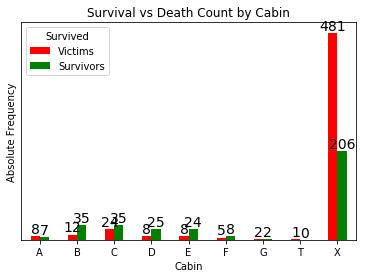

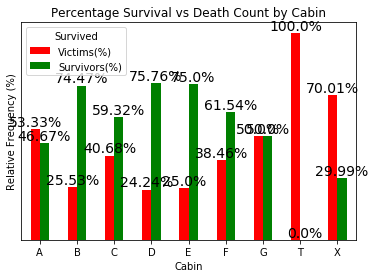

In [70]:
crosstab(df_train.Cabin, df_train.Survived)

**Temuan**: Sebagian besar penumpang selamat dan meninggal adalah dari kabin X. Tapi persentase-bijaksana, kategori B, D, dan E yang memiliki peluang yang mengesankan untuk bertahan hidup. Orang-orang dari kategori kabin X hanya memiliki 30% kesempatan untuk bertahan hidup.

In [72]:
chi_square(df_train.Cabin, df_train.Survived)

Chi_square test result between Survived & Cabin


(99.16416061888009,
 6.326020042314704e-18,
 8,
 array([[9.24242424e+00, 5.75757576e+00],
        [2.89595960e+01, 1.80404040e+01],
        [3.63535354e+01, 2.26464646e+01],
        [2.03333333e+01, 1.26666667e+01],
        [1.97171717e+01, 1.22828283e+01],
        [8.01010101e+00, 4.98989899e+00],
        [2.46464646e+00, 1.53535354e+00],
        [6.16161616e-01, 3.83838384e-01],
        [4.23303030e+02, 2.63696970e+02]]))

**Interpretasi hasil tes chi-square**: Karena semua frekuensi yang diharapkan tidak lebih besar dari 5, hasil tes chi2 tidak dapat dipercaya.

#### 8.2.9 Ticket dan Survived

Survivals and Deaths by Ticket : 
 Survived  Victims  Survivors
Ticket                      
A              27          2
C              31         16
F               3          4
L               3          1
N             407        254
P              23         42
S              44         21
W              11          2

Percentage Survivals and Deaths by Ticket : 
 Survived  Victims(%)  Survivors(%)
Ticket                            
A              93.10          6.90
C              65.96         34.04
F              42.86         57.14
L              75.00         25.00
N              61.57         38.43
P              35.38         64.62
S              67.69         32.31
W              84.62         15.38


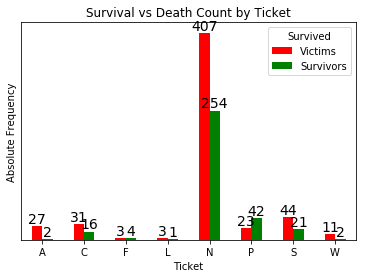

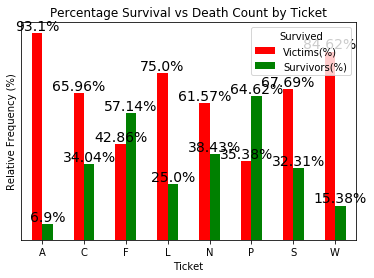

In [73]:
crosstab(df_train.Ticket, df_train.Survived)

**Temuan**: 93% penumpang meninggal dengan kategori Tiket A, lebih dari 64% selamat dari kategori P. Lebih dari 57% selamat dari F dan lebih dari 15% penumpang selamat dari kategori tiket W.

In [74]:
chi_square(df_train.Ticket, df_train.Survived)

Chi_square test result between Survived & Ticket


(36.7098892616397,
 5.323006335674428e-06,
 7,
 array([[ 17.86868687,  11.13131313],
        [ 28.95959596,  18.04040404],
        [  4.31313131,   2.68686869],
        [  2.46464646,   1.53535354],
        [407.28282828, 253.71717172],
        [ 40.05050505,  24.94949495],
        [ 40.05050505,  24.94949495],
        [  8.01010101,   4.98989899]]))

### 9. Multivariate Analysis

Dalam analisis multivariat, kami mencoba menemukan hubungan di antara lebih dari dua variabel. Jumlah variabel prediktor dalam analisis bivariat adalah satu. Sebaliknya, jumlah variabel prediktor untuk analisis multivariat lebih dari satu. Lebih khusus lagi, kami akan mencoba menghubungkan lebih dari satu variabel prediktor dengan variabel respons. Kami hanya akan memvisualisasikan dampak variabel prediktor yang berbeda (3 variabel) pada suatu waktu pada variabel Survived.

In [75]:
'''Create a function that plots the impact of 3 predictor variables at a time on a target variable.'''
def multivariate_analysis(cat1, cat2, cat3, cat_target):
    grouped = round(pd.crosstab(index = [cat1, cat2, cat3], columns = cat_target, normalize = 'index')*100, 2)
    grouped.rename({0:'Died%', 1:'Survived%'}, axis = 1, inplace = True)
    ax = grouped.plot.bar(color = ['r', 'g'])
    plt.ylabel('Relative Frequency (%)')

#### 9.1 (Pclass, Sex, Cabin) vs Survived 

**Sex male seems to be deciding factor for death.**

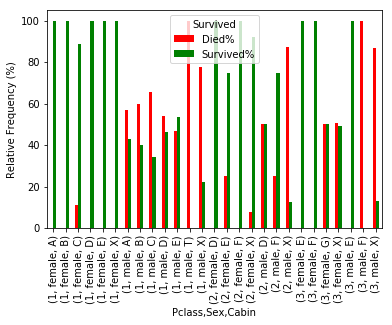

In [76]:
'''Proportion of survivors and victims due to pclass, sex, and cabin.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Cabin, df_train.Survived)
bold('**Sex male seems to be deciding factor for death.**')

#### 9.2 (Pclass, Sex, Embarked) vs Survived 

**Again Sex male seems to be deciding factor for death and female for survival.**

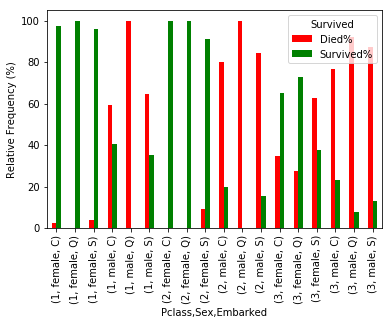

In [77]:
'''Proportion of survivors and victims due to pclass, sex, and embarked.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Embarked, df_train.Survived)
bold('**Again Sex male seems to be deciding factor for death and female for survival.**')

#### 9.3 (Pclass, Sex, SibSp) vs Survived

**Bigger SibSp and male is responsible more for death.**

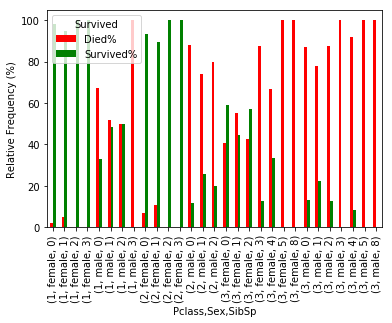

In [78]:
'''Proportion of survivors and victims due to pclass, sex, and SibSp.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.SibSp, df_train.Survived)
bold('**Bigger SibSp and male is responsible more for death.**')


#### 9.4 (Pclass, Sex, Parch) vs Survived

**Bigger Parch and Sex male is responsible more for death.**

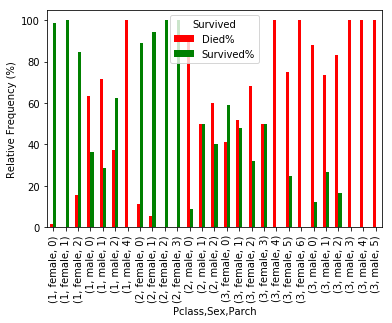

In [79]:
'''Proportion of survivors and victims due to pclass, sex, and Parch.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Parch, df_train.Survived)
bold('**Bigger Parch and Sex male is responsible more for death.**')

#### 9.5 (Pclass, Sex, Title) vs Survived

**Passengers with sex male and title mr mostly died.**

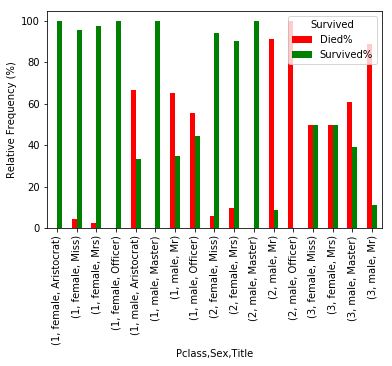

In [81]:
'''Proportion of survivors and victims due to pclass, sex, and title.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Title, df_train.Survived)
bold('**Passengers with sex male and title mr mostly died.**')


#### 9.6 Pclass, Sex, Family_size) vs Survived 

**Sex male, family_size single and large greatly influence the death ratio.**

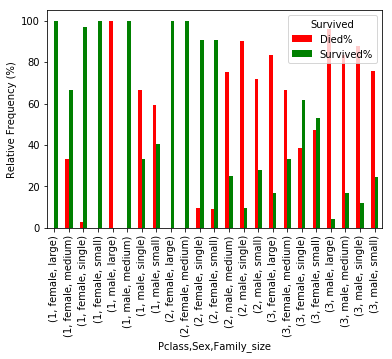

In [83]:
'''Proportion of survivors and victims due to pclass, sex, and family_size.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Family_size, df_train.Survived)
bold('**Sex male, family_size single and large greatly influence the death ratio.**')

#### 9.7 (Pclass, Sex, Ticket) vs Survived 

**Sex female, ticket p and w mostly survived.**

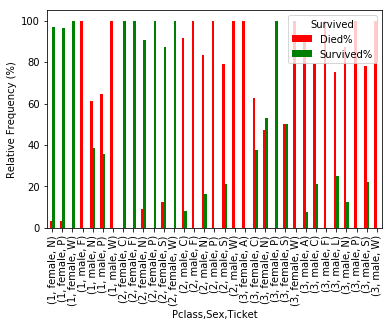

In [84]:
'''Proportion of survivors and victims due to pclass, sex, and Ticket category.'''
multivariate_analysis(df_train.Pclass, df_train.Sex, df_train.Ticket, df_train.Survived)
bold('**Sex female, ticket p and w mostly survived.**')


#### 9.8 (Pclass, Title, Cabin) vs Survived 

**Title mrs, master and cabin x had best survival ratio.**

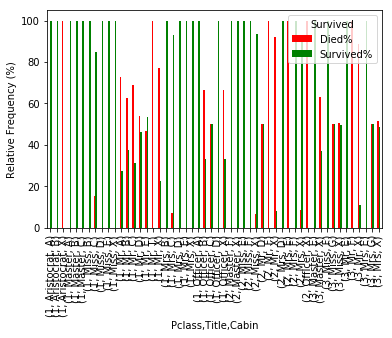

In [85]:
'''Proportion of survivors and victims due to pclass, title, and cabin.'''
multivariate_analysis(df_train.Pclass, df_train.Title, df_train.Cabin, df_train.Survived)
bold('**Title mrs, master and cabin x had best survival ratio.**')


#### 9.9 (Family_size, Sex, Cabin) vs Survived 

**Family_size small, medium and sex female had best survival chance.**

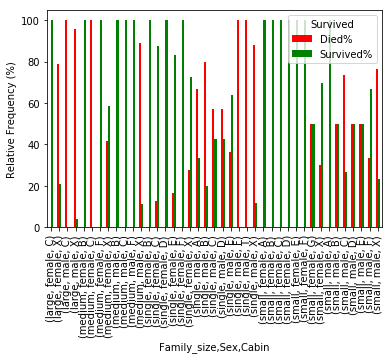

In [86]:
'''Proportion of survivors and victims due to family_size, sex, and cabin.'''
multivariate_analysis(df_train.Family_size, df_train.Sex, df_train.Cabin, df_train.Survived)
bold('**Family_size small, medium and sex female had best survival chance.**')

#### 9.10 (Sex, Title, Family_size) vs Survived

**Title aristocrat, sex female and family_size small mostly survived.**

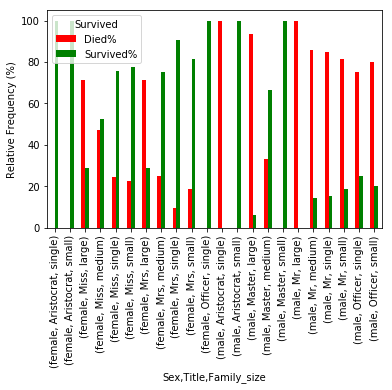

In [87]:
'''Proportion of survivors and victims due to sex, title, and family_size.'''
multivariate_analysis(df_train.Sex, df_train.Title, df_train.Family_size, df_train.Survived)
bold('**Title aristocrat, sex female and family_size small mostly survived.**')


#### 9.11 (Sex, Title, Cabin) vs Survived 

**Title aristocrat, miss, mrs and sex female mostly survived.**

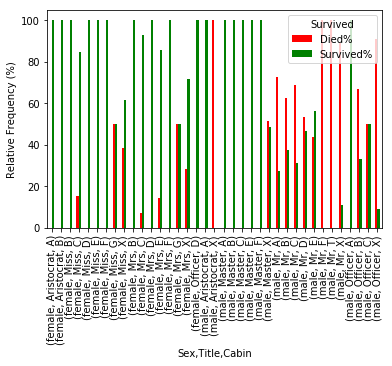

In [88]:
'''Proportion of survivors and victims due to sex, title, and cabin.'''
multivariate_analysis(df_train.Sex, df_train.Title, df_train.Cabin, df_train.Survived)
bold('**Title aristocrat, miss, mrs and sex female mostly survived.**')

#### 9.12 (Sex, Title, Embarked) vs Survived 

**Embarked c, sex female and title master and aristocrat had best survival rate.**

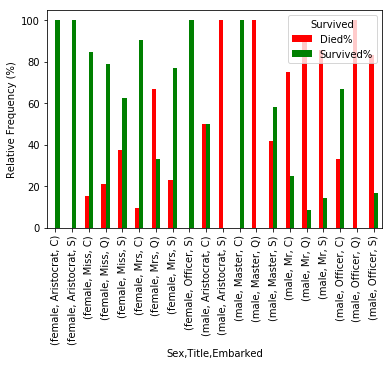

In [89]:
'''Proportion of survivors and victims due to sex, title, and embarked.'''
multivariate_analysis(df_train.Sex, df_train.Title, df_train.Embarked, df_train.Survived)
bold('**Embarked c, sex female and title master and aristocrat had best survival rate.**')

#### 9.13 (Sex, Title, Ticket) vs Survived

**Ticker n, w and sex male and title mr mostly died.**

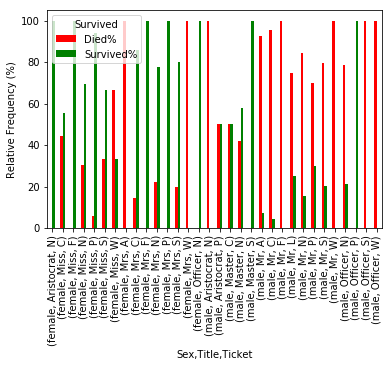

In [90]:
"""Proportion of survivors and victims due to sex, title, and Ticket."""
multivariate_analysis(df_train.Sex, df_train.Title, df_train.Ticket, df_train.Survived)
bold('**Ticker n, w and sex male and title mr mostly died.**')

### 10. Transformasi Data

Di bagian ini, kami akan mengkategorikan variabel berkelanjutan kami. Setelah itu, fitur redundan dan tidak berguna akan dihapus. Dan akhirnya variabel kategori akan dikodekan menjadi numerik untuk memberi makan model machine learning kami.

#### 10.1 Mengkelompokkan variabel kontinyu

Kami melihat Age berbanding terbalik dengan Survived dan bayi lebih mungkin bertahan hidup. Kami akan membuat beberapa kategori usia untuk memeriksa kategori usia mana yang lebih mungkin untuk bertahan hidup. Kami akan melakukan hal yang sama untuk Fare kecuali Fare secara positif berkorelasi dengan Survived.

**Catatan**: Mengkelompokkan variabel kontinyu mencegah overfitting yang merupakan masalah umum untuk model Decision Tree dan Random Forest.

##### 10.1.1 Binning Age

In [96]:
'''Create bin categories for Age.'''
label_names = ['infant','child','teenager','young_adult','adult','aged']

'''Create range for each bin categories of Age.'''
cut_points = [0,5,12,18,35,60,81]

'''Create and view categorized Age with original Age.'''
merged['Age_binned'] = pd.cut(merged.Age, cut_points, labels = label_names)
display(merged[['Age', 'Age_binned']].head(10))

Age   Age_binned
0  22.0  young_adult
1  38.0        adult
2  26.0  young_adult
3  35.0  young_adult
4  35.0  young_adult
5  26.0  young_adult
6  54.0        adult
7   2.0       infant
8  27.0  young_adult
9  14.0     teenager

##### 10.1.2 Binning Fare

In [95]:
'''Create bin categories for Fare.'''
groups = ['low','medium','high','very_high']

'''Create range for each bin categories of Fare.'''
cut_points = [-1, 130, 260, 390, 520]

'''Create and view categorized Fare with original Fare.'''
merged['Fare_binned'] = pd.cut(merged.Fare, cut_points, labels = groups)
display(merged[['Fare', 'Fare_binned']].head(10))

Fare Fare_binned
0   7.2500         low
1  71.2833         low
2   7.9250         low
3  53.1000         low
4   8.0500         low
5   8.4583         low
6  51.8625         low
7  21.0750         low
8  11.1333         low
9  30.0708         low

#### 10.2 Menghapus feature

Sekarang kita telah berubah dan transformasi variabel asli telah dibuat. Jadi kita harus melepaskan variabel yang menurut kita tidak akan berguna lagi untuk analisis kelangsungan hidup kita karena mereka sangat tidak mungkin dianalisis dalam bentuk mentah mereka.

In [97]:
"""Let's see all the variables we currently have with their category."""
display(merged.head(10))

'''Drop the features that would not be useful anymore.'''
merged.drop(columns = ['Name', 'Age', 'Fare'], inplace = True, axis = 1)

'''Features after dropping.'''
bold('**Features remaining after dropping:**')
display(merged.columns)


PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   
5            6       0.0       3   
6            7       0.0       1   
7            8       0.0       3   
8            9       1.0       3   
9           10       1.0       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  26.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch Ticket     Fare Cabin Embarked   Title Family_size   Age_binned  \
0      0      A   7.2500     X        S      Mr       small  young_adult   
1      0      P  71.2833     C        C     Mrs       small        adult   
2      0      S   7.9250     X        S    Miss      single  young_adult   
3      0      N  53.1000     C        S     Mrs       small  young_adult   
4      0      N   8.0500     X        S      Mr      single  young_adult   
5      0      N   8.4583     X        Q      Mr      single  young_adult   
6      0      N  51.8625     E        S      Mr      single        adult   
7      1      N  21.0750     X        S  Master      medium       infant   
8      2      N  11.1333     X        S     Mrs       small  young_adult   
9      0      N  30.0708     X        C     Mrs       small     teenager   

  Fare_binned  
0         low  
1         low  
2         low  
3         low  
4         low  
5         low  
6         low  
7         low  
8         low  
9         low

**Features remaining after dropping:**

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Cabin', 'Embarked', 'Title', 'Family_size', 'Age_binned',
       'Fare_binned'],
      dtype='object')

#### 10.3 Memperbaiki Tipe data

In [99]:
'''Checking current data types.'''
bold('**Current variable Data Types:**')
display(merged.dtypes)

**Current variable Data Types:**

PassengerId       int64
Survived        float64
Pclass            int64
Sex              object
SibSp             int64
Parch             int64
Ticket           object
Cabin            object
Embarked         object
Title            object
Family_size      object
Age_binned     category
Fare_binned    category
dtype: object

1. Tipe data PassengerId, SibSp, dan Parch akan tetap sama (integer).
2. Tipe data yang Survived akan diubah menjadi integer dan sisanya dari tipe data variabel akan diubah menjadi tipe data kategoris.

In [100]:
'''Correcting data types, converting into categorical variables.'''
merged.loc[:, ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title', 'Family_size', 'Ticket']] = merged.loc[:, ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title', 'Family_size', 'Ticket']].astype('category')

'''Due to merging there are NaN values in Survived for test set observations.'''
merged.Survived = merged.Survived.dropna().astype('int')#Converting without dropping NaN throws an error.

'''Check if data types have been corrected.'''
bold('**Data types after correction:**')
display(merged.dtypes)

**Data types after correction:**

PassengerId       int64
Survived          int64
Pclass         category
Sex            category
SibSp             int64
Parch             int64
Ticket         category
Cabin          category
Embarked       category
Title          category
Family_size    category
Age_binned     category
Fare_binned    category
dtype: object

#### 10.4 Encoding Variabel kategori

Gunakan satu pengkodean panas daripada pengkodean label karena algoritme mungkin memberikan bobot ke nilai yang lebih tinggi saat menggunakan pengkodean label.

In [102]:
'''Convert categorical data into numeric to feed our machine learning model.'''
merged = pd.get_dummies(merged)

"""Let's visualize the updated dataset."""
display(merged.head(10))

PassengerId  Survived  SibSp  Parch  Pclass_1  Pclass_2  Pclass_3  \
0            1         0      1      0         0         0         1   
1            2         1      1      0         1         0         0   
2            3         1      0      0         0         0         1   
3            4         1      1      0         1         0         0   
4            5         0      0      0         0         0         1   
5            6         0      0      0         0         0         1   
6            7         0      0      0         1         0         0   
7            8         0      3      1         0         0         1   
8            9         1      0      2         0         0         1   
9           10         1      1      0         0         1         0   

   Sex_female  Sex_male  Ticket_A          ...            Age_binned_infant  \
0           0         1         1          ...                            0   
1           1         0         0          ...                            0   
2           1         0         0          ...                            0   
3           1         0         0          ...                            0   
4           0         1         0          ...                            0   
5           0         1         0          ...                            0   
6           0         1         0          ...                            0   
7           0         1         0          ...                            1   
8           1         0         0          ...                            0   
9           1         0         0          ...                            0   

   Age_binned_child  Age_binned_teenager  Age_binned_young_adult  \
0                 0                    0                       1   
1                 0                    0                       0   
2                 0                    0                       1   
3                 0                    0                       1   
4                 0                    0                       1   
5                 0                    0                       1   
6                 0                    0                       0   
7                 0                    0                       0   
8                 0                    0                       1   
9                 0                    1                       0   

   Age_binned_adult  Age_binned_aged  Fare_binned_low  Fare_binned_medium  \
0                 0                0                1                   0   
1                 1                0                1                   0   
2                 0                0                1                   0   
3                 0                0                1                   0   
4                 0                0                1                   0   
5                 0                0                1                   0   
6                 1                0                1                   0   
7                 0                0                1                   0   
8                 0                0                1                   0   
9                 0                0                1                   0   

   Fare_binned_high  Fare_binned_very_high  
0                 0                      0  
1                 0                      0  
2                 0                      0  
3                 0                      0  
4                 0                      0  
5                 0                      0  
6                 0                      0  
7                 0                      0  
8                 0                      0  
9                 0                      0  

[10 rows x 49 columns]

### 11. Pembuatan Model dan Evaluasi

In [103]:
'''Set a seed for reproducibility'''
seed = 43

"""Let's split the train and test set to feed machine learning algorithm."""
df_train = merged.iloc[:891, :]
df_test  = merged.iloc[891:, :]

'''Drop passengerid from train set and Survived from test set.'''
df_train = df_train.drop(columns = ['PassengerId'], axis = 1)
df_test = df_test.drop(columns = ['Survived'], axis = 1)

'''Extract data sets as input and output for machine learning models.'''
X_train = df_train.drop(columns = ['Survived'], axis = 1) # Input matrix as pandas dataframe (dim:891*47).
y_train = df_train['Survived'] #Output vector as pandas series (dim:891*1)

"""Extract test set"""
X_test  = df_test.drop("PassengerId", axis = 1).copy()

'''See the dimensions of input and output data set.'''
display(X_train.shape, X_test.shape, y_train.shape)

(891, 47)

(418, 47)

(891,)

#### 11.1 Training model

Kami akan melatih 10 penggolong yang berbeda untuk masalah klasifikasi biner ini.

In [106]:
"""Building machine learning models: 
We will try 10 different classifiers to find the best classifier after tunning model's hyperparameters that will best generalize the unseen(test) data."""

'''Create a function that returns train accuracy of different models.'''
def train_accuracy(model):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    return train_accuracy

'''Now initialize all the classifiers object.'''
'''#1.Logistic Regression'''
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

'''#2.Support Vector Machines'''
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')

'''#3.Random Forest Classifier'''
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

'''#4.KNN'''
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

'''#5.Gaussian Naive Bayes'''
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

'''#6.Decision Tree Classifier'''
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = seed)

'''#7.Gradient Boosting Classifier'''
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = seed)

'''#8.Adaboost Classifier'''
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state = seed)

'''#9.ExtraTrees Classifier'''
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state = seed)

'''#10.Extreme Gradient Boosting'''
from xgboost import XGBClassifier
xgbc = XGBClassifier(random_state = seed)

'''Models with best training accuracy:'''
train_accuracy = pd.DataFrame({'Train_accuracy(%)':[train_accuracy(lr), train_accuracy(svc), train_accuracy(rf), train_accuracy(knn), train_accuracy(gnb), train_accuracy(dt), train_accuracy(gbc), train_accuracy(abc), train_accuracy(etc), train_accuracy(xgbc)]})
train_accuracy.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC', 'ETC', 'XGBC']
sorted_train_accuracy = train_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)
bold('**Training accuracy of classifiers:**')
display(sorted_train_accuracy)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**Training accuracy of classifiers:**

Train_accuracy(%)
RF                90.91
DT                90.91
ETC               90.91
GBC               86.64
XGBC              86.31
KNN               85.30
LR                84.06
ABC               84.06
SVC               83.05
GNB               80.02

**Sepertinya semua model berbasis tree memiliki akurasi train tertinggi mengikuti KNN, LR, ABC dan SVC. Tetapi akurasi train dari suatu model tidak cukup untuk mengetahui apakah suatu model dapat menyamaratakan data yang tidak terlihat atau tidak. Karena data train adalah sesuatu yang telah dilatih oleh model kami, yaitu, data model kami telah melihatnya. Kita semua tahu bahwa, tujuan membangun model pembelajaran mesin adalah untuk menyamaratakan data yang tidak terlihat, yaitu, data model kami belum terlihat. Oleh karena itu, kami tidak dapat menggunakan ketepatan pelatihan untuk evaluasi model kami, tetapi kami harus tahu bagaimana model kami akan tampil pada data yang belum dapat dilihat oleh model kami.**

#### 11.2 Model Evaluasi

Jadi pada dasarnya, untuk mengevaluasi kinerja model, kita memerlukan beberapa data (input) yang kita tahu kebenaran dasar (label). Untuk masalah ini, kami tidak tahu kebenaran dasar untuk set tes tetapi kami tahu untuk set train. Jadi idenya adalah untuk melatih dan mengevaluasi kinerja model pada data yang berbeda. Satu hal yang bisa kita lakukan adalah membagi train yang diatur dalam dua kelompok, biasanya dalam rasio 80:20. Itu berarti kami akan melatih model kami pada 80% data training dan kami menyimpan sisanya 20% untuk mengevaluasi model karena kami mengetahui kebenaran dasar untuk data 20% ini. Kemudian kita dapat membandingkan prediksi model kami dengan kebenaran dasar ini (untuk 20% data). Begitulah cara kami mengetahui bagaimana model kami akan tampil pada data yang tak terlihat. Ini adalah teknik evaluasi model pertama. Dalam sklearn kami memiliki metode train_test_split untuk itu.

Pemisahan Train_test memiliki kekurangannya. Karena pendekatan ini memperkenalkan bias karena kami tidak menggunakan semua pengamatan kami untuk pengujian dan juga kami juga mengurangi ukuran data kereta. Untuk mengatasinya kita dapat menggunakan teknik yang disebut cross validation dimana semua data digunakan untuk pelatihan dan pengujian secara berkala. Dengan demikian kita dapat mengurangi bias yang diperkenalkan oleh train_test_split. Dari berbagai metode cross validation, kami akan menggunakan k-fold cross validation. Dalam sklearn kami memiliki metode cross_val_score untuk menghitung k-fold cross validation.

Namun, train_test_split memiliki kelebihan dibandingkan k-fold cross validation saat set train bertambah besar. Train_test_split adalah k-kali lebih cepat dari k-fold cross validation. Jika set pelatihan sangat besar, baik train_test_split dan k-fold cross validation tampil identik. Jadi untuk data training yang besar, train_test_split lebih disukai untuk k-fold cross validation untuk mempercepat proses pelatihan.

#### 11.2.1 K-fold validation

Katakanlah kita akan menggunakan 10 kali k-cross validation. Jadi k = 10 dan kami memiliki total 891 pengamatan. Setiap kali lipat akan memiliki 891/10 = 89,1 observasi. Jadi pada dasarnya k-fold cross validation menggunakan fold-1 (89,1 samples) sebagai set pengujian dan k-1 (9 folds) sebagai set pelatihan dan menghitung akurasi tes. Prosedur ini berulang kali k (jika k = 10, lalu 10 waktu); setiap kali, kelompok pengamatan yang berbeda diperlakukan sebagai validasi atau set tes. Proses ini menghasilkan perkiraan k keakuratan tes yang kemudian dirata-ratakan.

In [107]:
'''Create a function that returns mean cross validation score for different models.'''
def x_val_score(model):
    from sklearn.model_selection import cross_val_score
    x_val_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    x_val_score = np.round(x_val_score*100, 2)
    return x_val_score

"""Let's perform k-fold (k=10) cross validation to find the best classifier with the best cross validation accuracy."""
x_val_score = pd.DataFrame({'X_val_score(%)':[x_val_score(lr), x_val_score(svc), x_val_score(rf), x_val_score(knn), x_val_score(gnb), x_val_score(dt), x_val_score(gbc), x_val_score(abc), x_val_score(etc), x_val_score(xgbc)]})
x_val_score.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC', 'ETC', 'XGBC']
sorted_x_val_score = x_val_score.sort_values(by = 'X_val_score(%)', ascending = False) 
bold('**Models Cross Validation Scores:**')
display(sorted_x_val_score)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/

**Models Cross Validation Scores:**

X_val_score(%)
LR             82.72
SVC            82.71
GBC            82.61
XGBC           82.27
KNN            81.61
ABC            81.48
ETC            81.26
RF             81.15
DT             80.14
GNB            77.69

**Saya selalu menemukan bahwa mencoba beberapa algoritma pada masalah yang sama mengungkapkan perbedaan yang sangat menarik dalam pola yang diambil algoritma dengan baik. Algoritma tidak setuju pada prediksi karena mereka memiliki cara berbeda dalam melihat data.**

**Temuan**: Sepertinya LR dan SVC memiliki akurasi cross validation tertinggi di antara pengklasifikasi, diikuti oleh GBC, XGBC, KNN, ABC, ETC dan RF.

##### 11.2.2 Tuning Hyperparameter

**Sekarang mari kita tambahkan Pencarian Grid ke semua pengklasifikasi dengan harapan mengoptimalkan hiperparameter dan meningkatkan keakuratannya. Apakah parameter model default merupakan pilihan terbaik? Mari kita cari tahu.**

**Catatan**: Hyperparameter harus disetel untuk semua model yang Anda coba karena hanya dengan begitu Anda akan dapat mengetahui apa yang terbaik yang bisa Anda dapatkan dari model khusus tersebut.

In [108]:
"""Define all the models' hyperparameters one by one first::"""

'''Define hyperparameters the logistic regression will be tuned with. For LR, the following hyperparameters are usually tunned.'''
lr_params = {'penalty':['l1', 'l2'],
             'C': np.logspace(0, 4, 10)}

'''For GBC, the following hyperparameters are usually tunned.'''
gbc_params = {'learning_rate': [0.01, 0.02, 0.05, 0.01],
              'max_depth': [4, 6, 8],
              'max_features': [1.0, 0.3, 0.1], 
              'min_samples_split': [ 2, 3, 4],
              'random_state':[seed]}

'''For SVC, the following hyperparameters are usually tunned.'''
svc_params = {'C': [6, 7, 8, 9, 10, 11, 12], 
              'kernel': ['linear','rbf'],
              'gamma': [0.5, 0.2, 0.1, 0.001, 0.0001]}

'''For DT, the following hyperparameters are usually tunned.'''
dt_params = {'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
             'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
             'random_state':[seed]}

'''For RF, the following hyperparameters are usually tunned.'''
rf_params = {'criterion':['gini','entropy'],
             'n_estimators':[10, 15, 20, 25, 30],
             'min_samples_leaf':[1, 2, 3],
             'min_samples_split':[3, 4, 5, 6, 7], 
             'max_features':['sqrt', 'auto', 'log2'],
             'random_state':[44]}

'''For KNN, the following hyperparameters are usually tunned.'''
knn_params = {'n_neighbors':[3, 4, 5, 6, 7, 8],
              'leaf_size':[1, 2, 3, 5],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute']}

'''For ABC, the following hyperparameters are usually tunned.'''
abc_params = {'n_estimators':[1, 5, 10, 15, 20, 25, 40, 50, 60, 80, 100, 130, 160, 200, 250, 300],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5],
              'random_state':[seed]}

'''For ETC, the following hyperparameters are usually tunned.'''
etc_params = {'max_depth':[None],
              'max_features':[1, 3, 10],
              'min_samples_split':[2, 3, 10],
              'min_samples_leaf':[1, 3, 10],
              'bootstrap':[False],
              'n_estimators':[100, 300],
              'criterion':["gini"], 
              'random_state':[seed]}

'''For XGBC, the following hyperparameters are usually tunned.'''
xgbc_params = {'n_estimators': (150, 250, 350,450,550,650, 700, 800, 850, 1000),
              'learning_rate': (0.01, 0.6),
              'subsample': (0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': (0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4],
              'random_state':[seed]}


'''Create a function to tune hyperparameters of the selected models.'''
def tune_hyperparameters(model, params):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score
    # Construct grid search object with 10 fold cross validation.
    grid = GridSearchCV(model, params, verbose = 2, cv = 10, scoring = 'accuracy', n_jobs = -1)
    # Fit using grid search.
    grid.fit(X_train, y_train)
    best_params, best_score = grid.best_params_, np.round(grid.best_score_*100, 2)
    return best_params, best_score

**Catatan**: GridSearchCV hanya akan mempertimbangkan nilai untuk setiap hyperparameter yang secara eksplisit Anda definisikan di sini. Jika Anda tidak mendefinisikannya dalam objek kamus parameter, itu tidak akan dimasukkan dalam pencarian grid. Proses ini untuk menemukan parameter terbaik disebut pencarian grid lengkap karena yang mencoba setiap kombinasi.

In [109]:
'''Tune LR hyperparameters.'''
tune_hyperparameters(lr, params = lr_params)
lr_best_params, lr_best_score = best_params, best_score
print('Best score:', lr_best_score)
print('Best parameters:', lr_best_params)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] C=1.0, penalty=l1 ...............................................
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................................ C=1.0, penalty=l1, total=   0.0s
[CV] ................................ C=1.0, penalty=l1, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................................ C=1.0, penalty=l1, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................................ C=1.0, penalty=l1, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................................ C=1.0, penalty=l1, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................................ C=1.0, penalty=l1, total=   0.0s
[CV] C=1.0, pe

[CV] C=7.742636826811269, penalty=l2 .................................
[CV] .................. C=7.742636826811269, penalty=l2, total=   0.0s
[CV] C=7.742636826811269, penalty=l2 .................................
[CV] .................. C=7.742636826811269, penalty=l2, total=   0.0s
[CV] C=7.742636826811269, penalty=l2 .................................
[CV] ................. C=21.544346900318832, penalty=l1, total=   0.1s
[CV] C=21.544346900318832, penalty=l1 ................................
[CV] .................. C=7.742636826811269, penalty=l2, total=   0.1s
[CV] C=21.544346900318832, penalty=l1 ................................
[CV] ................. C=21.544346900318832, penalty=l1, total=   0.0s
[CV] C=21.544346900318832, penalty=l1 ................................
[CV] ................. C=21.544346900318832, penalty=l1, total=   0.1s
[CV] C=21.544346900318832, penalty=l1 ................................
[CV] ................. C=21.544346900318832, penalty=l1, total=   0.1s
[CV] C

[CV] C=166.81005372000593, penalty=l2 ................................
[CV] ................. C=166.81005372000593, penalty=l2, total=   0.0s
[CV] C=166.81005372000593, penalty=l2 ................................
[CV] ................. C=166.81005372000593, penalty=l2, total=   0.0s
[CV] C=166.81005372000593, penalty=l2 ................................
[CV] ................. C=166.81005372000593, penalty=l1, total=   0.3s
[CV] C=166.81005372000593, penalty=l1 ................................
[CV] ................. C=166.81005372000593, penalty=l2, total=   0.0s
[CV] C=464.15888336127773, penalty=l1 ................................
[CV] ................. C=464.15888336127773, penalty=l1, total=   0.2s
[CV] C=464.15888336127773, penalty=l1 ................................
[CV] ................. C=166.81005372000593, penalty=l1, total=   0.2s
[CV] C=464.15888336127773, penalty=l1 ................................
[CV] ................. C=464.15888336127773, penalty=l1, total=   0.2s
[CV] C

[CV] C=3593.813663804626, penalty=l2 .................................
[CV] .................. C=3593.813663804626, penalty=l2, total=   0.0s
[CV] C=3593.813663804626, penalty=l2 .................................
[CV] .................. C=3593.813663804626, penalty=l2, total=   0.0s
[CV] C=3593.813663804626, penalty=l2 .................................
[CV] .................. C=3593.813663804626, penalty=l2, total=   0.0s
[CV] C=3593.813663804626, penalty=l2 .................................
[CV] .................. C=3593.813663804626, penalty=l2, total=   0.0s
[CV] C=3593.813663804626, penalty=l2 .................................
[CV] .................. C=3593.813663804626, penalty=l2, total=   0.0s
[CV] C=10000.0, penalty=l1 ...........................................
[CV] .................. C=3593.813663804626, penalty=l1, total=   0.3s
[CV] C=3593.813663804626, penalty=l1 .................................
[CV] ............................ C=10000.0, penalty=l1, total=   0.1s
[CV] C

[Parallel(n_jobs=-1)]: Done 183 tasks      | elapsed:   11.0s


[CV] ............................ C=10000.0, penalty=l1, total=   0.2s
[CV] C=10000.0, penalty=l1 ...........................................
[CV] ............................ C=10000.0, penalty=l1, total=   0.1s
[CV] C=10000.0, penalty=l1 ...........................................
[CV] ............................ C=10000.0, penalty=l1, total=   0.2s
[CV] C=10000.0, penalty=l1 ...........................................
[CV] ............................ C=10000.0, penalty=l1, total=   0.4s
[CV] C=10000.0, penalty=l2 ...........................................
[CV] ............................ C=10000.0, penalty=l1, total=   0.3s
[CV] C=10000.0, penalty=l2 ...........................................
[CV] ............................ C=10000.0, penalty=l2, total=   0.0s
[CV] C=10000.0, penalty=l2 ...........................................
[CV] ............................ C=10000.0, penalty=l2, total=   0.0s
[CV] C=10000.0, penalty=l2 ...........................................
[CV] .

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.9s finished


Best score: 82.94
Best parameters: {'C': 2.7825594022071245, 'penalty': 'l1'}


In [110]:
"""Tune GBC's hyperparameters."""
tune_hyperparameters(gbc, params = gbc_params)
gbc_best_score, gbc_best_params = best_score, best_params

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] learning_rate=0.01, max_depth=4, max_features=1.0, min_samples_split=2, random_state=43 
[CV] learning_rate=0.01, max_depth=4, max_features=1.0, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=1.0, min_samples_split=2, random_state=43, total=   0.8s
[CV] learning_rate=0.01, max_depth=4, max_features=1.0, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=1.0, min_samples_split=2, random_state=43, total=   0.8s
[CV] learning_rate=0.01, max_depth=4, max_features=1.0, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=1.0, min_samples_split=2, random_state=43, total=   0.7s
[CV] learning_rate=0.01, max_depth=4, max_features=1.0, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=1.0, min_samples_split=2, random_state=43, total=   0.7s
[CV] learning_rate=0.01, max_

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.1s


[CV]  learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=2, random_state=43, total=   0.5s
[CV] learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=2, random_state=43, total=   0.5s
[CV] learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=2, random_state=43, total=   0.5s
[CV] learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=3, random_state=43, total=   0.5s
[CV] learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=3, random_state=43, total=   0.6s
[CV] learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=3, ra

[CV] learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=3, random_state=43, total=   0.3s
[CV] learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=3, random_state=43, total=   0.5s
[CV] learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=4, random_state=43, total=   0.5s
[CV] learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=4, random_state=43, total=   0.5s
[CV] learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=4, random_state=43,

[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_split=4, random_state=43, total=   1.1s
[CV] learning_rate=0.01, max_depth=6, max_features=0.3, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_split=4, random_state=43, total=   1.0s
[CV] learning_rate=0.01, max_depth=6, max_features=0.3, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=6, max_features=0.3, min_samples_split=2, random_state=43, total=   1.0s
[CV] learning_rate=0.01, max_depth=6, max_features=0.3, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=6, max_features=0.3, min_samples_split=2, random_state=43, total=   0.9s
[CV] learning_rate=0.01, max_depth=6, max_features=0.3, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=6, max_features=0.3, min_samples_split=2, random_state=43, total=   1.2s
[CV] learning_rate=0.01, max_depth=6, max_features=0.3, min_samples_split=2, ra

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min


[CV]  learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=2, random_state=43, total=   0.7s
[CV] learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=2, random_state=43, total=   0.8s
[CV] learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=3, random_state=43, total=   0.7s
[CV] learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=3, random_state=43, total=   0.7s
[CV] learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=3, random_state=43, total=   0.5s
[CV] learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=3, ra

[CV] learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=3, random_state=43, total=   1.7s
[CV] learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43, total=   1.4s
[CV] learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43, total=   1.3s
[CV] learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43, total=   1.3s
[CV] learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43,

[CV]  learning_rate=0.01, max_depth=8, max_features=0.3, min_samples_split=4, random_state=43, total=   1.2s
[CV] learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43, total=   1.2s
[CV] learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43, total=   1.0s
[CV] learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43, total=   1.2s
[CV] learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43, total=   1.4s
[CV] learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, ra

[CV] learning_rate=0.02, max_depth=4, max_features=1.0, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.02, max_depth=4, max_features=1.0, min_samples_split=3, random_state=43, total=   0.4s
[CV] learning_rate=0.02, max_depth=4, max_features=1.0, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.02, max_depth=4, max_features=1.0, min_samples_split=3, random_state=43, total=   0.4s
[CV] learning_rate=0.02, max_depth=4, max_features=1.0, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.02, max_depth=4, max_features=1.0, min_samples_split=3, random_state=43, total=   0.4s
[CV] learning_rate=0.02, max_depth=4, max_features=1.0, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.02, max_depth=4, max_features=1.0, min_samples_split=3, random_state=43, total=   0.4s
[CV] learning_rate=0.02, max_depth=4, max_features=1.0, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.02, max_depth=4, max_features=1.0, min_samples_split=3, random_state=43,

[CV]  learning_rate=0.02, max_depth=4, max_features=0.3, min_samples_split=4, random_state=43, total=   0.3s
[CV] learning_rate=0.02, max_depth=4, max_features=0.3, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.02, max_depth=4, max_features=0.3, min_samples_split=4, random_state=43, total=   0.3s
[CV] learning_rate=0.02, max_depth=4, max_features=0.3, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.02, max_depth=4, max_features=0.3, min_samples_split=4, random_state=43, total=   0.3s
[CV] learning_rate=0.02, max_depth=4, max_features=0.3, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.02, max_depth=4, max_features=0.3, min_samples_split=4, random_state=43, total=   0.3s
[CV] learning_rate=0.02, max_depth=4, max_features=0.3, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.02, max_depth=4, max_features=0.3, min_samples_split=4, random_state=43, total=   0.2s
[CV] learning_rate=0.02, max_depth=4, max_features=0.3, min_samples_split=4, ra

[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_split=2, random_state=43, total=   1.0s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_split=2, random_state=43 


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.5min


[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_split=2, random_state=43, total=   0.9s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_split=2, random_state=43, total=   0.9s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_split=2, random_state=43, total=   0.9s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_split=2, random_state=43, total=   0.8s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_split=2, random_state=43, total=   1.2s
[CV] learning_rate=0.02, max_depth=6, max_features=1.0, min_samples_split=2, ra

[CV] learning_rate=0.02, max_depth=6, max_features=0.3, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.02, max_depth=6, max_features=0.3, min_samples_split=3, random_state=43, total=   1.1s
[CV] learning_rate=0.02, max_depth=6, max_features=0.3, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.02, max_depth=6, max_features=0.3, min_samples_split=3, random_state=43, total=   0.6s
[CV] learning_rate=0.02, max_depth=6, max_features=0.3, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.02, max_depth=6, max_features=0.3, min_samples_split=3, random_state=43, total=   0.6s
[CV] learning_rate=0.02, max_depth=6, max_features=0.3, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.02, max_depth=6, max_features=0.3, min_samples_split=3, random_state=43, total=   0.8s
[CV] learning_rate=0.02, max_depth=6, max_features=0.3, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.02, max_depth=6, max_features=0.3, min_samples_split=3, random_state=43,

[CV]  learning_rate=0.02, max_depth=6, max_features=0.1, min_samples_split=4, random_state=43, total=   0.4s
[CV] learning_rate=0.02, max_depth=6, max_features=0.1, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.02, max_depth=6, max_features=0.1, min_samples_split=4, random_state=43, total=   0.4s
[CV]  learning_rate=0.02, max_depth=6, max_features=0.1, min_samples_split=4, random_state=43, total=   0.4s
[CV] learning_rate=0.02, max_depth=6, max_features=0.1, min_samples_split=4, random_state=43 
[CV] learning_rate=0.02, max_depth=6, max_features=0.1, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.02, max_depth=6, max_features=0.1, min_samples_split=4, random_state=43, total=   0.4s
[CV] learning_rate=0.02, max_depth=6, max_features=0.1, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.02, max_depth=6, max_features=0.1, min_samples_split=4, random_state=43, total=   0.5s
[CV] learning_rate=0.02, max_depth=6, max_features=0.1, min_samples_split=4, ra

[CV] learning_rate=0.02, max_depth=8, max_features=0.3, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.02, max_depth=8, max_features=0.3, min_samples_split=2, random_state=43, total=   2.1s
[CV] learning_rate=0.02, max_depth=8, max_features=0.3, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.02, max_depth=8, max_features=0.3, min_samples_split=2, random_state=43, total=   1.9s
[CV] learning_rate=0.02, max_depth=8, max_features=0.3, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.02, max_depth=8, max_features=0.3, min_samples_split=2, random_state=43, total=   1.8s
[CV] learning_rate=0.02, max_depth=8, max_features=0.3, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.02, max_depth=8, max_features=0.3, min_samples_split=2, random_state=43, total=   1.6s
[CV] learning_rate=0.02, max_depth=8, max_features=0.3, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.02, max_depth=8, max_features=0.3, min_samples_split=2, random_state=43,

[CV]  learning_rate=0.02, max_depth=8, max_features=0.1, min_samples_split=3, random_state=43, total=   1.7s
[CV] learning_rate=0.02, max_depth=8, max_features=0.1, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.02, max_depth=8, max_features=0.1, min_samples_split=3, random_state=43, total=   1.6s
[CV] learning_rate=0.02, max_depth=8, max_features=0.1, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.02, max_depth=8, max_features=0.1, min_samples_split=3, random_state=43, total=   1.9s
[CV] learning_rate=0.02, max_depth=8, max_features=0.1, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.02, max_depth=8, max_features=0.1, min_samples_split=3, random_state=43, total=   1.9s
[CV] learning_rate=0.02, max_depth=8, max_features=0.1, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.02, max_depth=8, max_features=0.1, min_samples_split=3, random_state=43, total=   1.2s
[CV] learning_rate=0.02, max_depth=8, max_features=0.1, min_samples_split=4, ra

[CV] learning_rate=0.05, max_depth=4, max_features=1.0, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.05, max_depth=4, max_features=1.0, min_samples_split=4, random_state=43, total=   0.6s
[CV] learning_rate=0.05, max_depth=4, max_features=1.0, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.05, max_depth=4, max_features=1.0, min_samples_split=4, random_state=43, total=   0.5s
[CV] learning_rate=0.05, max_depth=4, max_features=1.0, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.05, max_depth=4, max_features=1.0, min_samples_split=4, random_state=43, total=   0.6s
[CV] learning_rate=0.05, max_depth=4, max_features=1.0, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.05, max_depth=4, max_features=1.0, min_samples_split=4, random_state=43, total=   0.6s
[CV] learning_rate=0.05, max_depth=4, max_features=0.3, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.05, max_depth=4, max_features=1.0, min_samples_split=4, random_state=43,

[CV]  learning_rate=0.05, max_depth=4, max_features=0.1, min_samples_split=2, random_state=43, total=   0.4s
[CV]  learning_rate=0.05, max_depth=4, max_features=0.1, min_samples_split=2, random_state=43, total=   0.4s
[CV] learning_rate=0.05, max_depth=4, max_features=0.1, min_samples_split=2, random_state=43 
[CV] learning_rate=0.05, max_depth=4, max_features=0.1, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.05, max_depth=4, max_features=0.1, min_samples_split=2, random_state=43, total=   0.3s
[CV] learning_rate=0.05, max_depth=4, max_features=0.1, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.05, max_depth=4, max_features=0.1, min_samples_split=2, random_state=43, total=   0.3s
[CV] learning_rate=0.05, max_depth=4, max_features=0.1, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.05, max_depth=4, max_features=0.1, min_samples_split=3, random_state=43, total=   0.3s
[CV]  learning_rate=0.05, max_depth=4, max_features=0.1, min_samples_split=2, r

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.0min


[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_split=3, random_state=43, total=   1.1s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_split=3, random_state=43, total=   1.1s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_split=3, random_state=43, total=   1.1s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_split=3, random_state=43, total=   1.0s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_split=3, random_state=43, total=   1.0s
[CV] learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_split=4, ra

[CV] learning_rate=0.05, max_depth=6, max_features=0.3, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.05, max_depth=6, max_features=0.3, min_samples_split=4, random_state=43, total=   0.8s
[CV] learning_rate=0.05, max_depth=6, max_features=0.3, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.05, max_depth=6, max_features=0.3, min_samples_split=4, random_state=43, total=   0.7s
[CV] learning_rate=0.05, max_depth=6, max_features=0.3, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.05, max_depth=6, max_features=0.3, min_samples_split=4, random_state=43, total=   0.7s
[CV] learning_rate=0.05, max_depth=6, max_features=0.3, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.05, max_depth=6, max_features=0.3, min_samples_split=4, random_state=43, total=   0.7s
[CV] learning_rate=0.05, max_depth=6, max_features=0.1, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.05, max_depth=6, max_features=0.3, min_samples_split=4, random_state=43,

[CV]  learning_rate=0.05, max_depth=8, max_features=1.0, min_samples_split=2, random_state=43, total=   2.0s
[CV] learning_rate=0.05, max_depth=8, max_features=1.0, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.05, max_depth=8, max_features=1.0, min_samples_split=2, random_state=43, total=   1.9s
[CV] learning_rate=0.05, max_depth=8, max_features=1.0, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.05, max_depth=8, max_features=1.0, min_samples_split=2, random_state=43, total=   1.8s
[CV] learning_rate=0.05, max_depth=8, max_features=1.0, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.05, max_depth=8, max_features=1.0, min_samples_split=2, random_state=43, total=   1.7s
[CV] learning_rate=0.05, max_depth=8, max_features=1.0, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.05, max_depth=8, max_features=1.0, min_samples_split=2, random_state=43, total=   1.7s
[CV] learning_rate=0.05, max_depth=8, max_features=1.0, min_samples_split=3, ra

[CV] learning_rate=0.05, max_depth=8, max_features=0.3, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.05, max_depth=8, max_features=0.3, min_samples_split=3, random_state=43, total=   1.4s
[CV] learning_rate=0.05, max_depth=8, max_features=0.3, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.05, max_depth=8, max_features=0.3, min_samples_split=3, random_state=43, total=   1.4s
[CV] learning_rate=0.05, max_depth=8, max_features=0.3, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.05, max_depth=8, max_features=0.3, min_samples_split=3, random_state=43, total=   1.3s
[CV] learning_rate=0.05, max_depth=8, max_features=0.3, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.05, max_depth=8, max_features=0.3, min_samples_split=3, random_state=43, total=   1.3s
[CV] learning_rate=0.05, max_depth=8, max_features=0.3, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.05, max_depth=8, max_features=0.3, min_samples_split=4, random_state=43,

[CV]  learning_rate=0.05, max_depth=8, max_features=0.1, min_samples_split=4, random_state=43, total=   1.2s
[CV] learning_rate=0.05, max_depth=8, max_features=0.1, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.05, max_depth=8, max_features=0.1, min_samples_split=4, random_state=43, total=   1.2s
[CV] learning_rate=0.05, max_depth=8, max_features=0.1, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.05, max_depth=8, max_features=0.1, min_samples_split=4, random_state=43, total=   1.2s
[CV] learning_rate=0.01, max_depth=4, max_features=1.0, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.05, max_depth=8, max_features=0.1, min_samples_split=4, random_state=43, total=   1.1s
[CV] learning_rate=0.01, max_depth=4, max_features=1.0, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=1.0, min_samples_split=2, random_state=43, total=   0.6s
[CV] learning_rate=0.01, max_depth=4, max_features=1.0, min_samples_split=2, ra

[CV] learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=2, random_state=43, total=   0.6s
[CV] learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=2, random_state=43, total=   0.5s
[CV] learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=2, random_state=43, total=   0.5s
[CV] learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=3, random_state=43, total=   0.5s
[CV] learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.3, min_samples_split=3, random_state=43,

[CV]  learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=3, random_state=43, total=   0.5s
[CV] learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=3, random_state=43, total=   0.5s
[CV] learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=3, random_state=43, total=   0.4s
[CV] learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=4, random_state=43, total=   0.4s
[CV] learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=4, random_state=43, total=   0.4s
[CV] learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_split=4, ra

[CV] learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_split=4, random_state=43, total=   1.4s
[CV] learning_rate=0.01, max_depth=6, max_features=0.3, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_split=4, random_state=43, total=   2.1s
[CV] learning_rate=0.01, max_depth=6, max_features=0.3, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=6, max_features=0.3, min_samples_split=2, random_state=43, total=   1.7s
[CV] learning_rate=0.01, max_depth=6, max_features=0.3, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=6, max_features=0.3, min_samples_split=2, random_state=43, total=   1.6s
[CV]  learning_rate=0.01, max_depth=6, max_features=0.3, min_samples_split=2, random_state=43, total=   1.4s
[CV] learning_rate=0.01, max_depth=6, max_features=0.3, min_samples_split=2, ra

[CV]  learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=2, random_state=43, total=   1.5s
[CV] learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=2, random_state=43, total=   1.2s
[CV] learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=3, random_state=43, total=   1.2s
[CV] learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=3, random_state=43, total=   1.2s
[CV] learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=3, random_state=43 
[CV]  learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=3, random_state=43, total=   1.1s
[CV] learning_rate=0.01, max_depth=6, max_features=0.1, min_samples_split=3, ra

[CV] learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43 


[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  8.3min


[CV]  learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=3, random_state=43, total=   1.9s
[CV] learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43, total=   1.9s
[CV] learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43, total=   1.7s
[CV] learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43, total=   1.7s
[CV] learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, random_state=43, total=   1.8s
[CV] learning_rate=0.01, max_depth=8, max_features=1.0, min_samples_split=4, ra

[CV] learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43, total=   1.6s
[CV] learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43, total=   2.3s
[CV] learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43, total=   2.5s
[CV] learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43, total=   1.7s
[CV] learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43 
[CV]  learning_rate=0.01, max_depth=8, max_features=0.1, min_samples_split=2, random_state=43,

[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  9.3min finished


In [111]:
"""Tune SVC's hyperparameters."""
tune_hyperparameters(svc, params = svc_params)
svc_best_score, svc_best_params = best_score, best_params

Fitting 10 folds for each of 70 candidates, totalling 700 fits
[CV] C=6, gamma=0.5, kernel=linear ...................................
[CV] C=6, gamma=0.5, kernel=linear ...................................
[CV] .................... C=6, gamma=0.5, kernel=linear, total=   0.1s
[CV] C=6, gamma=0.5, kernel=linear ...................................
[CV] .................... C=6, gamma=0.5, kernel=linear, total=   0.3s
[CV] C=6, gamma=0.5, kernel=linear ...................................
[CV] .................... C=6, gamma=0.5, kernel=linear, total=   0.2s
[CV] C=6, gamma=0.5, kernel=linear ...................................
[CV] .................... C=6, gamma=0.5, kernel=linear, total=   0.1s
[CV] C=6, gamma=0.5, kernel=linear ...................................
[CV] .................... C=6, gamma=0.5, kernel=linear, total=   0.2s
[CV] C=6, gamma=0.5, kernel=linear ...................................
[CV] .................... C=6, gamma=0.5, kernel=linear, total=   0.2s
[CV] C=6, gamm

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.4s


[CV] ....................... C=6, gamma=0.2, kernel=rbf, total=   0.1s
[CV] C=6, gamma=0.2, kernel=rbf ......................................
[CV] ....................... C=6, gamma=0.2, kernel=rbf, total=   0.1s
[CV] C=6, gamma=0.1, kernel=linear ...................................
[CV] .................... C=6, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=6, gamma=0.1, kernel=linear ...................................
[CV] ....................... C=6, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=6, gamma=0.1, kernel=linear ...................................
[CV] .................... C=6, gamma=0.1, kernel=linear, total=   0.2s
[CV] .................... C=6, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=6, gamma=0.1, kernel=linear ...................................
[CV] C=6, gamma=0.1, kernel=linear ...................................
[CV] .................... C=6, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=6, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] .................... C=6, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=6, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=6, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=6, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=6, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=6, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=6, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=7, gamma=0.5, kernel=linear ...................................
[CV] .................... C=7, gamma=0.5, kernel=linear, total=   0.2s
[CV] C=7, gamma=0.5, kernel=linear ...................................
[CV] .................... C=6, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=7, gamma=0.5, kernel=linear ...................................
[CV] .................... C=7, gamma=0.5, kernel=linear, total=   0.2s
[CV] C=7, gamma=0.5, kernel=linear ...................................
[CV] .

[CV] ....................... C=7, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=7, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=7, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=7, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=7, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=7, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=7, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=7, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=7, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=7, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=7, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=7, gamma=0.001, kernel=linear .................................


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   22.3s


[CV] .................. C=7, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=7, gamma=0.001, kernel=linear .................................
[CV] ....................... C=7, gamma=0.1, kernel=rbf, total=   0.3s
[CV] C=7, gamma=0.001, kernel=linear .................................
[CV] .................. C=7, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=7, gamma=0.001, kernel=linear .................................
[CV] .................. C=7, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=7, gamma=0.001, kernel=linear .................................
[CV] .................. C=7, gamma=0.001, kernel=linear, total=   0.2s
[CV] .................. C=7, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=7, gamma=0.001, kernel=linear .................................
[CV] C=7, gamma=0.001, kernel=linear .................................
[CV] .................. C=7, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=7, gamma=0.001, kernel=linear .................................
[CV] .

[CV] ....................... C=8, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=8, gamma=0.5, kernel=rbf ......................................
[CV] ....................... C=8, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=8, gamma=0.2, kernel=linear ...................................
[CV] ....................... C=8, gamma=0.5, kernel=rbf, total=   0.2s
[CV] C=8, gamma=0.2, kernel=linear ...................................
[CV] .................... C=8, gamma=0.2, kernel=linear, total=   0.2s
[CV] C=8, gamma=0.2, kernel=linear ...................................
[CV] .................... C=8, gamma=0.2, kernel=linear, total=   0.2s
[CV] C=8, gamma=0.2, kernel=linear ...................................
[CV] .................... C=8, gamma=0.2, kernel=linear, total=   0.2s
[CV] C=8, gamma=0.2, kernel=linear ...................................
[CV] .................... C=8, gamma=0.2, kernel=linear, total=   0.2s
[CV] C=8, gamma=0.2, kernel=linear ...................................
[CV] .

[CV] ..................... C=8, gamma=0.001, kernel=rbf, total=   0.1s
[CV] ..................... C=8, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=8, gamma=0.001, kernel=rbf ....................................
[CV] C=8, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=8, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=8, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=8, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=8, gamma=0.0001, kernel=linear ................................
[CV] ..................... C=8, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=8, gamma=0.0001, kernel=linear ................................
[CV] ................. C=8, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=8, gamma=0.0001, kernel=linear ................................
[CV] ................. C=8, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=8, gamma=0.0001, kernel=linear ................................
[CV] .

[CV] ....................... C=9, gamma=0.2, kernel=rbf, total=   0.1s
[CV] C=9, gamma=0.2, kernel=rbf ......................................
[CV] ....................... C=9, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=9, gamma=0.2, kernel=rbf ......................................
[CV] ....................... C=9, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=9, gamma=0.2, kernel=rbf ......................................
[CV] ....................... C=9, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=9, gamma=0.2, kernel=rbf ......................................
[CV] ....................... C=9, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=9, gamma=0.2, kernel=rbf ......................................
[CV] ....................... C=9, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=9, gamma=0.1, kernel=linear ...................................
[CV] ....................... C=9, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=9, gamma=0.1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   50.1s


[CV] .................. C=9, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=9, gamma=0.001, kernel=linear .................................
[CV] .................. C=9, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=9, gamma=0.001, kernel=linear .................................
[CV] .................. C=9, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=9, gamma=0.001, kernel=linear .................................
[CV] .................. C=9, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=9, gamma=0.001, kernel=linear .................................
[CV] .................. C=9, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=9, gamma=0.001, kernel=linear .................................
[CV] .................. C=9, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=9, gamma=0.001, kernel=linear .................................
[CV] .................. C=9, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=9, gamma=0.001, kernel=rbf ....................................
[CV] .

[CV] ................... C=10, gamma=0.2, kernel=linear, total=   0.2s
[CV] C=10, gamma=0.2, kernel=linear ..................................
[CV] ................... C=10, gamma=0.2, kernel=linear, total=   0.2s
[CV] C=10, gamma=0.2, kernel=linear ..................................
[CV] ................... C=10, gamma=0.2, kernel=linear, total=   0.2s
[CV] C=10, gamma=0.2, kernel=linear ..................................
[CV] ................... C=10, gamma=0.2, kernel=linear, total=   0.2s
[CV] C=10, gamma=0.2, kernel=linear ..................................
[CV] ................... C=10, gamma=0.2, kernel=linear, total=   0.2s
[CV] C=10, gamma=0.2, kernel=linear ..................................
[CV] ................... C=10, gamma=0.2, kernel=linear, total=   0.2s
[CV] C=10, gamma=0.2, kernel=linear ..................................
[CV] ................... C=10, gamma=0.2, kernel=linear, total=   0.2s
[CV] C=10, gamma=0.2, kernel=linear ..................................
[CV] .

[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] .

[CV] ...................... C=11, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=11, gamma=0.2, kernel=rbf .....................................
[CV] ...................... C=11, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=11, gamma=0.2, kernel=rbf .....................................
[CV] ...................... C=11, gamma=0.2, kernel=rbf, total=   0.2s
[CV] C=11, gamma=0.1, kernel=linear ..................................
[CV] ...................... C=11, gamma=0.2, kernel=rbf, total=   0.1s
[CV] C=11, gamma=0.1, kernel=linear ..................................
[CV] ................... C=11, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=11, gamma=0.1, kernel=linear ..................................
[CV] ................... C=11, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=11, gamma=0.1, kernel=linear ..................................
[CV] ................... C=11, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=11, gamma=0.1, kernel=linear ..................................
[CV] .

[CV] ................... C=11, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=11, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=11, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=11, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=11, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=11, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=11, gamma=0.0001, kernel=rbf, total=   0.3s
[CV] C=11, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=11, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=12, gamma=0.5, kernel=linear ..................................
[CV] ................... C=11, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=12, gamma=0.5, kernel=linear ..................................
[CV] ................... C=12, gamma=0.5, kernel=linear, total=   0.2s
[CV] C=12, gamma=0.5, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.5min


[CV] ................... C=12, gamma=0.1, kernel=linear, total=   0.3s
[CV] C=12, gamma=0.1, kernel=linear ..................................
[CV] ................... C=12, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=12, gamma=0.1, kernel=linear ..................................
[CV] ................... C=12, gamma=0.1, kernel=linear, total=   0.3s
[CV] C=12, gamma=0.1, kernel=linear ..................................
[CV] ................... C=12, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=12, gamma=0.1, kernel=rbf .....................................
[CV] ................... C=12, gamma=0.1, kernel=linear, total=   0.3s
[CV] ...................... C=12, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=12, gamma=0.1, kernel=rbf .....................................
[CV] C=12, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=12, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=12, gamma=0.1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  1.7min finished


In [112]:
"""Tune DT's hyperparameters."""
tune_hyperparameters(dt, params = dt_params)
dt_best_score, dt_best_params = best_score, best_params

Fitting 10 folds for each of 462 candidates, totalling 4620 fits
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, random_state=43 
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, random_state=43, total=   0.0s
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=2, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf

[CV] max_features=auto, min_samples_leaf=1, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=7, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=7, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=7, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=7, random_state=43 
[CV]  max_features=auto

[CV] max_features=auto, min_samples_leaf=1, min_samples_split=11, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=11, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=12, random_state=43, total=   0.1s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=12, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=12, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=12, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=12, random_state=43 
[CV]  max_fe

[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=14, random_state=43, total=   0.0s
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=2, random_state=43 

[CV] max_features=auto, min_samples_leaf=2, min_samples_split=7, random_state=43 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=7, random_state=43 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=7, random_state=43 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=8, random_state=43 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=6, random_state=43 
[CV]  max_features=auto

[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=11, random_state=43 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=11, random_state=43 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=11, random_state=43 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=11, random_state=43 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=11, random_state=43 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=10, random_state=43, total=   0.

[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=2, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, random_state=43 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=3, random_state=43 
[CV] max_features=auto, min_samples_leaf=2, min_samples_split=15, random_state=43 
[CV]  max_featu

[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=5, random_state=43, total=   0.0s
[CV] max

[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=10, random_state=43 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=10, random_state=43 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=10, random_state=43 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=11, random_state=43 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=11, random_state=43 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=11, random_state=43, total=   0.

[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=3, min_samples_split=15, random_state=43, total=   0.

[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=4, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=4, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=4, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=4, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=4, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=4, random_state=43, total=   0.1s
[CV] max

[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=4, min_samples_split=11, random_state=43 
[CV] max_features=auto, min_samples_leaf=4, min_samples_split=11, random_state=43 
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=4, min_samples_split=11, random_state=43 
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=11, random_state=43, total=   0.0s
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=4, min_samples_split=11, random_state=43 
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=10, random_state=43, total=   0.0s


[Parallel(n_jobs=-1)]: Done 484 tasks      | elapsed:    8.8s


[CV] max_features=auto, min_samples_leaf=4, min_samples_split=10, random_state=43 
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=4, min_samples_split=10, random_state=43 
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=4, min_samples_split=10, random_state=43 
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=4, min_samples_split=10, random_state=43 
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=4, min_samples_split=10, random_state=43 
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=4, min_samples_split=11, random_state=43 
[CV]  max_fe

[CV] max_features=auto, min_samples_leaf=4, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=4, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=4, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=4, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=2, random_state=43 
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=2, random_state=43 
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=2, random_state=43 
[CV]  max_feature

[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=7, random_state=43, total=   0.0s
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=6, random_state=43 
[CV]  ma

[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=11, random_state=43 
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=11, random_state=43 
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=11, random_state=43 
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=9, random_state=43, total=   0.1s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=10, random_state=43 
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=10, random_state=43 
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=10, random_state=43, total=   0.0

[CV] max_features=auto, min_samples_leaf=5, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=5, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, min_samples_split=15, random_state=43 
[CV]  max_fe

[CV] max_features=auto, min_samples_leaf=6, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=6, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=6, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=6, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=6, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=6, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=6, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=6, min_samples_split=6, random_state=43, total=   0.0s
[CV]  max_features=auto, min_samples_leaf=6, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=6, min_samples_split=5, random_state=43 
[CV] max_features=auto, min_samples_leaf=6, min_samples_split=6, random_state=43 
[CV]  max_features=auto

[CV] max_features=auto, min_samples_leaf=6, min_samples_split=10, random_state=43 
[CV]  max_features=auto, min_samples_leaf=6, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=6, min_samples_split=10, random_state=43 
[CV]  max_features=auto, min_samples_leaf=6, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=6, min_samples_split=10, random_state=43 
[CV]  max_features=auto, min_samples_leaf=6, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=6, min_samples_split=10, random_state=43 
[CV]  max_features=auto, min_samples_leaf=6, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=6, min_samples_split=10, random_state=43 
[CV]  max_features=auto, min_samples_leaf=6, min_samples_split=11, random_state=43, total=   0.1s
[CV] max_features=auto, min_samples_leaf=6, min_samples_split=11, random_state=43 
[CV]  max_fe

[CV]  max_features=auto, min_samples_leaf=6, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=6, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=6, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=6, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=6, min_samples_split=13, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=6, min_samples_split=13, random_state=43 
[CV]  max_features=auto, min_samples_leaf=6, min_samples_split=13, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=6, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=6, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=6, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=6, min_samples_split=15, random_state=43, total=   0.

[CV]  max_features=auto, min_samples_leaf=7, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=7, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=7, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=7, min_samples_split=5, random_state=43, total=   0.0s
[CV]  max_features=auto, min_samples_leaf=7, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, min_samples_split=5, random_state=43 
[CV] max_features=auto, min_samples_leaf=7, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=7, min_samples_split=5, random_state=43, total=   0.0s
[CV] max

[CV]  max_features=auto, min_samples_leaf=7, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=7, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=7, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=7, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=7, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=7, min_samples_split=9, random_state=43, total=   0.0s
[CV]  ma

[CV] max_features=auto, min_samples_leaf=8, min_samples_split=2, random_state=43 
[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=2, random_state=43, total=   0.0s
[CV]  max_features=auto, min_samples_leaf=7, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=7, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, min_samples_split=14, random_state=43 
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=2, random_state=43 
[CV]  max_features=auto, min_samples_leaf=7, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=7, min_samples_split=14, random_state=43, total=   0.0s
[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=2, random_state=43, total=   0.0s
[

[CV] max_features=auto, min_samples_leaf=8, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=6, random_state=43, total=   0.0s
[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=4, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=4, random_state=43 
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=4, random_state=43, total=   0.0s
[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=6, random_state=43 
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=4, random_state=43 
[CV]  max_features=auto

[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=10, random_state=43 
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=11, random_state=43 
[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=11, random_state=43 
[CV]  max_features

[CV] max_features=auto, min_samples_leaf=8, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=8, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=8, min_samples_split=15, random_state=43 
[CV]  max_fe

[CV]  max_features=auto, min_samples_leaf=9, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=9, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=9, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=9, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=9, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=9, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=9, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=9, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=9, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=9, min_samples_split=3, random_state=43 
[CV]  max_features=auto, min_samples_leaf=9, min_samples_split=3, random_state=43, total=   0.0s
[CV] max

[CV] max_features=auto, min_samples_leaf=9, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=9, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=9, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=9, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=9, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=9, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=9, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=9, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=9, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=9, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=9, min_samples_split=9, random_state=43 
[CV] max_features=auto,

[CV] max_features=auto, min_samples_leaf=9, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=9, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=9, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=9, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=9, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=9, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=9, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=9, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=9, min_samples_split=15, random_state=43 
[CV]  max_features=auto, min_samples_leaf=9, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=9, min_samples_split=15, random_state=43 
[CV]  max_fe

[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=4, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=10, min_samples_split=4, random_state=43 
[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=10, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=4, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=10, min_samples_split=4, random_state=43 
[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=4, random_state=43, total=   0.0s
[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=10, min_samples_split=4, random_state=43 
[CV] max_features=auto, min_samples_leaf=10, min_samples_split=6, random_state=43 
[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=4, random_state=43, total=   0.

[CV] max_features=auto, min_samples_leaf=10, min_samples_split=8, random_state=43 
[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=10, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=10, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=9, random_state=43, total=   0.1s
[CV] max_features=auto, min_samples_leaf=10, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=10, min_samples_split=10, random_state=43 
[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=10, random_state=43, total=   0.0s
[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=9, random_state=43, total=   

[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=10, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=10, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=10, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=10, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=10, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=10, min_samples_split=14, random_state=43, 

[CV]  max_features=auto, min_samples_leaf=11, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=11, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=11, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=11, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=11, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=11, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=11, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=11, min_samples_split=5, random_state=43 
[CV]  max_features=auto, min_samples_leaf=11, min_samples_split=5, random_state=43, total=   0.0s
[CV]  max_features=auto, min_samples_leaf=11, min_samples_split=4, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=11, min_samples_split=4, random_state=4

[CV] max_features=auto, min_samples_leaf=11, min_samples_split=8, random_state=43 
[CV]  max_features=auto, min_samples_leaf=11, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=11, min_samples_split=8, random_state=43 
[CV]  max_features=auto, min_samples_leaf=11, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=11, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=11, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=11, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=11, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=11, min_samples_split=9, random_state=43 
[CV]  max_features=auto, min_samples_leaf=11, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=11, min_samples_split=9, random_state=43 
[CV]  max_fe

[CV]  max_features=auto, min_samples_leaf=11, min_samples_split=13, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=11, min_samples_split=13, random_state=43 
[CV] max_features=auto, min_samples_leaf=11, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=11, min_samples_split=13, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=11, min_samples_split=13, random_state=43 
[CV]  max_features=auto, min_samples_leaf=11, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=11, min_samples_split=14, random_state=43 
[CV]  max_features=auto, min_samples_leaf=11, min_samples_split=13, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=11, min_samples_split=13, random_state=43 
[CV]  max_features=auto, min_samples_leaf=11, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=auto, min_samples_leaf=11, min_samples_split=14, random_state=43 
[

[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=3, random_state=43 
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, random_state=43, total=   0.0s
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=3, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=3, random_state=43 
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=4, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=4, random_state=43, total=   0.0s
[CV] max_features=sqrt,

[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=8, random_state=43, total=   0.0s
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=8, random_state=43 
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=8, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=8, random_state=43, total=   0.0s
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=8, random_state=43 
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=8, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=10, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=8, random_state=43, total=   0.0s
[CV] ma

[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=13, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=13, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=13, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=13, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=13, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=13, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=13, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=13, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=14, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=1, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1, min_samples_split=14, random_state=43 
[CV]  max_fe

[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=3, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=3, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=3, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=3, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=3, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=4, random_state=43 
[CV]  max_features=sqrt

[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=8, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=8, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=8, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=8, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=9, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=8, random_state=43, total=   0.0s
[CV] max

[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=13, random_state=43 
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=13, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=2, min_samples_split=13, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=2, min_samples_split=13, random_state=43 
[CV]  max_fe

[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=3, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=3, random_state=43, total=   0.0s
[CV]  ma

[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=8, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=9, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=8, random_state=43, total=   0.0s
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=9, random_state=43 
[CV] max

[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=12, random_state=43, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=3, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, min_samples_split=13, random_state=43 
[CV]  max_fe

[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=2, random_state=43 
[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=3, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=2, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=3, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=2, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=3, random_state=43, total=   0.0s
[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=3, random_state=43 
[CV] max_features=sqrt,

[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=8, random_state=43, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=8, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=8, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=8, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=8, random_state=43, total=   0.0s
[CV] max

[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=11, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=11, random_state=43, total=   0.0s
[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=12, random_state=43 
[CV] max_features=sqrt, min_samples_leaf=4, min_samples_split=12, random_state=43 
[CV]  max_fe

[CV]  max_features=sqrt, min_samples_leaf=5, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=2, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=5, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=2, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=5, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=3, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=4, min_samples_split=15, random_state=43, total=   0.0s
[CV]  max_features=sqrt, min_samples_leaf=5, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=3, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=5, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=3, random_state=43 
[CV]  m

[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=5, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=5, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=5, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=5, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=5, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt

[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=11, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=5, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=11, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=5, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=11, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=5, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=11, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=5, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=11, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=5, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=5, min_samples_split=11, random_state=43 
[CV]  max_fe

[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=6, min_samples_split=2, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=6, min_samples_split=2, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=6, min_samples_split=2, random_state=43 
[CV] max_features=sqrt, min_samples_leaf=6, min_samples_split=2, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=6, min_samples_split=2, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=2, random_state=43, total=   0.0s
[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=2, random_state=43, total=   0.0s
[CV] max

[CV] max_features=sqrt, min_samples_leaf=6, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=6, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=6, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=6, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=6, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=6, random_state=43, total=   0.2s
[CV] max_features=sqrt, min_samples_leaf=6, min_samples_split=6, random_state=43 
[CV]  max_features=sqrt

[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=6, min_samples_split=11, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=6, min_samples_split=11, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=6, min_samples_split=11, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=6, min_samples_split=11, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=6, min_samples_split=11, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=11, random_state=43, total=   0.

[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=2, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=2, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=2, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=2, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=6, min_samples_split=15, random_state=43, total=   0.1s
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=2, random_state=43 
[CV]  m

[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=6, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=6, random_state=43, total=   0.0s
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=7, random_state=43 


[Parallel(n_jobs=-1)]: Done 2420 tasks      | elapsed:   40.5s


[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=7, random_state=43 
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=6, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=6, random_state=43, total=   0.0s
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=8, random_state=43 
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=8, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt

[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=10, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=12, random_state=43, total=   0.

[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=7, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=3, random_state=43 
[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=3, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=3, random_state=43, total=   0.0s
[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=3, random_state=43, total=   0.0s
[

[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=8, random_state=43, total=   0.0s
[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=6, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=6, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=7, random_state=43 
[CV] max

[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=12, random_state=43 
[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=10, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_fea

[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=2, random_state=43 
[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=8, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=8, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=3, random_state=43 
[CV] max_featu

[CV]  max_features=sqrt, min_samples_leaf=9, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=9, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=6, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=9, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=9, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=9, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=9, min_samples_split=7, random_state=43, total=   0.0s
[CV] max

[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=9, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=9, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=9, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=9, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=11, random_state=43 
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=11, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=9, min_samples_split=11, random_state=43, total=   0.0s
[CV]  max_features=sqrt, min_samples_leaf=9, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=11, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=9, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=11, random_state=43 
[CV]  max_featur

[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=9, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=9, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=9, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=9, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=9, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, min_samples_split=15, random_state=43 
[CV]  max_fe

[CV] max_features=sqrt, min_samples_leaf=10, min_samples_split=6, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=10, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=10, min_samples_split=6, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=10, min_samples_split=5, random_state=43, total=   0.1s
[CV] max_features=sqrt, min_samples_leaf=10, min_samples_split=5, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=10, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=10, min_samples_split=5, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=10, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=10, min_samples_split=7, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=10, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=10, min_samples_split=6, random_state=43 
[CV]  max_fe

[CV]  max_features=sqrt, min_samples_leaf=10, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=10, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=10, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=10, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=10, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=10, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=10, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=10, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=10, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=10, min_samples_split=12, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=10, min_samples_split=10, random_state=43, 

[CV]  max_features=sqrt, min_samples_leaf=10, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=10, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=10, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=10, min_samples_split=14, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=10, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=2, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=2, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=2, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=2, random_state=43, total=

[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=6, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=6, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=6, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=6, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=6, random_state=43 
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=5, random_state=43 
[CV]  max_fe

[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=10, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=10, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=10, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=10, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=10, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=10, random_state=43, t

[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=13, random_state=43, total=   0.0s
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=15, random_state=43 
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=11, min_samples_split=15, random_state=43 
[CV]  max_features=sqrt, min_samples_leaf=11, min_samples_split=15, random_state=43, 

[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=4, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=6, random_state=43 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=6, random_state=43 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=6, random_state=43 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=5, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=5, random_state=43 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=6, random_state=43 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=5, random_state=43, total=   0.0s
[CV] max

[CV] max_features=log2, min_samples_leaf=1, min_samples_split=9, random_state=43 
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=10, random_state=43 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=11, random_state=43 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=11, random_state=43 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=10, random_state=43 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=10, random_state=43 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_featu

[CV] max_features=log2, min_samples_leaf=1, min_samples_split=14, random_state=43 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=14, random_state=43 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=14, random_state=43 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=1, min_samples_split=14, random_state=43 
[CV]  max_features=log2, min_samples_leaf=1, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=2, random_state=43 
[CV]  max_featu

[CV] max_features=log2, min_samples_leaf=2, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=8, random_state=43 
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=8, random_state=43 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=log2,

[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=12, random_state=43 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=12, random_state=43 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=11, random_state=43, total=   0.1s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=13, random_state=43 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=13, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=13, random_state=43 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=13, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=2, min_samples_split=13, random_state=43 
[CV]  max_features=log2, min_samples_leaf=2, min_samples_split=13, random_state=43, total=   0.

[CV] max_features=log2, min_samples_leaf=3, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, random_state=43 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=2, random_state=43, total=   0.0s
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, random_state=43 
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=3, random_state=43 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=2, random_state=43 
[CV]  max_features=log2

[CV] max_features=log2, min_samples_leaf=3, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=8, random_state=43 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=8, random_state=43 
[CV]  max_features=log2

[CV] max_features=log2, min_samples_leaf=3, min_samples_split=12, random_state=43 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=12, random_state=43 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=12, random_state=43 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=12, random_state=43 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=12, random_state=43 
[CV]  max_features=log2, min_samples_leaf=3, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=3, min_samples_split=12, random_state=43 
[CV]  max_fe

[CV]  max_features=log2, min_samples_leaf=4, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=4, min_samples_split=11, random_state=43 
[CV]  max_features=log2, min_samples_leaf=4, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=4, min_samples_split=11, random_state=43 
[CV]  max_features=log2, min_samples_leaf=4, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=4, min_samples_split=12, random_state=43 
[CV]  max_features=log2, min_samples_leaf=4, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=4, min_samples_split=12, random_state=43 
[CV]  max_features=log2, min_samples_leaf=4, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=4, min_samples_split=12, random_state=43 
[CV]  max_features=log2, min_samples_leaf=4, min_samples_split=12, random_state=43, total=   0.

[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=3, random_state=43 
[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=3, random_state=43 
[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=3, random_state=43, total=   0.0s
[CV] max

[CV] max_features=log2, min_samples_leaf=5, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=8, random_state=43, total=   0.0s
[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=8, random_state=43 
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=8, random_state=43 
[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=8, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=8, random_state=43 
[CV]  max_features=log2

[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=11, random_state=43 
[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=12, random_state=43 
[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=12, random_state=43 
[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=13, random_state=43 
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=12, random_state=43 
[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=12, random_state=43 
[CV]  max_fe

[CV]  max_features=log2, min_samples_leaf=6, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=6, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=6, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=6, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=6, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=6, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=6, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=6, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=5, min_samples_split=15, random_state=43, total=   0.1s
[CV]  max_features=log2, min_samples_leaf=6, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=5, min_samples_split=15, random_state=43 
[CV]  

[CV]  max_features=log2, min_samples_leaf=6, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=6, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=6, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=6, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=6, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=6, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=6, min_samples_split=6, random_state=43, total=   0.1s
[CV]  max_features=log2, min_samples_leaf=6, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=6, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=7, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=7, min_samples_split=6, random_state=43 
[CV]  ma

[CV]  max_features=log2, min_samples_leaf=7, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=7, min_samples_split=10, random_state=43 
[CV]  max_features=log2, min_samples_leaf=7, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=7, min_samples_split=10, random_state=43 
[CV]  max_features=log2, min_samples_leaf=7, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=7, min_samples_split=10, random_state=43 
[CV]  max_features=log2, min_samples_leaf=7, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=7, min_samples_split=10, random_state=43 
[CV]  max_features=log2, min_samples_leaf=7, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=7, min_samples_split=10, random_state=43 
[CV]  max_features=log2, min_samples_leaf=7, min_samples_split=10, random_state=43, total=   0.0

[CV] max_features=log2, min_samples_leaf=7, min_samples_split=13, random_state=43 
[CV]  max_features=log2, min_samples_leaf=7, min_samples_split=13, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=7, min_samples_split=15, random_state=43 
[CV]  max_features=log2, min_samples_leaf=7, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=7, min_samples_split=15, random_state=43 
[CV]  max_features=log2, min_samples_leaf=7, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=7, min_samples_split=15, random_state=43 
[CV]  max_features=log2, min_samples_leaf=7, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=7, min_samples_split=14, random_state=43 
[CV]  max_features=log2, min_samples_leaf=7, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=7, min_samples_split=14, random_state=43 
[CV]  max_fe

[CV] max_features=log2, min_samples_leaf=8, min_samples_split=4, random_state=43 
[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=4, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=8, min_samples_split=4, random_state=43 
[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=4, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=8, min_samples_split=6, random_state=43 
[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=8, min_samples_split=6, random_state=43 
[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=6, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=8, min_samples_split=6, random_state=43 
[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=4, random_state=43, total=   0.0s
[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=6, random_state=43, total=   0.0s
[CV] max

[CV] max_features=log2, min_samples_leaf=8, min_samples_split=10, random_state=43 
[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=10, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=8, min_samples_split=10, random_state=43 
[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=8, min_samples_split=9, random_state=43 
[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=8, min_samples_split=9, random_state=43 
[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=8, min_samples_split=9, random_state=43 
[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=9, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=8, min_samples_split=9, random_state=43 
[CV]  max_features=l

[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=8, min_samples_split=14, random_state=43 
[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=8, min_samples_split=14, random_state=43 
[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=8, min_samples_split=14, random_state=43 
[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=14, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=8, min_samples_split=14, random_state=43 
[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=14, random_state=43, total=   0.0s
[CV]  max_features=log2, min_samples_leaf=8, min_samples_split=13, random_state=43, total=   0.1s
[CV] max_features=log2, min_samples_leaf=8, min_samples_split=13, random_state=4

[CV]  max_features=log2, min_samples_leaf=9, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=10, min_samples_split=3, random_state=43 
[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=3, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=10, min_samples_split=3, random_state=43 
[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=10, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=10, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=10, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=2, random_state=43, total=   0.

[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=10, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=10, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=10, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=10, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=10, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=7, random_state=43, total=   0.

[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=12, random_state=43, total=   0.1s
[CV] max_features=log2, min_samples_leaf=10, min_samples_split=12, random_state=43 
[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=12, random_state=43, total=   0.0s
[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=10, min_samples_split=12, random_state=43 
[CV] max_features=log2, min_samples_leaf=10, min_samples_split=11, random_state=43 
[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=10, min_samples_split=12, random_state=43 
[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=12, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=10, min_samples_split=12, random_state=43 
[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=11, random_state=43, 

[CV]  max_features=log2, min_samples_leaf=11, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=11, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=11, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=11, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=11, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=11, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=10, min_samples_split=15, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=11, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=11, min_samples_split=2, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=11, min_samples_split=2, random_state=43 
[CV]  max_features=log2, min_samples_leaf=11, min_samples_split=2, random_state=43, total=   0

[CV] max_features=log2, min_samples_leaf=11, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=11, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=11, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=11, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=11, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=11, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=11, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=11, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=11, min_samples_split=7, random_state=43 
[CV]  max_features=log2, min_samples_leaf=11, min_samples_split=7, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=11, min_samples_split=7, random_state=43 
[CV]  max_fe

[CV]  max_features=log2, min_samples_leaf=11, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=11, min_samples_split=11, random_state=43 
[CV]  max_features=log2, min_samples_leaf=11, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=11, min_samples_split=11, random_state=43 
[CV]  max_features=log2, min_samples_leaf=11, min_samples_split=11, random_state=43, total=   0.0s
[CV] max_features=log2, min_samples_leaf=11, min_samples_split=11, random_state=43 


In [113]:
"""Tune RF's hyperparameters."""
tune_hyperparameters(rf, params = rf_params)
rf_best_score, rf_best_params = best_score, best_params

[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=30, random_state=44, total=   0.4s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=30, random_state=44, total=   0.4s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=30, random_state=44, total=   0.4s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=30, random_state=44, total=   0.4s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=20, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=20, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=20, random_state=44, total=   0.3s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30, random_state=44, total=   0.5s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30, random_state=44, total=   0.4s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30, random_state=44, total=   0.4s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30, random_state=44, total=   0.5s
[CV]  criterion=gini

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   24.1s


[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   48.1s


[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=gini

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.3min


[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=44, total=   0.4s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44, total=   0.4s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=gini

[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  2.1min


[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.2s
[CV]  criterion=gini

[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44, total=   0.4s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini,

[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  2.9min


[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini,

[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  3.9min


[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=20, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=gini,

[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=gini

[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=gini, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=gini,

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=10, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=25, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=20, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=25, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=20, random_state=

[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44 
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=10, random_state=44 
[CV]  crite

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=25, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=15, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=

[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  5.0min


[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=15, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=30, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=20, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, random_state

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=30, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=20, random_state=

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44, total=   0.1s
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44 
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44, total=   0.1s
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state

[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=44, total=   0.1s
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=44 
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=25, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=25, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, random_state=

[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed:  6.2min


[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=25, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=15, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=30, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=25, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=25, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=15, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=30, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=25, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=15, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=30, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=25, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=15, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=30, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=15, random_state=

[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=30, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=20, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=15, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=30, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=10, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=15, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=30, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=20, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=

[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:  7.6min


[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=25, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=10, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=25, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=15, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=15, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=30, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=25, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=15, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30, random_state=44, total=   0.3s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=30, random_state=

[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=20, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=20, random_state=44, total=   0.1s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=25, random_state=44 
[CV]  criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=20, random_state=44, total=   0.2s
[CV] criterion=entropy, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=25, random_state=

[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  8.4min finished


In [114]:
"""Tune KNN's hyperparameters."""
tune_hyperparameters(knn, params = knn_params)
knn_best_score, knn_best_params = best_score, best_params

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
[CV] algorithm=auto, leaf_size=1, n_neighbors=3, weights=uniform .....
[CV] algorithm=auto, leaf_size=1, n_neighbors=3, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=3, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=1, n_neighbors=3, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=3, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=1, n_neighbors=3, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=3, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=1, n_neighbors=3, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=3, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=1, n_neighbors=3, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=3, weights=uniform, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=3, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.4s


[CV]  algorithm=auto, leaf_size=1, n_neighbors=4, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=1, n_neighbors=4, weights=distance ....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=4, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=1, n_neighbors=5, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=4, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=1, n_neighbors=5, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=5, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=1, n_neighbors=5, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=5, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=1, n_neighbors=5, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=5, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=1, n_neighbors=5, weights=uniform .....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=5, weights=uniform, total=   0.1s
[CV]

[CV]  algorithm=auto, leaf_size=1, n_neighbors=7, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=1, n_neighbors=7, weights=distance ....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=7, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=1, n_neighbors=7, weights=distance ....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=7, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=1, n_neighbors=7, weights=distance ....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=7, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=1, n_neighbors=7, weights=distance ....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=7, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=1, n_neighbors=7, weights=distance ....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=7, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=1, n_neighbors=7, weights=distance ....
[CV]  algorithm=auto, leaf_size=1, n_neighbors=7, weights=distance, total=   0.1s


[CV]  algorithm=auto, leaf_size=2, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=4, weights=uniform .....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=4, weights=uniform .....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=4, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=4, weights=uniform .....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=4, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=4, weights=distance ....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=4, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=4, weights=distance ....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=4, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=4, weights=distance ....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=4, weights=distance, total=   0.1s
[CV] 

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   39.6s


[CV]  algorithm=auto, leaf_size=2, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=5, weights=uniform .....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=5, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=5, weights=uniform .....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=5, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=5, weights=uniform .....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=5, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=5, weights=uniform .....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=5, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=5, weights=uniform .....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=5, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=5, weights=uniform .....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=5, weights=uniform, total=   0.1s
[CV] a

[CV] algorithm=auto, leaf_size=2, n_neighbors=7, weights=distance ....
[CV] algorithm=auto, leaf_size=2, n_neighbors=7, weights=distance ....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=7, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=7, weights=distance ....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=7, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=7, weights=distance ....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=7, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=7, weights=distance ....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=7, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=7, weights=distance ....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=7, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=2, n_neighbors=8, weights=uniform .....
[CV]  algorithm=auto, leaf_size=2, n_neighbors=7, weights=distance, total=   0.1s
[CV] algori

[CV]  algorithm=auto, leaf_size=3, n_neighbors=4, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=3, n_neighbors=4, weights=uniform .....
[CV]  algorithm=auto, leaf_size=3, n_neighbors=4, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=3, n_neighbors=4, weights=distance ....
[CV]  algorithm=auto, leaf_size=3, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=3, n_neighbors=4, weights=distance ....
[CV]  algorithm=auto, leaf_size=3, n_neighbors=4, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=3, n_neighbors=4, weights=distance ....
[CV]  algorithm=auto, leaf_size=3, n_neighbors=4, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=3, n_neighbors=4, weights=distance ....
[CV]  algorithm=auto, leaf_size=3, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=3, n_neighbors=4, weights=distance ....
[CV]  algorithm=auto, leaf_size=3, n_neighbors=4, weights=distance, total=   0.1s
[CV

[CV]  algorithm=auto, leaf_size=3, n_neighbors=7, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=3, n_neighbors=7, weights=uniform .....
[CV]  algorithm=auto, leaf_size=3, n_neighbors=7, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=3, n_neighbors=7, weights=uniform .....
[CV]  algorithm=auto, leaf_size=3, n_neighbors=7, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=3, n_neighbors=7, weights=uniform .....
[CV]  algorithm=auto, leaf_size=3, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=3, n_neighbors=7, weights=uniform .....
[CV]  algorithm=auto, leaf_size=3, n_neighbors=7, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=3, n_neighbors=7, weights=uniform .....
[CV]  algorithm=auto, leaf_size=3, n_neighbors=7, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=3, n_neighbors=7, weights=uniform .....
[CV]  algorithm=auto, leaf_size=3, n_neighbors=7, weights=uniform, total=   0.1s
[CV] al

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.3min


[CV]  algorithm=auto, leaf_size=5, n_neighbors=3, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=5, n_neighbors=3, weights=uniform .....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=3, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=3, weights=uniform .....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=3, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=5, n_neighbors=3, weights=uniform .....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=3, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=5, n_neighbors=3, weights=uniform .....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=3, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=5, n_neighbors=3, weights=uniform .....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=3, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=5, n_neighbors=3, weights=uniform .....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=3, weights=uniform, total=   0.0s
[CV] al

[CV]  algorithm=auto, leaf_size=5, n_neighbors=5, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=5, weights=distance ....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=5, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=5, weights=distance ....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=5, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=6, weights=uniform .....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=5, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=6, weights=uniform .....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=auto, leaf_size=5, n_neighbors=6, weights=uniform .....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=6, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=6, weights=uniform .....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=6, weights=uniform, total=   0.0s
[CV

[CV]  algorithm=auto, leaf_size=5, n_neighbors=8, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=8, weights=distance ....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=8, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=8, weights=distance ....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=8, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=8, weights=distance ....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=5, n_neighbors=8, weights=distance ....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=5, n_neighbors=8, weights=distance ....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=8, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=8, weights=distance ....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=8, weights=distance, total=   0.0s


[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=5, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=5, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=5, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=5, weights=uniform, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=5, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=5, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=5, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=5, weig

[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=7, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=7, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=7, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=7, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=7, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=7, weights=distance, total=   0.0s
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=7, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=7, weights=distance 
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=8, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=7, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=8, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=8, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbor

[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=4, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=4, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=4, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=4, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=4, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=4, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.9min


[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=5, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=5, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=5, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=5, weights=uniform, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=5, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=5, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=5, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=5, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=5,

[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=7, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=7, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=7, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=8, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=7, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=8, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=8, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=8, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=8, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=8, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=8, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=8, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=8,

[CV]  algorithm=ball_tree, leaf_size=3, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=3, n_neighbors=4, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=3, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=3, n_neighbors=4, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=3, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=3, n_neighbors=4, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=3, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=3, n_neighbors=4, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=3, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=3, n_neighbors=4, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=3, n_neighbors=4, weights=distance, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=3, n_neighbors=4, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=3, n_neigh

[CV]  algorithm=ball_tree, leaf_size=3, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=3, n_neighbors=7, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=3, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=3, n_neighbors=7, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=3, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=3, n_neighbors=7, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=3, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=3, n_neighbors=7, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=3, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=3, n_neighbors=7, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=3, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=3, n_neighbors=7, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=3, n_neighbors=7, wei

[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=3, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=3, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=3, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=3, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=3, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=4, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=5, n_neigh

[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=6, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=6, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=6, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=6, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=6, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=6, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=6,

[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=8, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=3, weights=uniform ..
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=3, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=3, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=3, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=3, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=3, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=3, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=3, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=3, weights

[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  2.7min


[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=5, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=5, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=5, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=5, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=5, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=5, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=5, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=5, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=5, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=5, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=5, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=5, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=5, weights=dis

[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=8, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=8, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=8, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=8, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=8, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=8, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=8, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=8, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=8, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=8, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=8, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=8, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=8, weights=uniform, 

[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=4, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=4, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=4, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=4, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=5, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=4, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=5, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=5, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=5, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=5, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=5, weights=unifo

[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=7, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=7, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=7, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=7, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=7, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=7, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=7, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=7, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=7, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=7, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=7, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=7, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=7, weights=dist

[CV]  algorithm=kd_tree, leaf_size=3, n_neighbors=4, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=3, n_neighbors=4, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=3, n_neighbors=4, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=3, n_neighbors=4, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=3, n_neighbors=4, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=3, n_neighbors=4, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=3, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=3, n_neighbors=4, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=3, n_neighbors=4, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=3, n_neighbors=4, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=3, n_neighbors=4, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=3, n_neighbors=4, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=3, n_neighbors=4, weights=uniform, 

[CV]  algorithm=kd_tree, leaf_size=3, n_neighbors=6, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=3, n_neighbors=6, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=3, n_neighbors=6, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=3, n_neighbors=6, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=3, n_neighbors=6, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=3, n_neighbors=6, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=3, n_neighbors=6, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=3, n_neighbors=7, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=3, n_neighbors=6, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=3, n_neighbors=7, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=3, n_neighbors=7, weights=uniform, total=   0.1s
[CV]  algorithm=kd_tree, leaf_size=3, n_neighbors=7, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=3, n_neighbors=7, 

[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=3, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=3, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=3, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=3, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=3, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=3, weights=distance, total=   0.1s
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=3, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=3, weights=distance .
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=3, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=3, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=3, weights=dista

[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=6, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=6, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=6, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=6, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=6, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=6, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=6, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=6, weights=uniform ..
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=6, weights=uniform, total=   0.1s
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=6, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=6, weigh

[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=8, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=8, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=8, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=8, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=8, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=8, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=8, weights=distance .
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=8, weights=distance, total=   0.1s
[CV] algorithm=brute, leaf_size=1, n_neighbors=3, weights=uniform ....
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=8, weights=distance, total=   0.1s
[CV]  algorithm=brute, leaf_size=1, n_neighbors=3, weights=uniform, total=   0.1s
[CV] algorithm=brute, leaf_size=1, n_neighbors=3, wei

[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  4.0min


[CV]  algorithm=brute, leaf_size=1, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=3, weights=distance ...
[CV]  algorithm=brute, leaf_size=1, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=4, weights=uniform ....
[CV]  algorithm=brute, leaf_size=1, n_neighbors=3, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=4, weights=uniform ....
[CV]  algorithm=brute, leaf_size=1, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=4, weights=uniform ....
[CV]  algorithm=brute, leaf_size=1, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=4, weights=uniform ....
[CV]  algorithm=brute, leaf_size=1, n_neighbors=4, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=4, weights=uniform ....
[CV]  algorithm=brute, leaf_size=1, n_neighbors=4, weights=uniform, total=   0.

[CV] algorithm=brute, leaf_size=1, n_neighbors=6, weights=distance ...
[CV]  algorithm=brute, leaf_size=1, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=6, weights=distance ...
[CV]  algorithm=brute, leaf_size=1, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=6, weights=distance ...
[CV]  algorithm=brute, leaf_size=1, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=6, weights=distance ...
[CV]  algorithm=brute, leaf_size=1, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=6, weights=distance ...
[CV]  algorithm=brute, leaf_size=1, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=6, weights=distance ...
[CV]  algorithm=brute, leaf_size=1, n_neighbors=6, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=6, weights=distance ...
[CV] 

[CV]  algorithm=brute, leaf_size=2, n_neighbors=3, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=3, weights=uniform ....
[CV]  algorithm=brute, leaf_size=2, n_neighbors=3, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=3, weights=uniform ....
[CV]  algorithm=brute, leaf_size=2, n_neighbors=3, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=3, weights=uniform ....
[CV]  algorithm=brute, leaf_size=2, n_neighbors=3, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=3, weights=uniform ....
[CV]  algorithm=brute, leaf_size=2, n_neighbors=3, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=3, weights=distance ...
[CV]  algorithm=brute, leaf_size=2, n_neighbors=3, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=3, weights=distance ...
[CV]  algorithm=brute, leaf_size=2, n_neighbors=3, weights=distance, total=   0.0s

[CV] algorithm=brute, leaf_size=2, n_neighbors=5, weights=distance ...
[CV]  algorithm=brute, leaf_size=2, n_neighbors=5, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=6, weights=uniform ....
[CV]  algorithm=brute, leaf_size=2, n_neighbors=5, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=6, weights=uniform ....
[CV]  algorithm=brute, leaf_size=2, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=6, weights=uniform ....
[CV]  algorithm=brute, leaf_size=2, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=6, weights=uniform ....
[CV]  algorithm=brute, leaf_size=2, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=6, weights=uniform ....
[CV]  algorithm=brute, leaf_size=2, n_neighbors=6, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=6, weights=uniform ....
[CV]  alg

[CV]  algorithm=brute, leaf_size=2, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=8, weights=distance ...
[CV]  algorithm=brute, leaf_size=2, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=8, weights=distance ...
[CV]  algorithm=brute, leaf_size=2, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=8, weights=distance ...
[CV]  algorithm=brute, leaf_size=2, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=8, weights=distance ...
[CV]  algorithm=brute, leaf_size=2, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=8, weights=distance ...
[CV]  algorithm=brute, leaf_size=2, n_neighbors=8, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=8, weights=distance ...
[CV]  algorithm=brute, leaf_size=2, n_neighbors=8, weights=distance, total= 

[CV] algorithm=brute, leaf_size=3, n_neighbors=5, weights=uniform ....
[CV]  algorithm=brute, leaf_size=3, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=3, n_neighbors=5, weights=uniform ....
[CV]  algorithm=brute, leaf_size=3, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=3, n_neighbors=5, weights=uniform ....
[CV]  algorithm=brute, leaf_size=3, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=3, n_neighbors=5, weights=uniform ....
[CV]  algorithm=brute, leaf_size=3, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=3, n_neighbors=5, weights=distance ...
[CV]  algorithm=brute, leaf_size=3, n_neighbors=5, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=3, n_neighbors=5, weights=distance ...
[CV]  algorithm=brute, leaf_size=3, n_neighbors=5, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=3, n_neighbors=5, weights=distance ...
[CV]  algo

[CV]  algorithm=brute, leaf_size=3, n_neighbors=7, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=3, n_neighbors=8, weights=uniform ....
[CV]  algorithm=brute, leaf_size=3, n_neighbors=7, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=3, n_neighbors=8, weights=uniform ....
[CV]  algorithm=brute, leaf_size=3, n_neighbors=8, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=3, n_neighbors=8, weights=uniform ....
[CV]  algorithm=brute, leaf_size=3, n_neighbors=8, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=3, n_neighbors=8, weights=uniform ....
[CV]  algorithm=brute, leaf_size=3, n_neighbors=8, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=3, n_neighbors=8, weights=uniform ....
[CV]  algorithm=brute, leaf_size=3, n_neighbors=8, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=3, n_neighbors=8, weights=uniform ....
[CV]  algorithm=brute, leaf_size=3, n_neighbors=8, weights=uniform, total=   0.0

[CV] algorithm=brute, leaf_size=5, n_neighbors=4, weights=distance ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=4, weights=distance ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=4, weights=distance ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=4, weights=distance, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=4, weights=distance ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=4, weights=distance ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=4, weights=distance ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=4, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=4, weights=distance ...
[CV] 

[CV]  algorithm=brute, leaf_size=5, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=7, weights=uniform ....
[CV]  algorithm=brute, leaf_size=5, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=7, weights=uniform ....
[CV]  algorithm=brute, leaf_size=5, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=7, weights=uniform ....
[CV]  algorithm=brute, leaf_size=5, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=7, weights=distance ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=7, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=7, weights=distance ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=7, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=7, weights=distance ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=7, weights=distance, total=   0.0

[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  4.6min finished


In [115]:
"""Tune ABC's hyperparameters."""
tune_hyperparameters(abc, params = abc_params)
abc_best_score, abc_best_params = best_score, best_params

Fitting 10 folds for each of 112 candidates, totalling 1120 fits
[CV] learning_rate=0.0001, n_estimators=1, random_state=43 ...........
[CV] learning_rate=0.0001, n_estimators=1, random_state=43 ...........
[CV]  learning_rate=0.0001, n_estimators=1, random_state=43, total=   0.0s
[CV]  learning_rate=0.0001, n_estimators=1, random_state=43, total=   0.0s
[CV] learning_rate=0.0001, n_estimators=1, random_state=43 ...........
[CV] learning_rate=0.0001, n_estimators=1, random_state=43 ...........
[CV]  learning_rate=0.0001, n_estimators=1, random_state=43, total=   0.0s
[CV] learning_rate=0.0001, n_estimators=1, random_state=43 ...........
[CV]  learning_rate=0.0001, n_estimators=1, random_state=43, total=   0.1s
[CV] learning_rate=0.0001, n_estimators=1, random_state=43 ...........
[CV]  learning_rate=0.0001, n_estimators=1, random_state=43, total=   0.0s
[CV] learning_rate=0.0001, n_estimators=1, random_state=43 ...........
[CV]  learning_rate=0.0001, n_estimators=1, random_state=43, to

[CV] learning_rate=0.0001, n_estimators=25, random_state=43 ..........
[CV]  learning_rate=0.0001, n_estimators=25, random_state=43, total=   0.3s
[CV] learning_rate=0.0001, n_estimators=25, random_state=43 ..........
[CV]  learning_rate=0.0001, n_estimators=25, random_state=43, total=   0.3s
[CV] learning_rate=0.0001, n_estimators=25, random_state=43 ..........
[CV]  learning_rate=0.0001, n_estimators=25, random_state=43, total=   0.3s
[CV] learning_rate=0.0001, n_estimators=40, random_state=43 ..........
[CV]  learning_rate=0.0001, n_estimators=25, random_state=43, total=   0.1s
[CV] learning_rate=0.0001, n_estimators=25, random_state=43 ..........
[CV]  learning_rate=0.0001, n_estimators=25, random_state=43, total=   0.2s
[CV] learning_rate=0.0001, n_estimators=40, random_state=43 ..........
[CV]  learning_rate=0.0001, n_estimators=40, random_state=43, total=   0.3s
[CV] learning_rate=0.0001, n_estimators=40, random_state=43 ..........
[CV]  learning_rate=0.0001, n_estimators=40, ra

[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   16.7s


[CV]  learning_rate=0.0001, n_estimators=100, random_state=43, total=   0.7s
[CV] learning_rate=0.0001, n_estimators=100, random_state=43 .........
[CV]  learning_rate=0.0001, n_estimators=100, random_state=43, total=   0.7s
[CV] learning_rate=0.0001, n_estimators=100, random_state=43 .........
[CV]  learning_rate=0.0001, n_estimators=100, random_state=43, total=   0.6s
[CV] learning_rate=0.0001, n_estimators=100, random_state=43 .........
[CV]  learning_rate=0.0001, n_estimators=100, random_state=43, total=   0.6s
[CV] learning_rate=0.0001, n_estimators=100, random_state=43 .........
[CV]  learning_rate=0.0001, n_estimators=100, random_state=43, total=   0.6s
[CV] learning_rate=0.0001, n_estimators=100, random_state=43 .........
[CV]  learning_rate=0.0001, n_estimators=100, random_state=43, total=   0.4s
[CV] learning_rate=0.0001, n_estimators=100, random_state=43 .........
[CV]  learning_rate=0.0001, n_estimators=100, random_state=43, total=   0.5s
[CV] learning_rate=0.0001, n_estima

[CV] learning_rate=0.0001, n_estimators=300, random_state=43 .........
[CV]  learning_rate=0.0001, n_estimators=300, random_state=43, total=   1.4s
[CV] learning_rate=0.0001, n_estimators=300, random_state=43 .........
[CV]  learning_rate=0.0001, n_estimators=300, random_state=43, total=   1.4s
[CV] learning_rate=0.001, n_estimators=1, random_state=43 ............
[CV]  learning_rate=0.001, n_estimators=1, random_state=43, total=   0.0s
[CV] learning_rate=0.001, n_estimators=1, random_state=43 ............
[CV]  learning_rate=0.001, n_estimators=1, random_state=43, total=   0.0s
[CV] learning_rate=0.001, n_estimators=1, random_state=43 ............
[CV]  learning_rate=0.001, n_estimators=1, random_state=43, total=   0.0s
[CV] learning_rate=0.001, n_estimators=1, random_state=43 ............
[CV]  learning_rate=0.001, n_estimators=1, random_state=43, total=   0.0s
[CV] learning_rate=0.001, n_estimators=1, random_state=43 ............
[CV]  learning_rate=0.001, n_estimators=1, random_sta

[CV]  learning_rate=0.001, n_estimators=25, random_state=43, total=   0.2s
[CV] learning_rate=0.001, n_estimators=25, random_state=43 ...........
[CV]  learning_rate=0.001, n_estimators=25, random_state=43, total=   0.2s
[CV] learning_rate=0.001, n_estimators=25, random_state=43 ...........
[CV]  learning_rate=0.001, n_estimators=25, random_state=43, total=   0.2s
[CV] learning_rate=0.001, n_estimators=25, random_state=43 ...........
[CV]  learning_rate=0.001, n_estimators=25, random_state=43, total=   0.2s
[CV] learning_rate=0.001, n_estimators=25, random_state=43 ...........
[CV]  learning_rate=0.001, n_estimators=25, random_state=43, total=   0.3s
[CV] learning_rate=0.001, n_estimators=25, random_state=43 ...........
[CV]  learning_rate=0.001, n_estimators=25, random_state=43, total=   0.2s
[CV] learning_rate=0.001, n_estimators=40, random_state=43 ...........
[CV]  learning_rate=0.001, n_estimators=25, random_state=43, total=   0.2s
[CV] learning_rate=0.001, n_estimators=40, random

[Parallel(n_jobs=-1)]: Done 222 tasks      | elapsed:   54.7s


[CV]  learning_rate=0.001, n_estimators=40, random_state=43, total=   0.3s
[CV] learning_rate=0.001, n_estimators=40, random_state=43 ...........
[CV]  learning_rate=0.001, n_estimators=40, random_state=43, total=   0.4s
[CV] learning_rate=0.001, n_estimators=40, random_state=43 ...........
[CV]  learning_rate=0.001, n_estimators=40, random_state=43, total=   0.3s
[CV] learning_rate=0.001, n_estimators=40, random_state=43 ...........
[CV]  learning_rate=0.001, n_estimators=40, random_state=43, total=   0.3s
[CV] learning_rate=0.001, n_estimators=40, random_state=43 ...........
[CV]  learning_rate=0.001, n_estimators=40, random_state=43, total=   0.3s
[CV] learning_rate=0.001, n_estimators=40, random_state=43 ...........
[CV]  learning_rate=0.001, n_estimators=40, random_state=43, total=   0.3s
[CV] learning_rate=0.001, n_estimators=50, random_state=43 ...........
[CV]  learning_rate=0.001, n_estimators=40, random_state=43, total=   0.3s
[CV] learning_rate=0.001, n_estimators=50, random

[CV]  learning_rate=0.001, n_estimators=130, random_state=43, total=   0.8s
[CV] learning_rate=0.001, n_estimators=160, random_state=43 ..........
[CV]  learning_rate=0.001, n_estimators=160, random_state=43, total=   0.9s
[CV] learning_rate=0.001, n_estimators=160, random_state=43 ..........
[CV]  learning_rate=0.001, n_estimators=160, random_state=43, total=   0.8s
[CV] learning_rate=0.001, n_estimators=160, random_state=43 ..........
[CV]  learning_rate=0.001, n_estimators=160, random_state=43, total=   0.8s
[CV] learning_rate=0.001, n_estimators=160, random_state=43 ..........
[CV]  learning_rate=0.001, n_estimators=160, random_state=43, total=   0.8s
[CV] learning_rate=0.001, n_estimators=160, random_state=43 ..........
[CV]  learning_rate=0.001, n_estimators=160, random_state=43, total=   0.8s
[CV] learning_rate=0.001, n_estimators=160, random_state=43 ..........
[CV]  learning_rate=0.001, n_estimators=160, random_state=43, total=   0.8s
[CV] learning_rate=0.001, n_estimators=160

[CV] learning_rate=0.01, n_estimators=5, random_state=43 .............
[CV]  learning_rate=0.01, n_estimators=5, random_state=43, total=   0.1s
[CV] learning_rate=0.01, n_estimators=5, random_state=43 .............
[CV]  learning_rate=0.01, n_estimators=5, random_state=43, total=   0.1s
[CV] learning_rate=0.01, n_estimators=5, random_state=43 .............
[CV]  learning_rate=0.01, n_estimators=5, random_state=43, total=   0.1s
[CV] learning_rate=0.01, n_estimators=10, random_state=43 ............
[CV]  learning_rate=0.01, n_estimators=5, random_state=43, total=   0.1s
[CV] learning_rate=0.01, n_estimators=10, random_state=43 ............
[CV]  learning_rate=0.01, n_estimators=10, random_state=43, total=   0.1s
[CV] learning_rate=0.01, n_estimators=10, random_state=43 ............
[CV]  learning_rate=0.01, n_estimators=10, random_state=43, total=   0.1s
[CV] learning_rate=0.01, n_estimators=10, random_state=43 ............
[CV]  learning_rate=0.01, n_estimators=10, random_state=43, tot

[CV] learning_rate=0.01, n_estimators=50, random_state=43 ............
[CV]  learning_rate=0.01, n_estimators=50, random_state=43, total=   0.3s
[CV] learning_rate=0.01, n_estimators=50, random_state=43 ............
[CV]  learning_rate=0.01, n_estimators=50, random_state=43, total=   0.3s
[CV] learning_rate=0.01, n_estimators=50, random_state=43 ............
[CV]  learning_rate=0.01, n_estimators=50, random_state=43, total=   0.3s
[CV] learning_rate=0.01, n_estimators=50, random_state=43 ............
[CV]  learning_rate=0.01, n_estimators=50, random_state=43, total=   0.3s
[CV] learning_rate=0.01, n_estimators=50, random_state=43 ............
[CV]  learning_rate=0.01, n_estimators=50, random_state=43, total=   0.3s
[CV] learning_rate=0.01, n_estimators=50, random_state=43 ............
[CV]  learning_rate=0.01, n_estimators=50, random_state=43, total=   0.3s
[CV]  learning_rate=0.01, n_estimators=50, random_state=43, total=   0.3s
[CV] learning_rate=0.01, n_estimators=60, random_state=4

[Parallel(n_jobs=-1)]: Done 425 tasks      | elapsed:  1.9min


[CV]  learning_rate=0.01, n_estimators=100, random_state=43, total=   0.6s
[CV]  learning_rate=0.01, n_estimators=100, random_state=43, total=   0.5s
[CV] learning_rate=0.01, n_estimators=100, random_state=43 ...........
[CV] learning_rate=0.01, n_estimators=100, random_state=43 ...........
[CV]  learning_rate=0.01, n_estimators=100, random_state=43, total=   0.5s
[CV] learning_rate=0.01, n_estimators=130, random_state=43 ...........
[CV]  learning_rate=0.01, n_estimators=100, random_state=43, total=   0.5s
[CV] learning_rate=0.01, n_estimators=130, random_state=43 ...........
[CV]  learning_rate=0.01, n_estimators=130, random_state=43, total=   0.6s
[CV]  learning_rate=0.01, n_estimators=130, random_state=43, total=   0.6s
[CV] learning_rate=0.01, n_estimators=130, random_state=43 ...........
[CV] learning_rate=0.01, n_estimators=130, random_state=43 ...........
[CV]  learning_rate=0.01, n_estimators=130, random_state=43, total=   0.6s
[CV] learning_rate=0.01, n_estimators=130, random

[CV] learning_rate=0.1, n_estimators=1, random_state=43 ..............
[CV]  learning_rate=0.1, n_estimators=1, random_state=43, total=   0.0s
[CV] learning_rate=0.1, n_estimators=1, random_state=43 ..............
[CV]  learning_rate=0.01, n_estimators=300, random_state=43, total=   1.3s
[CV] learning_rate=0.1, n_estimators=1, random_state=43 ..............
[CV]  learning_rate=0.1, n_estimators=1, random_state=43, total=   0.0s
[CV] learning_rate=0.1, n_estimators=1, random_state=43 ..............
[CV]  learning_rate=0.1, n_estimators=1, random_state=43, total=   0.0s
[CV] learning_rate=0.1, n_estimators=1, random_state=43 ..............
[CV]  learning_rate=0.1, n_estimators=1, random_state=43, total=   0.0s
[CV] learning_rate=0.1, n_estimators=1, random_state=43 ..............
[CV]  learning_rate=0.1, n_estimators=1, random_state=43, total=   0.0s
[CV] learning_rate=0.1, n_estimators=5, random_state=43 ..............
[CV]  learning_rate=0.1, n_estimators=1, random_state=43, total=   0

[CV] learning_rate=0.1, n_estimators=40, random_state=43 .............
[CV]  learning_rate=0.1, n_estimators=40, random_state=43, total=   0.3s
[CV] learning_rate=0.1, n_estimators=40, random_state=43 .............
[CV]  learning_rate=0.1, n_estimators=40, random_state=43, total=   0.3s
[CV] learning_rate=0.1, n_estimators=40, random_state=43 .............
[CV]  learning_rate=0.1, n_estimators=40, random_state=43, total=   0.2s
[CV] learning_rate=0.1, n_estimators=40, random_state=43 .............
[CV]  learning_rate=0.1, n_estimators=40, random_state=43, total=   0.2s
[CV] learning_rate=0.1, n_estimators=40, random_state=43 .............
[CV]  learning_rate=0.1, n_estimators=40, random_state=43, total=   0.3s
[CV] learning_rate=0.1, n_estimators=40, random_state=43 .............
[CV]  learning_rate=0.1, n_estimators=40, random_state=43, total=   0.2s
[CV] learning_rate=0.1, n_estimators=40, random_state=43 .............
[CV]  learning_rate=0.1, n_estimators=40, random_state=43, total=

[CV] learning_rate=0.1, n_estimators=130, random_state=43 ............
[CV]  learning_rate=0.1, n_estimators=130, random_state=43, total=   0.8s
[CV] learning_rate=0.1, n_estimators=130, random_state=43 ............
[CV]  learning_rate=0.1, n_estimators=130, random_state=43, total=   0.7s
[CV] learning_rate=0.1, n_estimators=160, random_state=43 ............
[CV]  learning_rate=0.1, n_estimators=130, random_state=43, total=   0.6s
[CV] learning_rate=0.1, n_estimators=160, random_state=43 ............
[CV]  learning_rate=0.1, n_estimators=160, random_state=43, total=   0.8s
[CV] learning_rate=0.1, n_estimators=160, random_state=43 ............
[CV]  learning_rate=0.1, n_estimators=160, random_state=43, total=   0.8s
[CV] learning_rate=0.1, n_estimators=160, random_state=43 ............
[CV]  learning_rate=0.1, n_estimators=160, random_state=43, total=   0.8s
[CV] learning_rate=0.1, n_estimators=160, random_state=43 ............
[CV]  learning_rate=0.1, n_estimators=160, random_state=43,

[CV] learning_rate=0.2, n_estimators=5, random_state=43 ..............
[CV]  learning_rate=0.2, n_estimators=5, random_state=43, total=   0.1s
[CV] learning_rate=0.2, n_estimators=5, random_state=43 ..............
[CV]  learning_rate=0.2, n_estimators=5, random_state=43, total=   0.1s
[CV] learning_rate=0.2, n_estimators=5, random_state=43 ..............
[CV]  learning_rate=0.2, n_estimators=5, random_state=43, total=   0.0s
[CV] learning_rate=0.2, n_estimators=5, random_state=43 ..............
[CV]  learning_rate=0.2, n_estimators=5, random_state=43, total=   0.1s
[CV] learning_rate=0.2, n_estimators=5, random_state=43 ..............
[CV]  learning_rate=0.2, n_estimators=5, random_state=43, total=   0.0s
[CV] learning_rate=0.2, n_estimators=10, random_state=43 .............
[CV]  learning_rate=0.2, n_estimators=5, random_state=43, total=   0.1s
[CV] learning_rate=0.2, n_estimators=10, random_state=43 .............
[CV]  learning_rate=0.2, n_estimators=10, random_state=43, total=   0.1

[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed:  3.2min


[CV]  learning_rate=0.2, n_estimators=40, random_state=43, total=   0.5s
[CV] learning_rate=0.2, n_estimators=50, random_state=43 .............
[CV]  learning_rate=0.2, n_estimators=40, random_state=43, total=   0.4s
[CV] learning_rate=0.2, n_estimators=50, random_state=43 .............
[CV]  learning_rate=0.2, n_estimators=50, random_state=43, total=   0.4s
[CV] learning_rate=0.2, n_estimators=50, random_state=43 .............
[CV]  learning_rate=0.2, n_estimators=50, random_state=43, total=   0.4s
[CV] learning_rate=0.2, n_estimators=50, random_state=43 .............
[CV]  learning_rate=0.2, n_estimators=50, random_state=43, total=   0.4s
[CV] learning_rate=0.2, n_estimators=50, random_state=43 .............
[CV]  learning_rate=0.2, n_estimators=50, random_state=43, total=   0.3s
[CV] learning_rate=0.2, n_estimators=50, random_state=43 .............
[CV]  learning_rate=0.2, n_estimators=50, random_state=43, total=   0.4s
[CV] learning_rate=0.2, n_estimators=50, random_state=43 ......

[CV] learning_rate=0.2, n_estimators=160, random_state=43 ............
[CV] learning_rate=0.2, n_estimators=160, random_state=43 ............
[CV]  learning_rate=0.2, n_estimators=160, random_state=43, total=   0.7s
[CV] learning_rate=0.2, n_estimators=160, random_state=43 ............
[CV]  learning_rate=0.2, n_estimators=160, random_state=43, total=   0.8s
[CV] learning_rate=0.2, n_estimators=160, random_state=43 ............
[CV]  learning_rate=0.2, n_estimators=160, random_state=43, total=   0.7s
[CV] learning_rate=0.2, n_estimators=200, random_state=43 ............
[CV]  learning_rate=0.2, n_estimators=160, random_state=43, total=   0.7s
[CV] learning_rate=0.2, n_estimators=200, random_state=43 ............
[CV]  learning_rate=0.2, n_estimators=200, random_state=43, total=   0.9s
[CV] learning_rate=0.2, n_estimators=200, random_state=43 ............
[CV]  learning_rate=0.2, n_estimators=200, random_state=43, total=   0.9s
[CV] learning_rate=0.2, n_estimators=200, random_state=43 .

[CV]  learning_rate=0.3, n_estimators=10, random_state=43, total=   0.1s
[CV] learning_rate=0.3, n_estimators=10, random_state=43 .............
[CV]  learning_rate=0.3, n_estimators=10, random_state=43, total=   0.1s
[CV] learning_rate=0.3, n_estimators=10, random_state=43 .............
[CV]  learning_rate=0.3, n_estimators=10, random_state=43, total=   0.1s
[CV] learning_rate=0.3, n_estimators=10, random_state=43 .............
[CV]  learning_rate=0.3, n_estimators=10, random_state=43, total=   0.1s
[CV] learning_rate=0.3, n_estimators=10, random_state=43 .............
[CV]  learning_rate=0.3, n_estimators=10, random_state=43, total=   0.1s
[CV] learning_rate=0.3, n_estimators=10, random_state=43 .............
[CV]  learning_rate=0.3, n_estimators=10, random_state=43, total=   0.1s
[CV] learning_rate=0.3, n_estimators=10, random_state=43 .............
[CV]  learning_rate=0.3, n_estimators=10, random_state=43, total=   0.1s
[CV] learning_rate=0.3, n_estimators=15, random_state=43 ......

[CV]  learning_rate=0.3, n_estimators=50, random_state=43, total=   0.4s
[CV] learning_rate=0.3, n_estimators=60, random_state=43 .............
[CV]  learning_rate=0.3, n_estimators=60, random_state=43, total=   0.5s
[CV] learning_rate=0.3, n_estimators=60, random_state=43 .............
[CV]  learning_rate=0.3, n_estimators=60, random_state=43, total=   0.4s
[CV] learning_rate=0.3, n_estimators=60, random_state=43 .............
[CV]  learning_rate=0.3, n_estimators=60, random_state=43, total=   0.4s
[CV] learning_rate=0.3, n_estimators=60, random_state=43 .............
[CV]  learning_rate=0.3, n_estimators=60, random_state=43, total=   0.4s
[CV] learning_rate=0.3, n_estimators=60, random_state=43 .............
[CV]  learning_rate=0.3, n_estimators=60, random_state=43, total=   0.4s
[CV] learning_rate=0.3, n_estimators=60, random_state=43 .............
[CV]  learning_rate=0.3, n_estimators=60, random_state=43, total=   0.4s
[CV] learning_rate=0.3, n_estimators=60, random_state=43 ......

[CV]  learning_rate=0.3, n_estimators=200, random_state=43, total=   1.1s
[CV] learning_rate=0.3, n_estimators=200, random_state=43 ............
[CV]  learning_rate=0.3, n_estimators=200, random_state=43, total=   1.1s
[CV] learning_rate=0.3, n_estimators=200, random_state=43 ............
[CV]  learning_rate=0.3, n_estimators=200, random_state=43, total=   1.0s
[CV] learning_rate=0.3, n_estimators=250, random_state=43 ............
[CV]  learning_rate=0.3, n_estimators=200, random_state=43, total=   1.0s
[CV] learning_rate=0.3, n_estimators=250, random_state=43 ............
[CV]  learning_rate=0.3, n_estimators=250, random_state=43, total=   1.2s
[CV] learning_rate=0.3, n_estimators=250, random_state=43 ............
[CV]  learning_rate=0.3, n_estimators=250, random_state=43, total=   1.2s
[CV] learning_rate=0.3, n_estimators=250, random_state=43 ............
[CV]  learning_rate=0.3, n_estimators=250, random_state=43, total=   1.2s
[CV] learning_rate=0.3, n_estimators=250, random_state=4

[CV]  learning_rate=1.5, n_estimators=15, random_state=43, total=   0.2s
[CV] learning_rate=1.5, n_estimators=15, random_state=43 .............
[CV]  learning_rate=1.5, n_estimators=15, random_state=43, total=   0.1s
[CV] learning_rate=1.5, n_estimators=15, random_state=43 .............
[CV]  learning_rate=1.5, n_estimators=15, random_state=43, total=   0.1s
[CV] learning_rate=1.5, n_estimators=15, random_state=43 .............
[CV]  learning_rate=1.5, n_estimators=15, random_state=43, total=   0.1s
[CV] learning_rate=1.5, n_estimators=15, random_state=43 .............
[CV]  learning_rate=1.5, n_estimators=15, random_state=43, total=   0.1s
[CV] learning_rate=1.5, n_estimators=15, random_state=43 .............
[CV]  learning_rate=1.5, n_estimators=15, random_state=43, total=   0.2s
[CV] learning_rate=1.5, n_estimators=20, random_state=43 .............
[CV]  learning_rate=1.5, n_estimators=15, random_state=43, total=   0.2s
[CV] learning_rate=1.5, n_estimators=20, random_state=43 ......

[CV]  learning_rate=1.5, n_estimators=80, random_state=43, total=   0.5s
[CV]  learning_rate=1.5, n_estimators=80, random_state=43, total=   0.4s
[CV] learning_rate=1.5, n_estimators=80, random_state=43 .............
[CV] learning_rate=1.5, n_estimators=80, random_state=43 .............
[CV]  learning_rate=1.5, n_estimators=80, random_state=43, total=   0.4s
[CV]  learning_rate=1.5, n_estimators=80, random_state=43, total=   0.4s
[CV] learning_rate=1.5, n_estimators=80, random_state=43 .............
[CV] learning_rate=1.5, n_estimators=80, random_state=43 .............
[CV]  learning_rate=1.5, n_estimators=80, random_state=43, total=   0.4s
[CV]  learning_rate=1.5, n_estimators=80, random_state=43, total=   0.4s
[CV] learning_rate=1.5, n_estimators=80, random_state=43 .............
[CV] learning_rate=1.5, n_estimators=80, random_state=43 .............
[CV]  learning_rate=1.5, n_estimators=80, random_state=43, total=   0.4s
[CV] learning_rate=1.5, n_estimators=80, random_state=43 ......

[Parallel(n_jobs=-1)]: Done 1073 tasks      | elapsed:  5.0min


[CV]  learning_rate=1.5, n_estimators=130, random_state=43, total=   0.7s
[CV] learning_rate=1.5, n_estimators=130, random_state=43 ............
[CV]  learning_rate=1.5, n_estimators=130, random_state=43, total=   0.6s
[CV] learning_rate=1.5, n_estimators=130, random_state=43 ............
[CV]  learning_rate=1.5, n_estimators=130, random_state=43, total=   0.7s
[CV] learning_rate=1.5, n_estimators=130, random_state=43 ............
[CV]  learning_rate=1.5, n_estimators=130, random_state=43, total=   0.6s
[CV] learning_rate=1.5, n_estimators=130, random_state=43 ............
[CV]  learning_rate=1.5, n_estimators=130, random_state=43, total=   0.7s
[CV] learning_rate=1.5, n_estimators=160, random_state=43 ............
[CV]  learning_rate=1.5, n_estimators=130, random_state=43, total=   0.6s
[CV] learning_rate=1.5, n_estimators=160, random_state=43 ............
[CV]  learning_rate=1.5, n_estimators=160, random_state=43, total=   0.8s
[CV] learning_rate=1.5, n_estimators=160, random_state=4

[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:  5.5min finished


In [116]:
"""Tune ETC's hyperparameters."""
tune_hyperparameters(etc, params = etc_params)
etc_best_score, etc_best_params = best_score, best_params

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43 
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43, total=   0.4s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterio

[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=43, total=   0.8s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=43, total=   0.8s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samp

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   22.7s


[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=43, total=   1.3s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=43, total=   1.3s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=43, total=   1.3s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_sa

[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=43, total=   0.5s
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=43, total=   0.4s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=43 
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samp

[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=300, random_state=43, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=300, random_state=43, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=300, random_state=43, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samp

[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=10, n_estimators=300, random_state=43, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=2, n_estimators=100, random_state=43, total=   0.4s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=10, n_estimators=300, random_state=43, total=   1.3s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, mi

[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3, n_estimators=100, random_state=43, total=   0.6s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min


[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3, n_estimators=300, random_state=43, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3, n_estimators=300, random_state=43, total=   1.0s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1

[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43, total=   0.6s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_sampl

[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=43, total=   1.4s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=43, total=   1.3s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=43, total=   1.3s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_sampl

[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=43, total=   0.4s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300, random_state=43, total=   1.3s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samp

[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_sampl

[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, random_state=43, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, random_state=43, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, random_state=43, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min

[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=3, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=3, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=3, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=3, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=3, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=3, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min

[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100, random_state=43, total=   0.4s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100, random_state=43, total=   0.4s
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100, random_state=43, total=   0.4s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100, random_state=43 
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=10, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.0min


[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43, total=   0.6s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43, total=   0.6s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43, total=   0.6s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, m

[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=43, total=   1.4s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, mi

[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300, random_state=43, total=   1.4s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300, random_state=43, total=   1.4s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300, random_state=43, total=   1.4s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=43, total=   0.6s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=43, total=   0.6s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=3, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, mi

[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100, random_state=43, total=   0.7s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100, random_state=43, total=   0.6s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=2, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=2, n_estimators=300, random_state=43, total=   1.4s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=2, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=2, n_estimators=300, random_state=43, total=   1.3s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=2, n_estimators=300, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=2, n_estimators=300, random_state=43, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=

[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100, random_state=43, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100, random_state=43 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_fe

[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  4.6min finished


#### 11.2.3 Seleksi Model

Mari kita mengurutkan model sesuai dengan skor keakuratannya setelah memilih hiperparameter untuk memilih model terbaik untuk studi lebih lanjut tentang masalah klasifikasi ini.

In [117]:
'''Create a dataframe of tunned scores and sort them in descending order.'''
tunned_scores = pd.DataFrame({'Tunned_accuracy(%)': [lr_best_score, gbc_best_score, svc_best_score, dt_best_score, rf_best_score, knn_best_score, abc_best_score, etc_best_score]})
tunned_scores.index = ['LR', 'GBC', 'SVC', 'DT', 'RF', 'KNN', 'ABC', 'ETC']
sorted_tunned_scores = tunned_scores.sort_values(by = 'Tunned_accuracy(%)', ascending = False)
bold('**Models accuracy after optimization:**')
display(sorted_tunned_scores)


**Models accuracy after optimization:**

Tunned_accuracy(%)
GBC               84.06
RF                84.06
ABC               83.39
SVC               83.28
ETC               83.16
LR                82.94
KNN               82.94
DT                81.93

**Comparing cross validation scores with optimized scores:**

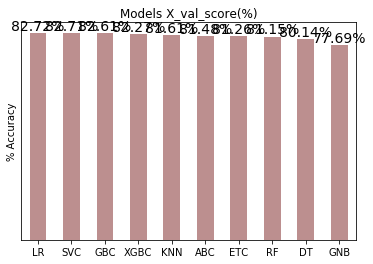

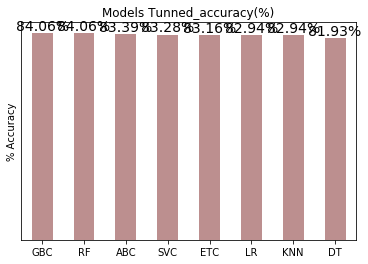

In [118]:
'''#4.Create a function that compares cross validation scores with tunned scores for different models by plotting them.'''
def compare_scores(accuracy):
    global ax1    
    ax1 = accuracy.plot.bar(legend = False, color = ['rosybrown'])
    # Removes square brackets and quotes from column name after converting list.
    plt.title('Models %s' % ''.join(list(accuracy.columns)))
    pct_bar_labels()
    plt.ylabel('% Accuracy')
    plt.show()

'''Compare cross validation scores with tunned scores to find the best model.'''
bold('**Comparing cross validation scores with optimized scores:**')
compare_scores(sorted_x_val_score)
compare_scores(sorted_tunned_scores)


**Temuan**: Di antara pengklasifikasi, RF dan GBC memiliki akurasi tertinggi setelah tunning hyperparameter. Jadi RF dan GBC mungkin layak dipelajari lebih lanjut tentang masalah klasifikasi ini. Oleh karena itu kami memilih RF dan GBC.

**Catatan**: Harap dicatat bahwa jika kami memilih penggolong kami berdasarkan skor validasi silang, kami tidak akan mendapatkan RF dan GBC sebagai pengklasifikasi terbaik kami, sebaliknya kami akan memilih LR dan SVC. Jadi disarankan untuk memilih pengklasifikasi terbaik berdasarkan keakuratan setelah menyetel hyperparameter meskipun secara komputasi intensif.

11.3 Melatih dan Memprediksi Menggunakan Hyperparameters Dioptimalkan
Jadi kami memiliki pengklasifikasi terbaik dengan hyperparameter terbaiknya yang menghasilkan akurasi terbaik dari model. Itu berarti jika kita melatih pengklasifikasi menggunakan hiperparameter terbaiknya, kita akan dapat memperoleh skor yang sama dengan yang kita dapatkan setelah mengatur hiperparameter (lihat bagian 14.4). Mari retrain pengklasifikasi kami dan kemudian gunakan validasi silang untuk menghitung akurasi model yang dilatih. Itulah bagaimana kita akan memiliki skor akurasi yang sama seperti setelah menyetel hiperparameter. Mari retrain model dengan hyperparameters yang dioptimalkan.